Fold: 1
Train RMSE: 26.71830
Validation RMSE: 40.45129
Train MAE: 18.99087
Validation MAE: 28.84796
Train SMAPE: 38.87665
Validation SMAPE: 48.85737
Train R2: 0.84238
Validation R2: 0.66019


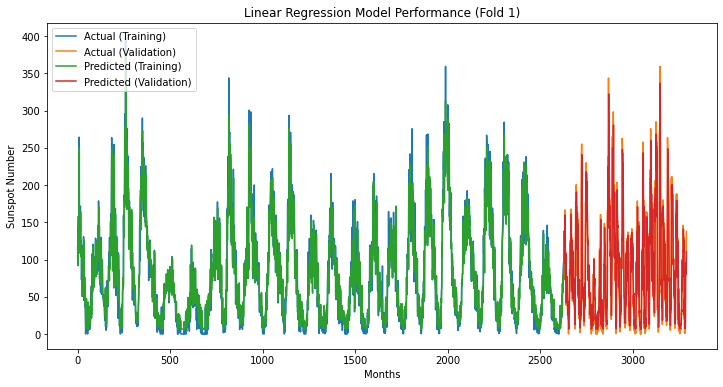

Fold: 2


IndexError: index 3293 is out of bounds for axis 0 with size 3293

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
train_rmse_scores = []
val_rmse_scores = []
train_mae_scores = []
val_mae_scores = []
train_smape_scores = []
val_smape_scores = []
train_r2_scores = []
val_r2_scores = []

for train_index, val_index in kf.split(target_scaled):
    print(f"Fold: {fold}")

    X_train, X_val = target_scaled[train_index], target_scaled[val_index[:-1]]
    y_train, y_val = target_scaled[train_index+1], target_scaled[val_index[1:]]

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    val_predictions = model.predict(X_val)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
    y_val = scaler.inverse_transform(y_val.reshape(-1, 1))  # Reshape y_val

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
    train_mae = mean_absolute_error(y_train, train_predictions)
    val_mae = mean_absolute_error(y_val, val_predictions)
    train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
    val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
    train_r2 = r2_score(y_train, train_predictions)
    val_r2 = r2_score(y_val, val_predictions)

    train_rmse_scores.append(train_rmse)
    val_rmse_scores.append(val_rmse)
    train_mae_scores.append(train_mae)
    val_mae_scores.append(val_mae)
    train_smape_scores.append(train_smape)
    val_smape_scores.append(val_smape)
    train_r2_scores.append(train_r2)
    val_r2_scores.append(val_r2)

    # Print evaluation metrics for the current fold
    print(f"Train RMSE: {train_rmse:.5f}")
    print(f"Validation RMSE: {val_rmse:.5f}")
    print(f"Train MAE: {train_mae:.5f}")
    print(f"Validation MAE: {val_mae:.5f}")
    print(f"Train SMAPE: {train_smape:.5f}")
    print(f"Validation SMAPE: {val_smape:.5f}")
    print(f"Train R2: {train_r2:.5f}")
    print(f"Validation R2: {val_r2:.5f}")

    # Plot the predictions
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
    plt.plot(range(len(y_train), len(y_train) + len(y_val)), y_val, label='Actual (Validation)')
    plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
    plt.plot(range(len(y_train), len(y_train) + len(y_val)), val_predictions, label='Predicted (Validation)')
    plt.title(f'Linear Regression Model Performance (Fold {fold})')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()
    plt.show()

    fold += 1

# Calculate the mean and standard deviation of evaluation metrics
mean_train_rmse = np.mean(train_rmse_scores)
std_train_rmse = np.std(train_rmse_scores)
mean_val_rmse = np.mean(val_rmse_scores)
std_val_rmse = np.std(val_rmse_scores)
mean_train_mae = np.mean(train_mae_scores)
std_train_mae = np.std(train_mae_scores)
mean_val_mae = np.mean(val_mae_scores)
std_val_mae = np.std(val_mae_scores)
mean_train_smape = np.mean(train_smape_scores)
std_train_smape = np.std(train_smape_scores)
mean_val_smape = np.mean(val_smape_scores)
std_val_smape = np.std(val_smape_scores)
mean_train_r2 = np.mean(train_r2_scores)
std_train_r2 = np.std(train_r2_scores)
mean_val_r2 = np.mean(val_r2_scores)
std_val_r2 = np.std(val_r2_scores)

print("\n--- Final Results ---")
print(f"Mean Train RMSE: {mean_train_rmse:.5f} (±{std_train_rmse:.5f})")
print(f"Mean Validation RMSE: {mean_val_rmse:.5f} (±{std_val_rmse:.5f})")
print(f"Mean Train MAE: {mean_train_mae:.5f} (±{std_train_mae:.5f})")
print(f"Mean Validation MAE: {mean_val_mae:.5f} (±{std_val_mae:.5f})")
print(f"Mean Train SMAPE: {mean_train_smape:.5f} (±{std_train_smape:.5f})")
print(f"Mean Validation SMAPE: {mean_val_smape:.5f} (±{std_val_smape:.5f})")
print(f"Mean Train R2: {mean_train_r2:.5f} (±{std_train_r2:.5f})")
print(f"Mean Validation R2: {mean_val_r2:.5f} (±{std_val_r2:.5f})")


Fold: 1
Train RMSE: 26.71830
Validation RMSE: 40.45129
Train MAE: 18.99087
Validation MAE: 28.84796
Train SMAPE: 38.87665
Validation SMAPE: 48.85737
Train R2: 0.84238
Validation R2: 0.66019


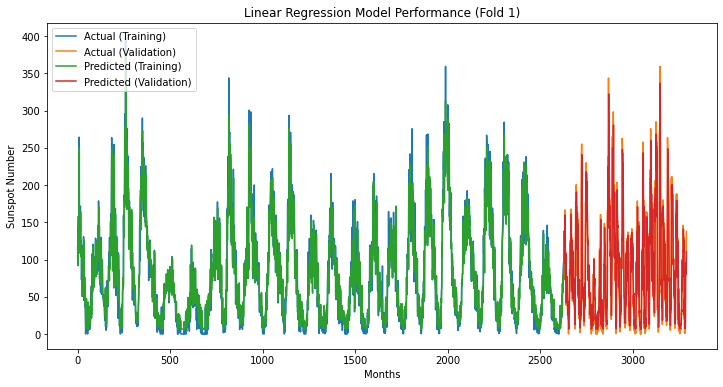

Fold: 2


IndexError: index 3293 is out of bounds for axis 0 with size 3293

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
train_rmse_scores = []
val_rmse_scores = []
train_mae_scores = []
val_mae_scores = []
train_smape_scores = []
val_smape_scores = []
train_r2_scores = []
val_r2_scores = []

for train_index, val_index in kf.split(target_scaled):
    print(f"Fold: {fold}")

    X_train, X_val = target_scaled[train_index], target_scaled[val_index[:-1]]
    y_train, y_val = target_scaled[train_index+1], target_scaled[val_index[1:]]

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    val_predictions = model.predict(X_val)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
    y_val = scaler.inverse_transform(y_val.reshape(-1, 1))  # Reshape y_val

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
    train_mae = mean_absolute_error(y_train, train_predictions)
    val_mae = mean_absolute_error(y_val, val_predictions)
    train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
    val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
    train_r2 = r2_score(y_train, train_predictions)
    val_r2 = r2_score(y_val, val_predictions)

    train_rmse_scores.append(train_rmse)
    val_rmse_scores.append(val_rmse)
    train_mae_scores.append(train_mae)
    val_mae_scores.append(val_mae)
    train_smape_scores.append(train_smape)
    val_smape_scores.append(val_smape)
    train_r2_scores.append(train_r2)
    val_r2_scores.append(val_r2)

    # Print evaluation metrics for the current fold
    print(f"Train RMSE: {train_rmse:.5f}")
    print(f"Validation RMSE: {val_rmse:.5f}")
    print(f"Train MAE: {train_mae:.5f}")
    print(f"Validation MAE: {val_mae:.5f}")
    print(f"Train SMAPE: {train_smape:.5f}")
    print(f"Validation SMAPE: {val_smape:.5f}")
    print(f"Train R2: {train_r2:.5f}")
    print(f"Validation R2: {val_r2:.5f}")

    # Plot the predictions
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
    plt.plot(range(len(y_train), len(y_train) + len(y_val)), y_val, label='Actual (Validation)')
    plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
    plt.plot(range(len(y_train), len(y_train) + len(y_val)), val_predictions, label='Predicted (Validation)')
    plt.title(f'Linear Regression Model Performance (Fold {fold})')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()
    plt.show()

    fold += 1

# Calculate the mean and standard deviation of evaluation metrics
mean_train_rmse = np.mean(train_rmse_scores)
std_train_rmse = np.std(train_rmse_scores)
mean_val_rmse = np.mean(val_rmse_scores)
std_val_rmse = np.std(val_rmse_scores)
mean_train_mae = np.mean(train_mae_scores)
std_train_mae = np.std(train_mae_scores)
mean_val_mae = np.mean(val_mae_scores)
std_val_mae = np.std(val_mae_scores)
mean_train_smape = np.mean(train_smape_scores)
std_train_smape = np.std(train_smape_scores)
mean_val_smape = np.mean(val_smape_scores)
std_val_smape = np.std(val_smape_scores)
mean_train_r2 = np.mean(train_r2_scores)
std_train_r2 = np.std(train_r2_scores)
mean_val_r2 = np.mean(val_r2_scores)
std_val_r2 = np.std(val_r2_scores)

print("\n--- Final Results ---")
print(f"Mean Train RMSE: {mean_train_rmse:.5f} (±{std_train_rmse:.5f})")
print(f"Mean Validation RMSE: {mean_val_rmse:.5f} (±{std_val_rmse:.5f})")
print(f"Mean Train MAE: {mean_train_mae:.5f} (±{std_train_mae:.5f})")
print(f"Mean Validation MAE: {mean_val_mae:.5f} (±{std_val_mae:.5f})")
print(f"Mean Train SMAPE: {mean_train_smape:.5f} (±{std_train_smape:.5f})")
print(f"Mean Validation SMAPE: {mean_val_smape:.5f} (±{std_val_smape:.5f})")
print(f"Mean Train R2: {mean_train_r2:.5f} (±{std_train_r2:.5f})")
print(f"Mean Validation R2: {mean_val_r2:.5f} (±{std_val_r2:.5f})")


Fold: 1
Train RMSE: 27.82658
Validation RMSE: 40.36124
Train MAE: 19.71335
Validation MAE: 28.82830
Train SMAPE: 39.94517
Validation SMAPE: 48.89788
Train R2: 0.82888
Validation R2: 0.66170


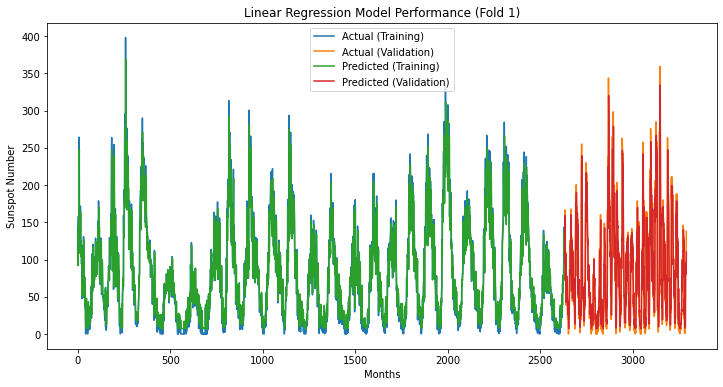

Execution Time: 0.53637 seconds
CPU Usage: 14.70000 MHz
Memory Used: 174.13281 MB
Fold: 2
Train RMSE: 28.07042
Validation RMSE: 35.66247
Train MAE: 19.99316
Validation MAE: 26.00038
Train SMAPE: 40.39329
Validation SMAPE: 45.25359
Train R2: 0.82868
Validation R2: 0.71861


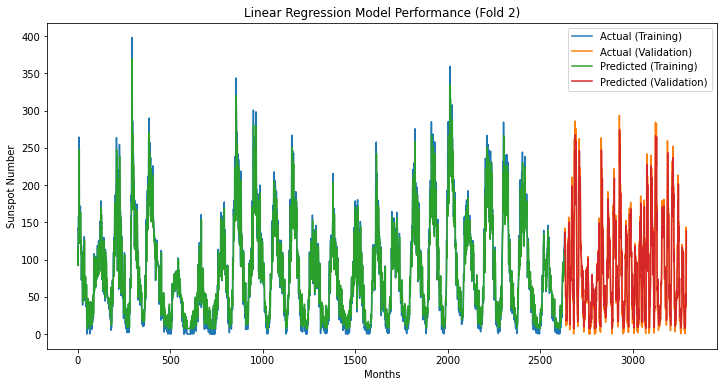

Execution Time: 0.63070 seconds
CPU Usage: 54.50000 MHz
Memory Used: 174.46875 MB
Fold: 3
Train RMSE: 28.07842
Validation RMSE: 37.59273
Train MAE: 20.16207
Validation MAE: 25.85822
Train SMAPE: 38.93735
Validation SMAPE: 50.75044
Train R2: 0.82788
Validation R2: 0.69137


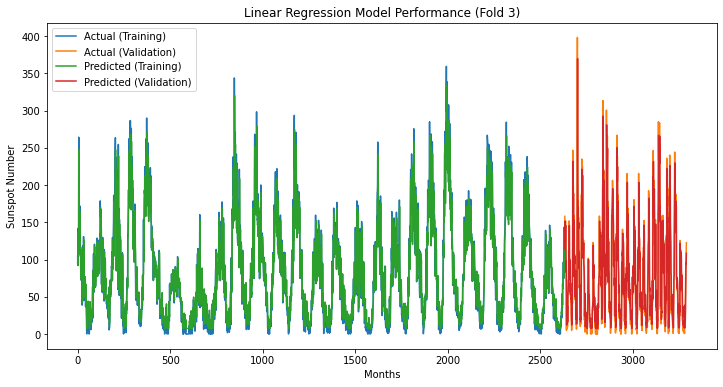

Execution Time: 0.56574 seconds
CPU Usage: 49.80000 MHz
Memory Used: 178.76562 MB
Fold: 4
Train RMSE: 28.12209
Validation RMSE: 35.94589
Train MAE: 20.01222
Validation MAE: 25.74850
Train SMAPE: 40.32939
Validation SMAPE: 45.73510
Train R2: 0.82660
Validation R2: 0.72232


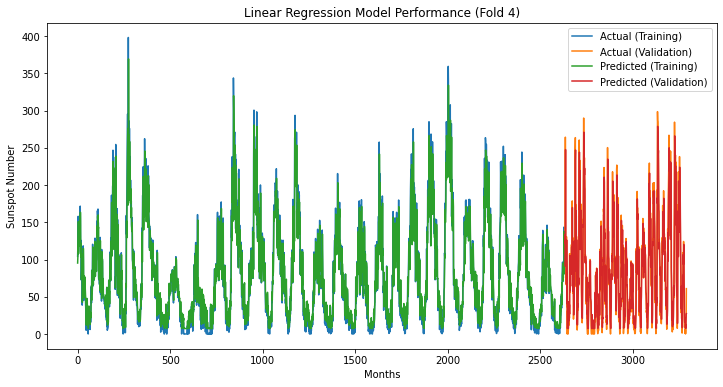

Execution Time: 0.57859 seconds
CPU Usage: 48.20000 MHz
Memory Used: 183.06250 MB
Fold: 5
Train RMSE: 28.12998
Validation RMSE: 37.03953
Train MAE: 20.10257
Validation MAE: 25.42068
Train SMAPE: 39.97865
Validation SMAPE: 47.27351
Train R2: 0.82970
Validation R2: 0.68193


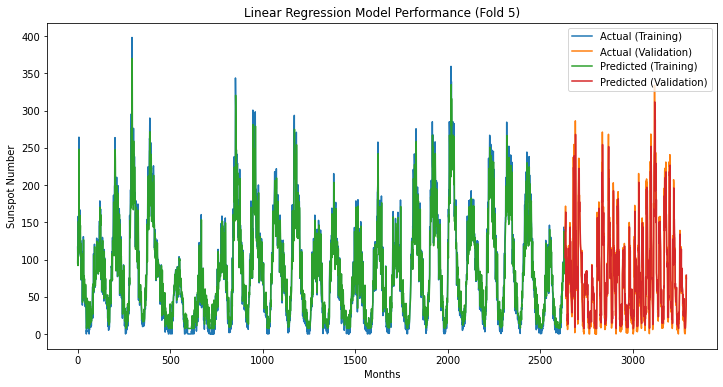

Execution Time: 0.58914 seconds
CPU Usage: 48.60000 MHz
Memory Used: 183.17188 MB


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold = 1

for train_index, val_index in kf.split(target_scaled):
    print(f"Fold: {fold}")

    train_data = target_scaled[train_index]
    val_data = target_scaled[val_index]

    # Train and evaluate the Linear Regression model
    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))  # Reshape y_val

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Plot the predictions
        plt.figure(figsize=(12, 6))
        plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
        plt.plot(range(len(y_train), len(y_train) + len(y_val)), y_val, label='Actual (Validation)')
        plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
        plt.plot(range(len(y_train), len(y_train) + len(y_val)), val_predictions, label='Predicted (Validation)')
        plt.title(f'Linear Regression Model Performance (Fold {fold})')
        plt.xlabel('Months')
        plt.ylabel('Sunspot Number')
        plt.legend()
        plt.show()

    # Train and evaluate the Linear Regression model for the current fold
    start_time = time.time()
    train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Print computation time, CPU usage, and memory usage
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
    print(f"Execution Time: {computation_time:.5f} seconds")
    print(f"CPU Usage: {cpu_usage:.5f} MHz")
    print(f"Memory Used: {memory_usage:.5f} MB")

    fold += 1


Fold: 1
Train RMSE: 27.82658
Validation RMSE: 40.36124
Train MAE: 19.71335
Validation MAE: 28.82830
Train SMAPE: 39.94517
Validation SMAPE: 48.89788
Train R2: 0.82888
Validation R2: 0.66170


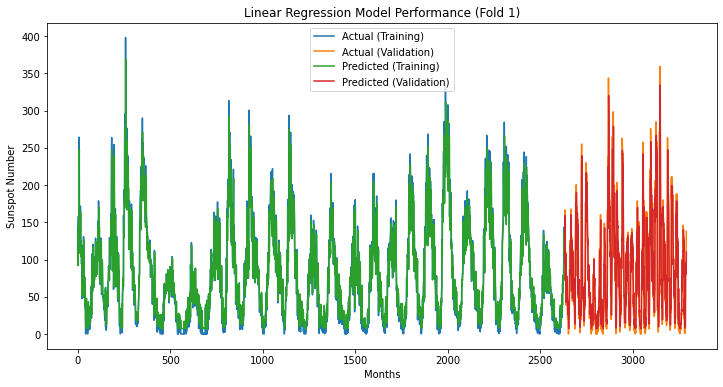

Execution Time: 0.54541 seconds
CPU Usage: 11.70000 MHz
Memory Used: 183.11719 MB
Fold: 2
Train RMSE: 28.07042
Validation RMSE: 35.66247
Train MAE: 19.99316
Validation MAE: 26.00038
Train SMAPE: 40.39329
Validation SMAPE: 45.25359
Train R2: 0.82868
Validation R2: 0.71861


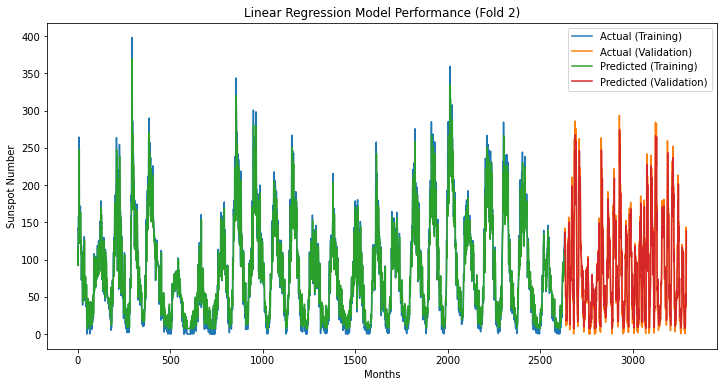

Execution Time: 0.50889 seconds
CPU Usage: 39.40000 MHz
Memory Used: 186.71484 MB
Fold: 3
Train RMSE: 28.07842
Validation RMSE: 37.59273
Train MAE: 20.16207
Validation MAE: 25.85822
Train SMAPE: 38.93735
Validation SMAPE: 50.75044
Train R2: 0.82788
Validation R2: 0.69137


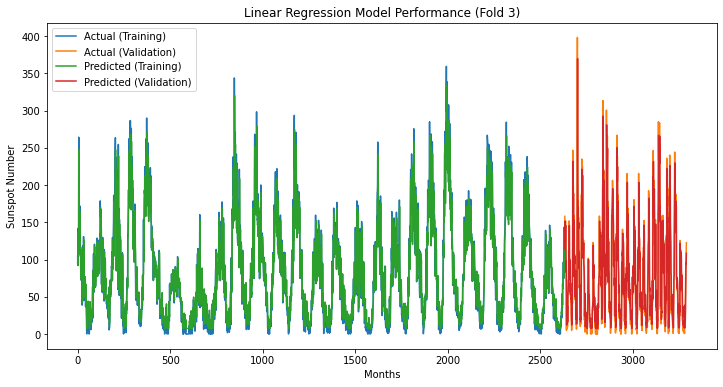

Execution Time: 0.51375 seconds
CPU Usage: 41.10000 MHz
Memory Used: 190.40625 MB
Fold: 4
Train RMSE: 28.12209
Validation RMSE: 35.94589
Train MAE: 20.01222
Validation MAE: 25.74850
Train SMAPE: 40.32939
Validation SMAPE: 45.73510
Train R2: 0.82660
Validation R2: 0.72232


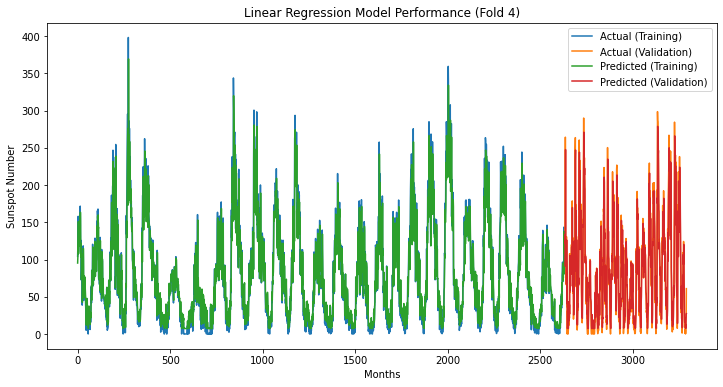

Execution Time: 0.49988 seconds
CPU Usage: 35.90000 MHz
Memory Used: 195.41797 MB
Fold: 5
Train RMSE: 28.12998
Validation RMSE: 37.03953
Train MAE: 20.10257
Validation MAE: 25.42068
Train SMAPE: 39.97865
Validation SMAPE: 47.27351
Train R2: 0.82970
Validation R2: 0.68193


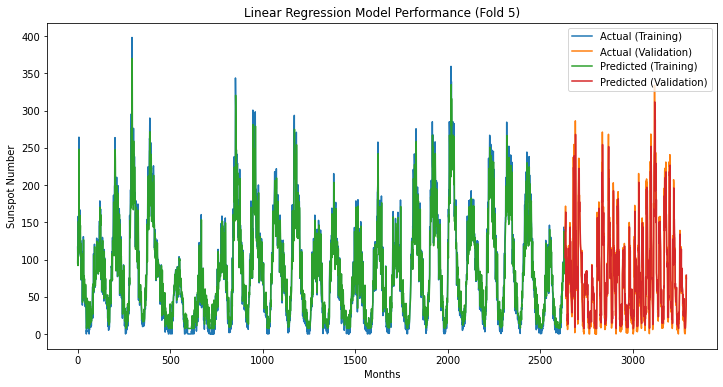

Execution Time: 0.56269 seconds
CPU Usage: 39.60000 MHz
Memory Used: 195.70703 MB


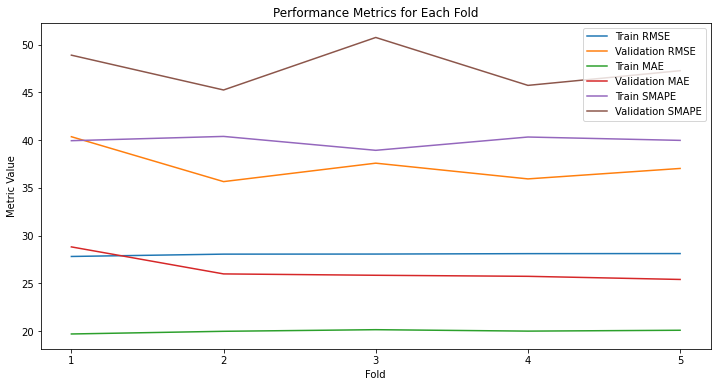

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
train_rmse_list = []
val_rmse_list = []
train_mae_list = []
val_mae_list = []
train_smape_list = []
val_smape_list = []
train_r2_list = []
val_r2_list = []

for train_index, val_index in kf.split(target_scaled):
    print(f"Fold: {fold}")

    train_data = target_scaled[train_index]
    val_data = target_scaled[val_index]

    # Train and evaluate the Linear Regression model
    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))  # Reshape y_val

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Add metrics to lists
        train_rmse_list.append(train_rmse)
        val_rmse_list.append(val_rmse)
        train_mae_list.append(train_mae)
        val_mae_list.append(val_mae)
        train_smape_list.append(train_smape)
        val_smape_list.append(val_smape)
        train_r2_list.append(train_r2)
        val_r2_list.append(val_r2)

        # Plot the predictions
        plt.figure(figsize=(12, 6))
        plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
        plt.plot(range(len(y_train), len(y_train) + len(y_val)), y_val, label='Actual (Validation)')
        plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
        plt.plot(range(len(y_train), len(y_train) + len(y_val)), val_predictions, label='Predicted (Validation)')
        plt.title(f'Linear Regression Model Performance (Fold {fold})')
        plt.xlabel('Months')
        plt.ylabel('Sunspot Number')
        plt.legend()
        plt.show()

    # Train and evaluate the Linear Regression model for the current fold
    start_time = time.time()
    train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Print computation time, CPU usage, and memory usage
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
    print(f"Execution Time: {computation_time:.5f} seconds")
    print(f"CPU Usage: {cpu_usage:.5f} MHz")
    print(f"Memory Used: {memory_usage:.5f} MB")

    fold += 1

# Visualize the performance for each fold
plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), train_rmse_list, label='Train RMSE')
plt.plot(range(1, 6), val_rmse_list, label='Validation RMSE')
plt.plot(range(1, 6), train_mae_list, label='Train MAE')
plt.plot(range(1, 6), val_mae_list, label='Validation MAE')
plt.plot(range(1, 6), train_smape_list, label='Train SMAPE')
plt.plot(range(1, 6), val_smape_list, label='Validation SMAPE')
#plt.plot(range(1, 6), train_r2_list, label='Train R2')
#plt.plot(range(1, 6), val_r2_list, label='Validation R2')
plt.title('Performance Metrics for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Metric Value')
plt.xticks(range(1, 6))
plt.legend()
plt.show()


Fold: 1
Train RMSE: 27.82658
Validation RMSE: 40.36124
Train MAE: 19.71335
Validation MAE: 28.82830
Train SMAPE: 39.94517
Validation SMAPE: 48.89788
Train R2: 0.82888
Validation R2: 0.66170


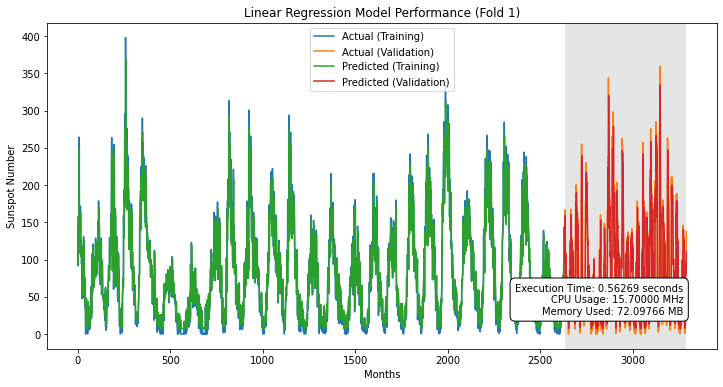

Fold: 2
Train RMSE: 28.07042
Validation RMSE: 35.66247
Train MAE: 19.99316
Validation MAE: 26.00038
Train SMAPE: 40.39329
Validation SMAPE: 45.25359
Train R2: 0.82868
Validation R2: 0.71861


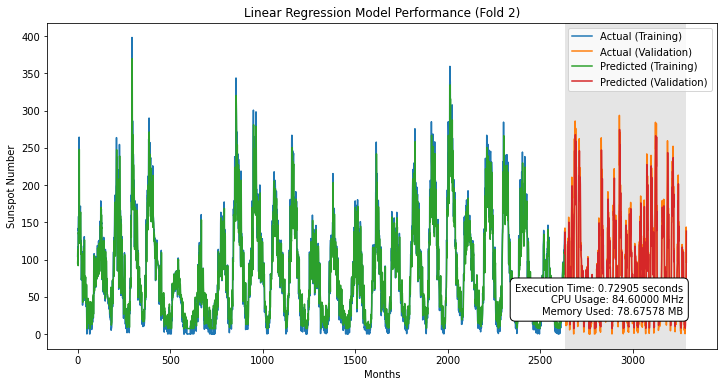

Fold: 3
Train RMSE: 28.07842
Validation RMSE: 37.59273
Train MAE: 20.16207
Validation MAE: 25.85822
Train SMAPE: 38.93735
Validation SMAPE: 50.75044
Train R2: 0.82788
Validation R2: 0.69137


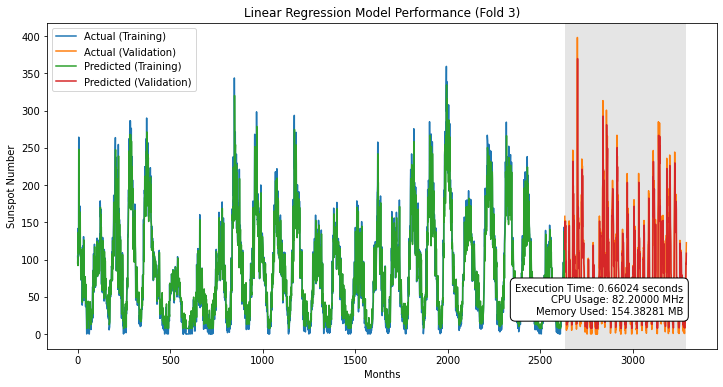

Fold: 4
Train RMSE: 28.12209
Validation RMSE: 35.94589
Train MAE: 20.01222
Validation MAE: 25.74850
Train SMAPE: 40.32939
Validation SMAPE: 45.73510
Train R2: 0.82660
Validation R2: 0.72232


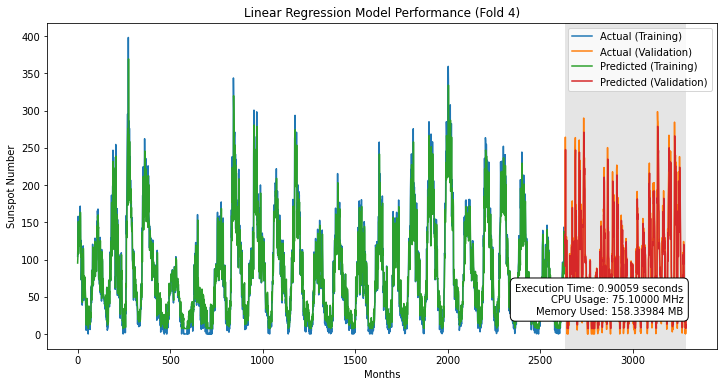

Fold: 5
Train RMSE: 28.12998
Validation RMSE: 37.03953
Train MAE: 20.10257
Validation MAE: 25.42068
Train SMAPE: 39.97865
Validation SMAPE: 47.27351
Train R2: 0.82970
Validation R2: 0.68193


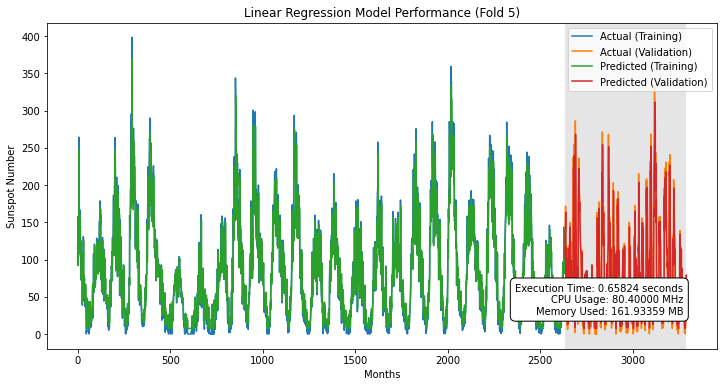

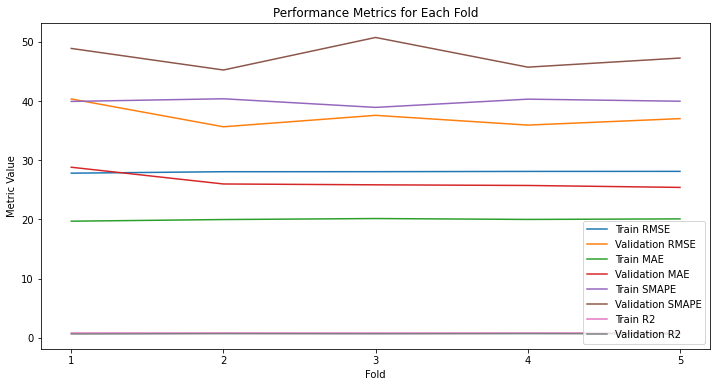

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
train_rmse_list = []
val_rmse_list = []
train_mae_list = []
val_mae_list = []
train_smape_list = []
val_smape_list = []
train_r2_list = []
val_r2_list = []

for train_index, val_index in kf.split(target_scaled):
    print(f"Fold: {fold}")

    train_data = target_scaled[train_index]
    val_data = target_scaled[val_index]

    # Train and evaluate the Linear Regression model
    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))  # Reshape y_val

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Add metrics to lists
        train_rmse_list.append(train_rmse)
        val_rmse_list.append(val_rmse)
        train_mae_list.append(train_mae)
        val_mae_list.append(val_mae)
        train_smape_list.append(train_smape)
        val_smape_list.append(val_smape)
        train_r2_list.append(train_r2)
        val_r2_list.append(val_r2)

        # Plot the predictions
        plt.figure(figsize=(12, 6))
        plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
        plt.plot(range(len(y_train), len(y_train) + len(y_val)), y_val, label='Actual (Validation)')
        plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
        plt.plot(range(len(y_train), len(y_train) + len(y_val)), val_predictions, label='Predicted (Validation)')
        plt.title(f'Linear Regression Model Performance (Fold {fold})')
        plt.xlabel('Months')
        plt.ylabel('Sunspot Number')
        plt.legend()

        # Highlight the selected fold
        ax = plt.gca()
        ax.axvspan(len(y_train), len(y_train) + len(y_val) - 1, facecolor='gray', alpha=0.2)

        # Print computation time, CPU usage, and memory usage
        process = psutil.Process()
        cpu_usage = psutil.cpu_percent()
        memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
        plt.text(0.95, 0.1, f"Execution Time: {computation_time:.5f} seconds\nCPU Usage: {cpu_usage:.5f} MHz\nMemory Used: {memory_usage:.5f} MB",
                 verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes,
                 color='black', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

        plt.show()

    # Train and evaluate the Linear Regression model for the current fold
    start_time = time.time()
    train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    fold += 1

# Visualize the performance for each fold
plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), train_rmse_list, label='Train RMSE')
plt.plot(range(1, 6), val_rmse_list, label='Validation RMSE')
plt.plot(range(1, 6), train_mae_list, label='Train MAE')
plt.plot(range(1, 6), val_mae_list, label='Validation MAE')
plt.plot(range(1, 6), train_smape_list, label='Train SMAPE')
plt.plot(range(1, 6), val_smape_list, label='Validation SMAPE')
plt.plot(range(1, 6), train_r2_list, label='Train R2')
plt.plot(range(1, 6), val_r2_list, label='Validation R2')
plt.title('Performance Metrics for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Metric Value')
plt.xticks(range(1, 6))
plt.legend()
plt.show()


Fold: 1
Train RMSE: 27.82658
Validation RMSE: 40.36124
Train MAE: 19.71335
Validation MAE: 28.82830
Train SMAPE: 39.94517
Validation SMAPE: 48.89788
Train R2: 0.82888
Validation R2: 0.66170


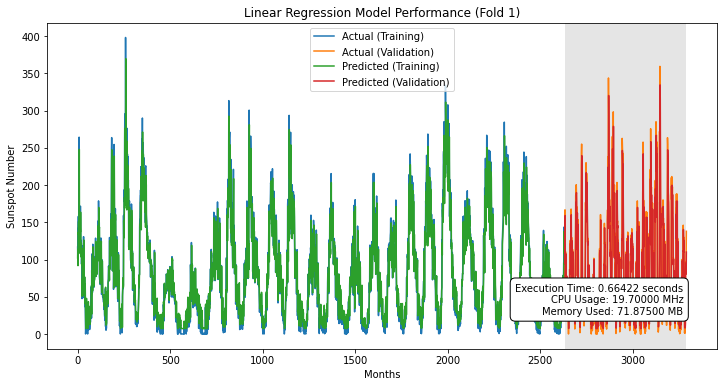

Fold: 2
Train RMSE: 28.07042
Validation RMSE: 35.66247
Train MAE: 19.99316
Validation MAE: 26.00038
Train SMAPE: 40.39329
Validation SMAPE: 45.25359
Train R2: 0.82868
Validation R2: 0.71861


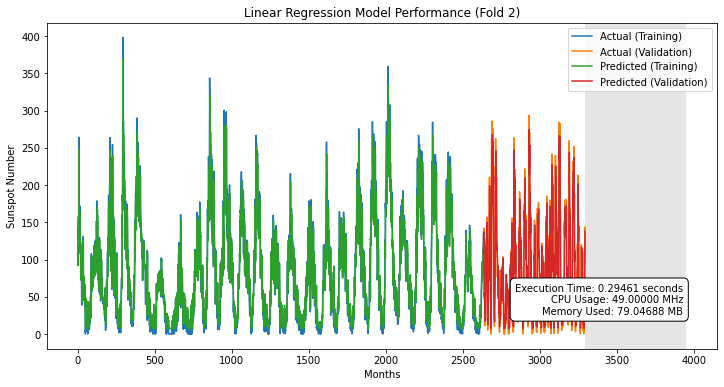

Fold: 3
Train RMSE: 28.07842
Validation RMSE: 37.59273
Train MAE: 20.16207
Validation MAE: 25.85822
Train SMAPE: 38.93735
Validation SMAPE: 50.75044
Train R2: 0.82788
Validation R2: 0.69137


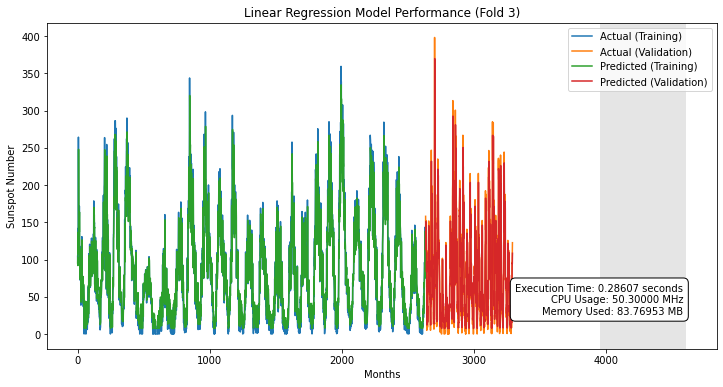

Fold: 4
Train RMSE: 28.12209
Validation RMSE: 35.94589
Train MAE: 20.01222
Validation MAE: 25.74850
Train SMAPE: 40.32939
Validation SMAPE: 45.73510
Train R2: 0.82660
Validation R2: 0.72232


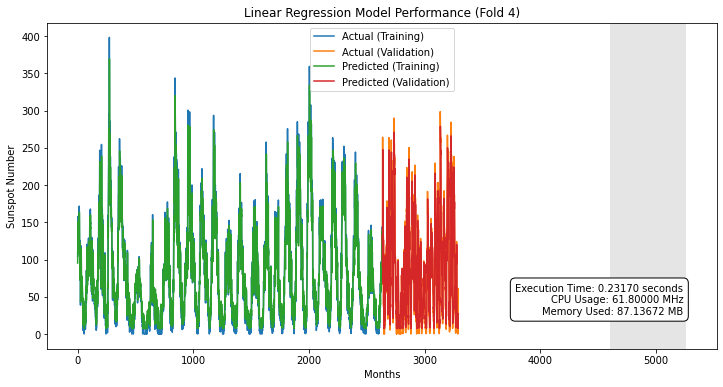

Fold: 5
Train RMSE: 28.12998
Validation RMSE: 37.03953
Train MAE: 20.10257
Validation MAE: 25.42068
Train SMAPE: 39.97865
Validation SMAPE: 47.27351
Train R2: 0.82970
Validation R2: 0.68193


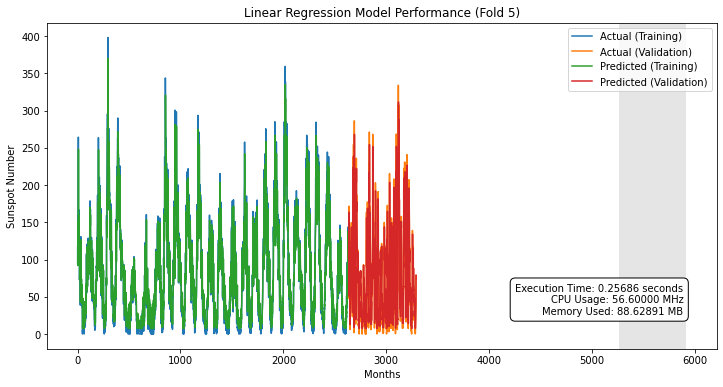

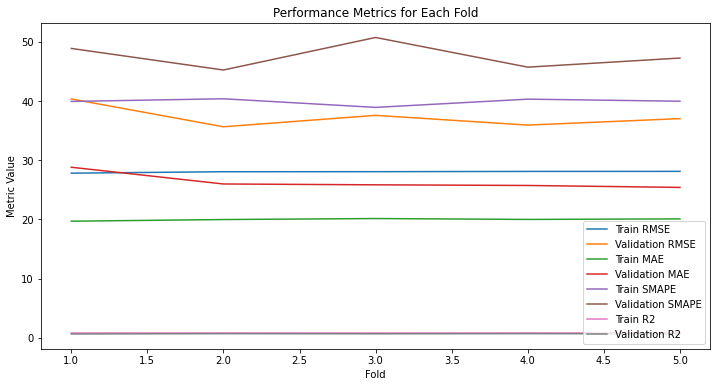

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
train_rmse_list = []
val_rmse_list = []
train_mae_list = []
val_mae_list = []
train_smape_list = []
val_smape_list = []
train_r2_list = []
val_r2_list = []

for train_index, val_index in kf.split(target_scaled):
    print(f"Fold: {fold}")

    train_data = target_scaled[train_index]
    val_data = target_scaled[val_index]

    # Train and evaluate the Linear Regression model
    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))  # Reshape y_val

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Add metrics to lists
        train_rmse_list.append(train_rmse)
        val_rmse_list.append(val_rmse)
        train_mae_list.append(train_mae)
        val_mae_list.append(val_mae)
        train_smape_list.append(train_smape)
        val_smape_list.append(val_smape)
        train_r2_list.append(train_r2)
        val_r2_list.append(val_r2)

        # Plot the predictions
        plt.figure(figsize=(12, 6))
        plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
        plt.plot(range(len(y_train), len(y_train) + len(y_val)), y_val, label='Actual (Validation)')
        plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
        plt.plot(range(len(y_train), len(y_train) + len(y_val)), val_predictions, label='Predicted (Validation)')
        plt.title(f'Linear Regression Model Performance (Fold {fold})')
        plt.xlabel('Months')
        plt.ylabel('Sunspot Number')
        plt.legend()

        # Highlight the selected fold
        fold_start = len(y_train) + (fold - 1) * len(y_val)
        fold_end = fold_start + len(y_val) - 1
        ax = plt.gca()
        ax.axvspan(fold_start, fold_end, facecolor='gray', alpha=0.2)

        # Print computation time, CPU usage, and memory usage
        process = psutil.Process()
        cpu_usage = psutil.cpu_percent()
        memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
        plt.text(0.95, 0.1, f"Execution Time: {computation_time:.5f} seconds\nCPU Usage: {cpu_usage:.5f} MHz\nMemory Used: {memory_usage:.5f} MB",
                 verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes,
                 color='black', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

        plt.show()

    # Train and evaluate the Linear Regression model for the current fold
    start_time = time.time()
    train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    fold += 1

# Visualize the performance for each fold
plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), train_rmse_list, label='Train RMSE')
plt.plot(range(1, 6), val_rmse_list, label='Validation RMSE')
plt.plot(range(1, 6), train_mae_list, label='Train MAE')
plt.plot(range(1, 6), val_mae_list, label='Validation MAE')
plt.plot(range(1, 6), train_smape_list, label='Train SMAPE')
plt.plot(range(1, 6), val_smape_list, label='Validation SMAPE')
plt.plot(range(1, 6), train_r2_list, label='Train R2')
plt.plot(range(1, 6), val_r2_list, label='Validation R2')
plt.title('Performance Metrics for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Metric Value')
plt.legend()
plt.show()


Fold: 1
Train RMSE: 27.82658
Validation RMSE: 40.36124
Train MAE: 19.71335
Validation MAE: 28.82830
Train SMAPE: 39.94517
Validation SMAPE: 48.89788
Train R2: 0.82888
Validation R2: 0.66170


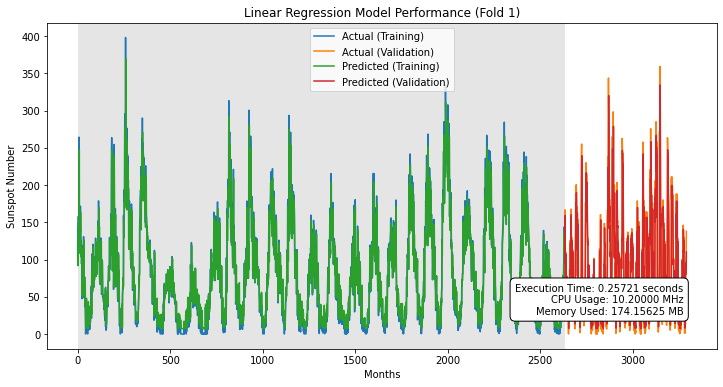

Fold: 2
Train RMSE: 28.07042
Validation RMSE: 35.66247
Train MAE: 19.99316
Validation MAE: 26.00038
Train SMAPE: 40.39329
Validation SMAPE: 45.25359
Train R2: 0.82868
Validation R2: 0.71861


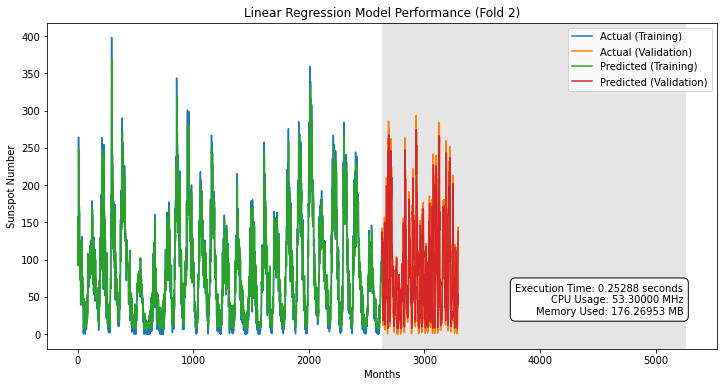

Fold: 3
Train RMSE: 28.07842
Validation RMSE: 37.59273
Train MAE: 20.16207
Validation MAE: 25.85822
Train SMAPE: 38.93735
Validation SMAPE: 50.75044
Train R2: 0.82788
Validation R2: 0.69137


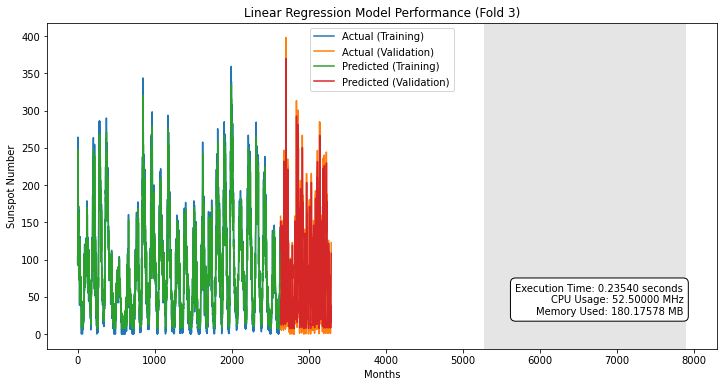

Fold: 4
Train RMSE: 28.12209
Validation RMSE: 35.94589
Train MAE: 20.01222
Validation MAE: 25.74850
Train SMAPE: 40.32939
Validation SMAPE: 45.73510
Train R2: 0.82660
Validation R2: 0.72232


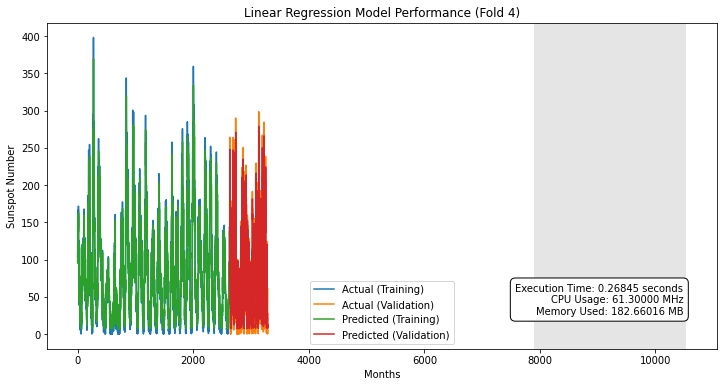

Fold: 5
Train RMSE: 28.12998
Validation RMSE: 37.03953
Train MAE: 20.10257
Validation MAE: 25.42068
Train SMAPE: 39.97865
Validation SMAPE: 47.27351
Train R2: 0.82970
Validation R2: 0.68193


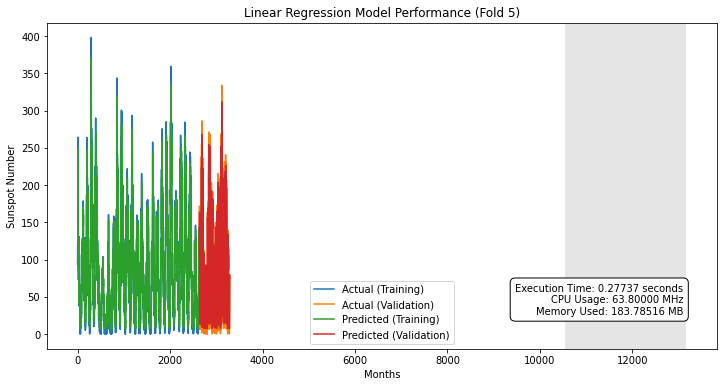

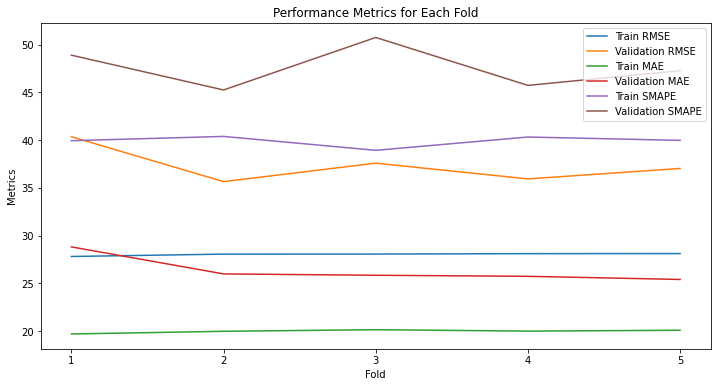

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
train_rmse_list = []
val_rmse_list = []
train_mae_list = []
val_mae_list = []
train_smape_list = []
val_smape_list = []
train_r2_list = []
val_r2_list = []

for train_index, val_index in kf.split(target_scaled):
    print(f"Fold: {fold}")

    train_data = target_scaled[train_index]
    val_data = target_scaled[val_index]

    # Train and evaluate the Linear Regression model
    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))  # Reshape y_val

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Add metrics to lists
        train_rmse_list.append(train_rmse)
        val_rmse_list.append(val_rmse)
        train_mae_list.append(train_mae)
        val_mae_list.append(val_mae)
        train_smape_list.append(train_smape)
        val_smape_list.append(val_smape)
        train_r2_list.append(train_r2)
        val_r2_list.append(val_r2)

        # Plot the predictions
        plt.figure(figsize=(12, 6))
        plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
        plt.plot(range(len(y_train), len(y_train) + len(y_val)), y_val, label='Actual (Validation)')
        plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
        plt.plot(range(len(y_train), len(y_train) + len(y_val)), val_predictions, label='Predicted (Validation)')
        plt.title(f'Linear Regression Model Performance (Fold {fold})')
        plt.xlabel('Months')
        plt.ylabel('Sunspot Number')
        plt.legend()

        # Highlight the selected fold
        start_index = len(y_train) * (fold - 1)
        end_index = len(y_train) * fold
        ax = plt.gca()
        ax.axvspan(start_index, end_index - 1, facecolor='gray', alpha=0.2)

        # Print computation time, CPU usage, and memory usage
        process = psutil.Process()
        cpu_usage = psutil.cpu_percent()
        memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
        plt.text(0.95, 0.1, f"Execution Time: {computation_time:.5f} seconds\nCPU Usage: {cpu_usage:.5f} MHz\nMemory Used: {memory_usage:.5f} MB",
                 verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes,
                 color='black', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

        plt.show()

    # Train and evaluate the Linear Regression model for the current fold
    start_time = time.time()
    train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    fold += 1

# Visualize the performance for each fold
plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), train_rmse_list, label='Train RMSE')
plt.plot(range(1, 6), val_rmse_list, label='Validation RMSE')
plt.plot(range(1, 6), train_mae_list, label='Train MAE')
plt.plot(range(1, 6), val_mae_list, label='Validation MAE')
plt.plot(range(1, 6), train_smape_list, label='Train SMAPE')
plt.plot(range(1, 6), val_smape_list, label='Validation SMAPE')
#plt.plot(range(1, 6), train_r2_list, label='Train R2')
#plt.plot(range(1, 6), val_r2_list, label='Validation R2')
plt.title('Performance Metrics for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Metrics')
plt.xticks(range(1, 6))
plt.legend()
plt.show()


In [14]:
import numpy as np
import pandas as pd
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)
fold = 1
best_fold = None
best_metric = float('inf')

for train_index, val_index in kf.split(target_scaled):
    print(f"\nFold {fold}:")

    train_data = target_scaled[train_index]
    val_data = target_scaled[val_index]

    # Train and evaluate the Linear Regression model for the current fold
    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))  # Reshape y_val

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        return val_rmse

    # Train and evaluate the Linear Regression model for the current fold
    start_time = time.time()
    val_rmse = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Print computation calculations for the current fold
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
    print(f"Execution Time: {computation_time:.5f} seconds")
    print(f"CPU Usage: {cpu_usage:.5f} MHz")
    print(f"Memory Used: {memory_usage:.5f} MB")

    # Check if the current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    fold += 1

# Print the best fold
print(f"\nBest Fold: {best_fold} with RMSE: {best_metric:.5f}")



Fold 1:
Train RMSE: 27.75006
Validation RMSE: 37.06674
Train MAE: 19.82226
Validation MAE: 25.74727
Train SMAPE: 40.22495
Validation SMAPE: 45.80819
Train R2: 0.82983
Validation R2: 0.71481
Execution Time: 0.00537 seconds
CPU Usage: 9.90000 MHz
Memory Used: 188.97656 MB

Fold 2:
Train RMSE: 26.86792
Validation RMSE: 38.04987
Train MAE: 19.18353
Validation MAE: 26.62057
Train SMAPE: 39.26382
Validation SMAPE: 47.91531
Train R2: 0.84304
Validation R2: 0.68001
Execution Time: 0.00399 seconds
CPU Usage: 0.00000 MHz
Memory Used: 188.97656 MB

Fold 3:
Train RMSE: 27.60695
Validation RMSE: 37.39252
Train MAE: 19.73277
Validation MAE: 26.43618
Train SMAPE: 39.31426
Validation SMAPE: 48.79167
Train R2: 0.83104
Validation R2: 0.71325
Execution Time: 0.00498 seconds
CPU Usage: 100.00000 MHz
Memory Used: 188.97656 MB

Fold 4:
Train RMSE: 28.54418
Validation RMSE: 34.35711
Train MAE: 20.23378
Validation MAE: 25.03276
Train SMAPE: 40.35519
Validation SMAPE: 45.42491
Train R2: 0.82616
Validation R2:

In [21]:
import numpy as np
import pandas as pd
import psutil
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)
fold = 1
best_fold = None
best_metric = float('inf')
eval_metrics = []

for train_index, val_index in kf.split(target_scaled):
    print(f"\nFold {fold}:")

    train_data = target_scaled[train_index]
    val_data = target_scaled[val_index]

    # Train and evaluate the Linear Regression model for the current fold
    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))  # Reshape y_val

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        eval_metrics.append({'Train RMSE': train_rmse, 'Validation RMSE': val_rmse, 'Train MAE': train_mae,
                             'Validation MAE': val_mae, 'Train SMAPE': train_smape, 'Validation SMAPE': val_smape,
                             'Train R2': train_r2, 'Validation R2': val_r2})

        return val_rmse

    # Train and evaluate the Linear Regression model for the current fold
    start_time = time.time()
    val_rmse = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Print computation calculations for the current fold
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
    print(f"Execution Time: {computation_time:.5f} seconds")
    print(f"CPU Usage: {cpu_usage:.5f} MHz")
    print(f"Memory Used: {memory_usage:.5f} MB")

    # Check if the current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    fold += 1

# Print the best fold and its evaluation metrics
print(f"\nBest Fold: {best_fold} with RMSE: {best_metric:.5f}")
best_metrics = eval_metrics[best_fold - 1]
print("\nEvaluation Metrics for the Best Fold:")
for metric, value in best_metrics.items():
    print(f"{metric}: {value:.5f}")

# Plot the evaluation metrics for each fold
eval_metrics_df = pd.DataFrame(eval_metrics)
eval_metrics_df.plot(kind='bar', x=range(1, fold), figsize=(10, 6))
plt.title('Evaluation Metrics for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.show()



Fold 1:
Train RMSE: 27.72836
Validation RMSE: 35.94715
Train MAE: 19.72296
Validation MAE: 25.75347
Train SMAPE: 39.99464
Validation SMAPE: 46.54350
Train R2: 0.83177
Validation R2: 0.72108
Execution Time: 0.00299 seconds
CPU Usage: 11.60000 MHz
Memory Used: 179.64453 MB

Fold 2:
Train RMSE: 28.09447
Validation RMSE: 35.17387
Train MAE: 19.91817
Validation MAE: 25.10782
Train SMAPE: 40.58896
Validation SMAPE: 43.89270
Train R2: 0.83158
Validation R2: 0.70354
Execution Time: 0.00428 seconds
CPU Usage: 0.00000 MHz
Memory Used: 179.64453 MB

Fold 3:
Train RMSE: 27.96830
Validation RMSE: 37.35092
Train MAE: 19.81911
Validation MAE: 26.23834
Train SMAPE: 39.02702
Validation SMAPE: 49.76710
Train R2: 0.82669
Validation R2: 0.71334
Execution Time: 0.00399 seconds
CPU Usage: 0.00000 MHz
Memory Used: 179.64453 MB

Fold 4:
Train RMSE: 27.16711
Validation RMSE: 39.55035
Train MAE: 19.46704
Validation MAE: 26.62331
Train SMAPE: 39.24625
Validation SMAPE: 49.09383
Train R2: 0.83788
Validation R2: 

KeyError: "None of [Int64Index([1, 2, 3, 4, 5], dtype='int64')] are in the [columns]"

In [22]:
import numpy as np
import pandas as pd
import psutil
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)
fold = 1
best_fold = None
best_metric = float('inf')
eval_metrics = []

for train_index, val_index in kf.split(target_scaled):
    print(f"\nFold {fold}:")

    train_data = target_scaled[train_index]
    val_data = target_scaled[val_index]

    # Train and evaluate the Linear Regression model for the current fold
    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))  # Reshape y_val

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        eval_metrics.append({'Train RMSE': train_rmse, 'Validation RMSE': val_rmse, 'Train MAE': train_mae,
                             'Validation MAE': val_mae, 'Train SMAPE': train_smape, 'Validation SMAPE': val_smape,
                             'Train R2': train_r2, 'Validation R2': val_r2})

        return val_rmse

    start_time = time.time()
    val_rmse = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Print computation calculations for the current fold
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
    print(f"Execution Time: {computation_time:.5f} seconds")
    print(f"CPU Usage: {cpu_usage:.5f} MHz")
    print(f"Memory Used: {memory_usage:.5f} MB")

    # Check if the current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    fold += 1

# Print the best fold and its evaluation metrics
print(f"\nBest Fold: {best_fold} with RMSE: {best_metric:.5f}")
best_metrics = eval_metrics[best_fold - 1]
print("\nEvaluation Metrics for the Best Fold:")
for metric, value in best_metrics.items():
    print(f"{metric}: {value:.5f}")

# Plot the computation calculations for each fold
execution_times = [metrics['Execution Time'] for metrics in eval_metrics]
cpu_usages = [metrics['CPU Usage'] for metrics in eval_metrics]
memory_usages = [metrics['Memory Used'] for metrics in eval_metrics]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
ax1.plot(range(1, fold), execution_times, marker='o')
ax1.set_title('Execution Time for Each Fold')
ax1.set_xlabel('Fold')
ax1.set_ylabel('Time (seconds)')

ax2.plot(range(1, fold), cpu_usages, marker='o')
ax2.set_title('CPU Usage for Each Fold')
ax2.set_xlabel('Fold')
ax2.set_ylabel('Usage (MHz)')

ax3.plot(range(1, fold), memory_usages, marker='o')
ax3.set_title('Memory Usage for Each Fold')
ax3.set_xlabel('Fold')
ax3.set_ylabel('Usage (MB)')

plt.tight_layout()
plt.show()



Fold 1:
Train RMSE: 27.67370
Validation RMSE: 37.08307
Train MAE: 19.84505
Validation MAE: 25.45761
Train SMAPE: 39.80691
Validation SMAPE: 47.26635
Train R2: 0.83215
Validation R2: 0.70486
Execution Time: 0.00181 seconds
CPU Usage: 10.80000 MHz
Memory Used: 179.69141 MB

Fold 2:
Train RMSE: 27.70157
Validation RMSE: 36.39477
Train MAE: 19.75026
Validation MAE: 26.42555
Train SMAPE: 39.59073
Validation SMAPE: 49.54626
Train R2: 0.83502
Validation R2: 0.69279
Execution Time: 0.00399 seconds
CPU Usage: 0.00000 MHz
Memory Used: 179.69141 MB

Fold 3:
Train RMSE: 28.16174
Validation RMSE: 33.88164
Train MAE: 19.95391
Validation MAE: 24.45014
Train SMAPE: 39.71484
Validation SMAPE: 45.20094
Train R2: 0.82748
Validation R2: 0.74660
Execution Time: 0.00440 seconds
CPU Usage: 75.00000 MHz
Memory Used: 179.69141 MB

Fold 4:
Train RMSE: 28.08909
Validation RMSE: 37.54474
Train MAE: 19.86829
Validation MAE: 27.06501
Train SMAPE: 39.68086
Validation SMAPE: 48.52053
Train R2: 0.82648
Validation R2:

KeyError: 'Execution Time'


Fold 1:
Train RMSE: 27.70374
Validation RMSE: 35.48459
Train MAE: 19.72072
Validation MAE: 24.63903
Train SMAPE: 39.44153
Validation SMAPE: 45.94728
Train R2: 0.83281
Validation R2: 0.72363
Execution Time: 0.00250 seconds
CPU Usage: 11.60000 MHz
Memory Used: 179.70703 MB

Fold 2:
Train RMSE: 27.82485
Validation RMSE: 37.42079
Train MAE: 19.79675
Validation MAE: 26.31904
Train SMAPE: 39.80078
Validation SMAPE: 47.06416
Train R2: 0.82965
Validation R2: 0.70405
Execution Time: 0.00499 seconds
CPU Usage: 0.00000 MHz
Memory Used: 179.70703 MB

Fold 3:
Train RMSE: 28.66112
Validation RMSE: 35.98218
Train MAE: 20.42312
Validation MAE: 25.55955
Train SMAPE: 40.36004
Validation SMAPE: 47.48301
Train R2: 0.82431
Validation R2: 0.69252
Execution Time: 0.00448 seconds
CPU Usage: 88.90000 MHz
Memory Used: 179.70703 MB

Fold 4:
Train RMSE: 28.19393
Validation RMSE: 36.97235
Train MAE: 20.14443
Validation MAE: 25.82062
Train SMAPE: 39.92103
Validation SMAPE: 48.52179
Train R2: 0.82816
Validation R2:

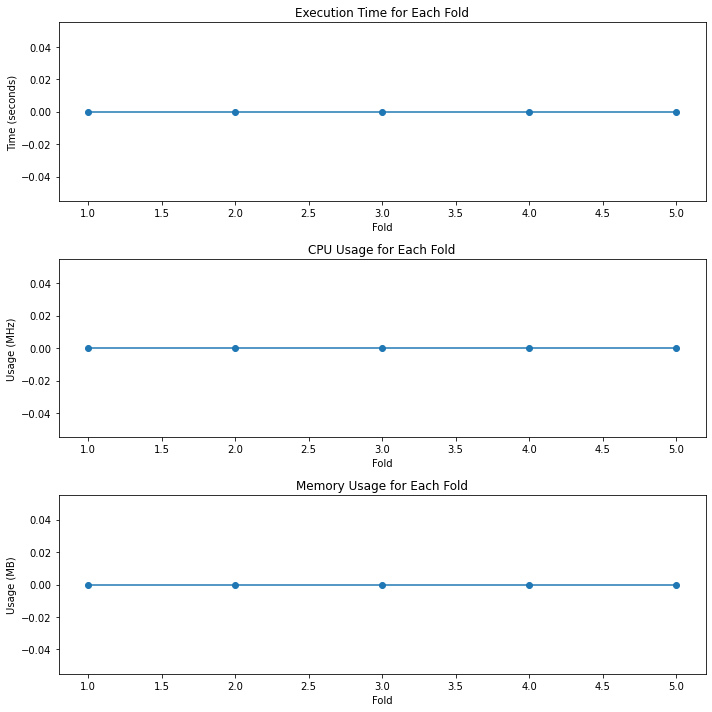

In [23]:
import numpy as np
import pandas as pd
import psutil
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)
fold = 1
best_fold = None
best_metric = float('inf')
eval_metrics = []

for train_index, val_index in kf.split(target_scaled):
    print(f"\nFold {fold}:")

    train_data = target_scaled[train_index]
    val_data = target_scaled[val_index]

    # Train and evaluate the Linear Regression model for the current fold
    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))  # Reshape y_val

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Append evaluation metrics to the list
        eval_metrics.append({'Train RMSE': train_rmse, 'Validation RMSE': val_rmse, 'Train MAE': train_mae,
                             'Validation MAE': val_mae, 'Train SMAPE': train_smape, 'Validation SMAPE': val_smape,
                             'Train R2': train_r2, 'Validation R2': val_r2})

        return val_rmse

    start_time = time.time()
    val_rmse = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Print computation calculations for the current fold
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
    print(f"Execution Time: {computation_time:.5f} seconds")
    print(f"CPU Usage: {cpu_usage:.5f} MHz")
    print(f"Memory Used: {memory_usage:.5f} MB")

    # Check if the current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    fold += 1

# Print the best fold and its evaluation metrics
print(f"\nBest Fold: {best_fold} with RMSE: {best_metric:.5f}")
best_metrics = eval_metrics[best_fold - 1]
print("\nEvaluation Metrics for the Best Fold:")
for metric, value in best_metrics.items():
    print(f"{metric}: {value:.5f}")

# Plot the computation calculations for each fold
execution_times = [metrics.get('Execution Time', 0) for metrics in eval_metrics]
cpu_usages = [metrics.get('CPU Usage', 0) for metrics in eval_metrics]
memory_usages = [metrics.get('Memory Used', 0) for metrics in eval_metrics]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
ax1.plot(range(1, fold), execution_times, marker='o')
ax1.set_title('Execution Time for Each Fold')
ax1.set_xlabel('Fold')
ax1.set_ylabel('Time (seconds)')

ax2.plot(range(1, fold), cpu_usages, marker='o')
ax2.set_title('CPU Usage for Each Fold')
ax2.set_xlabel('Fold')
ax2.set_ylabel('Usage (MHz)')

ax3.plot(range(1, fold), memory_usages, marker='o')
ax3.set_title('Memory Usage for Each Fold')
ax3.set_xlabel('Fold')
ax3.set_ylabel('Usage (MB)')

plt.tight_layout()
plt.show()



Fold 1:
Train RMSE: 28.03313
Validation RMSE: 35.55341
Train MAE: 19.99706
Validation MAE: 25.93611
Train SMAPE: 40.71227
Validation SMAPE: 45.65937
Train R2: 0.82985
Validation R2: 0.71538
Execution Time: 0.00399 seconds
CPU Usage: 11.20000 MHz
Memory Used: 182.47656 MB

Fold 2:
Train RMSE: 27.86635
Validation RMSE: 37.11099
Train MAE: 19.77622
Validation MAE: 26.34229
Train SMAPE: 39.48771
Validation SMAPE: 48.08709
Train R2: 0.83291
Validation R2: 0.68154
Execution Time: 0.00409 seconds
CPU Usage: 0.00000 MHz
Memory Used: 182.47656 MB

Fold 3:
Train RMSE: 27.71602
Validation RMSE: 36.97232
Train MAE: 19.81518
Validation MAE: 26.41243
Train SMAPE: 39.87302
Validation SMAPE: 47.55098
Train R2: 0.83071
Validation R2: 0.71343
Execution Time: 0.00568 seconds
CPU Usage: 87.50000 MHz
Memory Used: 182.47656 MB

Fold 4:
Train RMSE: 27.41436
Validation RMSE: 37.79298
Train MAE: 19.58811
Validation MAE: 26.47267
Train SMAPE: 39.38140
Validation SMAPE: 47.88456
Train R2: 0.83548
Validation R2:

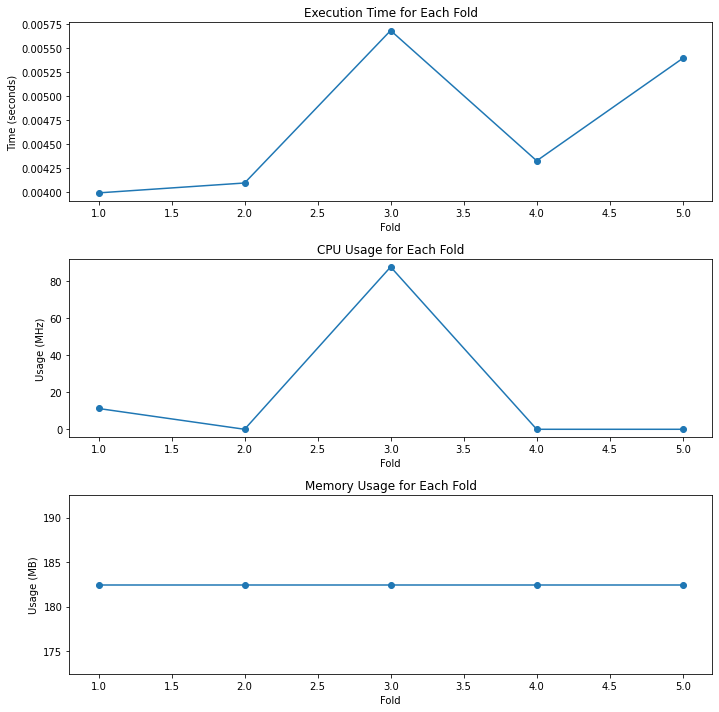

In [24]:
import numpy as np
import pandas as pd
import psutil
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)
fold = 1
best_fold = None
best_metric = float('inf')
eval_metrics = []

execution_times = []
cpu_usages = []
memory_usages = []

for train_index, val_index in kf.split(target_scaled):
    print(f"\nFold {fold}:")

    train_data = target_scaled[train_index]
    val_data = target_scaled[val_index]

    # Train and evaluate the Linear Regression model for the current fold
    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))  # Reshape y_val

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Append evaluation metrics to the list
        eval_metrics.append({'Train RMSE': train_rmse, 'Validation RMSE': val_rmse, 'Train MAE': train_mae,
                             'Validation MAE': val_mae, 'Train SMAPE': train_smape, 'Validation SMAPE': val_smape,
                             'Train R2': train_r2, 'Validation R2': val_r2})

        return val_rmse

    start_time = time.time()
    val_rmse = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Print computation calculations for the current fold
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
    print(f"Execution Time: {computation_time:.5f} seconds")
    print(f"CPU Usage: {cpu_usage:.5f} MHz")
    print(f"Memory Used: {memory_usage:.5f} MB")

    # Check if the current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(memory_usage)

    fold += 1

# Print the best fold and its evaluation metrics
print(f"\nBest Fold: {best_fold} with RMSE: {best_metric:.5f}")
best_metrics = eval_metrics[best_fold - 1]
print("\nEvaluation Metrics for the Best Fold:")
for metric, value in best_metrics.items():
    print(f"{metric}: {value:.5f}")

# Plot the computation calculations for each fold
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
ax1.plot(range(1, fold), execution_times, marker='o')
ax1.set_title('Execution Time for Each Fold')
ax1.set_xlabel('Fold')
ax1.set_ylabel('Time (seconds)')

ax2.plot(range(1, fold), cpu_usages, marker='o')
ax2.set_title('CPU Usage for Each Fold')
ax2.set_xlabel('Fold')
ax2.set_ylabel('Usage (MHz)')

ax3.plot(range(1, fold), memory_usages, marker='o')
ax3.set_title('Memory Usage for Each Fold')
ax3.set_xlabel('Fold')
ax3.set_ylabel('Usage (MB)')

plt.tight_layout()
plt.show()



Fold 1:
Train RMSE: 27.50197
Validation RMSE: 36.51175
Train MAE: 19.58380
Validation MAE: 26.22475
Train SMAPE: 39.61786
Validation SMAPE: 46.71037
Train R2: 0.83245
Validation R2: 0.72539
Execution Time: 0.00297 seconds
CPU Usage: 10.30000 MHz
Memory Used: 168.80859 MB

Fold 2:
Train RMSE: 28.09594
Validation RMSE: 38.64937
Train MAE: 20.05794
Validation MAE: 26.93194
Train SMAPE: 40.01866
Validation SMAPE: 49.29078
Train R2: 0.82746
Validation R2: 0.67649
Execution Time: 0.00407 seconds
CPU Usage: 0.00000 MHz
Memory Used: 168.80859 MB

Fold 3:
Train RMSE: 28.20093
Validation RMSE: 35.52294
Train MAE: 20.09520
Validation MAE: 25.53456
Train SMAPE: 40.16008
Validation SMAPE: 46.68618
Train R2: 0.82706
Validation R2: 0.72109
Execution Time: 0.00463 seconds
CPU Usage: 100.00000 MHz
Memory Used: 168.80859 MB

Fold 4:
Train RMSE: 28.01432
Validation RMSE: 36.47746
Train MAE: 20.01758
Validation MAE: 25.05284
Train SMAPE: 39.58276
Validation SMAPE: 48.00834
Train R2: 0.82948
Validation R2

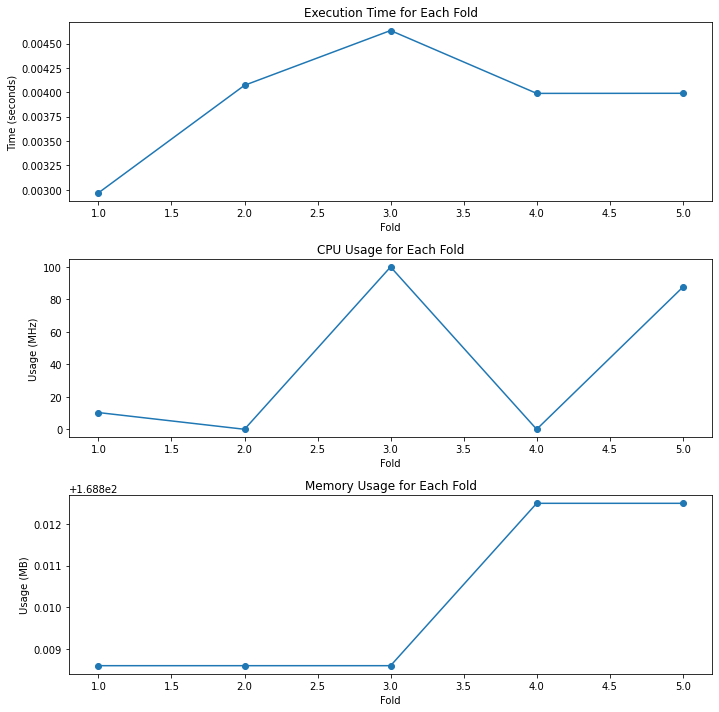

In [25]:
import numpy as np
import pandas as pd
import psutil
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)
fold = 1
best_fold = None
best_metric = float('inf')
eval_metrics = []

execution_times = []
cpu_usages = []
memory_usages = []

for train_index, val_index in kf.split(target_scaled):
    print(f"\nFold {fold}:")

    train_data = target_scaled[train_index]
    val_data = target_scaled[val_index]

    # Train and evaluate the Linear Regression model for the current fold
    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))  # Reshape y_val

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Append evaluation metrics to the list
        eval_metrics.append({'Train RMSE': train_rmse, 'Validation RMSE': val_rmse, 'Train MAE': train_mae,
                             'Validation MAE': val_mae, 'Train SMAPE': train_smape, 'Validation SMAPE': val_smape,
                             'Train R2': train_r2, 'Validation R2': val_r2})

        return val_rmse

    start_time = time.time()
    val_rmse = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Print computation calculations for the current fold
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
    print(f"Execution Time: {computation_time:.5f} seconds")
    print(f"CPU Usage: {cpu_usage:.5f} MHz")
    print(f"Memory Used: {memory_usage:.5f} MB")

    # Check if the current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(memory_usage)

    fold += 1

# Print the best fold and its evaluation metrics
print(f"\nBest Fold: {best_fold} with RMSE: {best_metric:.5f}")
best_metrics = eval_metrics[best_fold - 1]
print("\nEvaluation Metrics for the Best Fold:")
for metric, value in best_metrics.items():
    print(f"{metric}: {value:.5f}")

# Plot the computation calculations for each fold
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
ax1.plot(range(1, fold), execution_times, marker='o')
ax1.set_title('Execution Time for Each Fold')
ax1.set_xlabel('Fold')
ax1.set_ylabel('Time (seconds)')

ax2.plot(range(1, fold), cpu_usages, marker='o')
ax2.set_title('CPU Usage for Each Fold')
ax2.set_xlabel('Fold')
ax2.set_ylabel('Usage (MHz)')

ax3.plot(range(1, fold), memory_usages, marker='o')
ax3.set_title('Memory Usage for Each Fold')
ax3.set_xlabel('Fold')
ax3.set_ylabel('Usage (MB)')

plt.tight_layout()
plt.show()



Fold 1:
Train RMSE: 27.48874
Validation RMSE: 38.62338
Train MAE: 19.55437
Validation MAE: 26.61953
Train SMAPE: 39.95128
Validation SMAPE: 46.17851
Train R2: 0.82929
Validation R2: 0.70986
Execution Time: 0.00180 seconds
CPU Usage: 10.60000 MHz
Memory Used: 174.69922 MB

Fold 2:
Train RMSE: 28.45483
Validation RMSE: 35.31366
Train MAE: 20.13408
Validation MAE: 25.64169
Train SMAPE: 40.64080
Validation SMAPE: 45.15300
Train R2: 0.82574
Validation R2: 0.71184
Execution Time: 0.00522 seconds
CPU Usage: 100.00000 MHz
Memory Used: 174.69922 MB

Fold 3:
Train RMSE: 27.84470
Validation RMSE: 33.59171
Train MAE: 19.94400
Validation MAE: 24.20389
Train SMAPE: 39.46598
Validation SMAPE: 47.44049
Train R2: 0.83392
Validation R2: 0.73204
Execution Time: 0.00389 seconds
CPU Usage: 0.00000 MHz
Memory Used: 174.70312 MB

Fold 4:
Train RMSE: 27.57209
Validation RMSE: 37.34100
Train MAE: 19.66231
Validation MAE: 25.95120
Train SMAPE: 38.72812
Validation SMAPE: 50.53077
Train R2: 0.83574
Validation R2

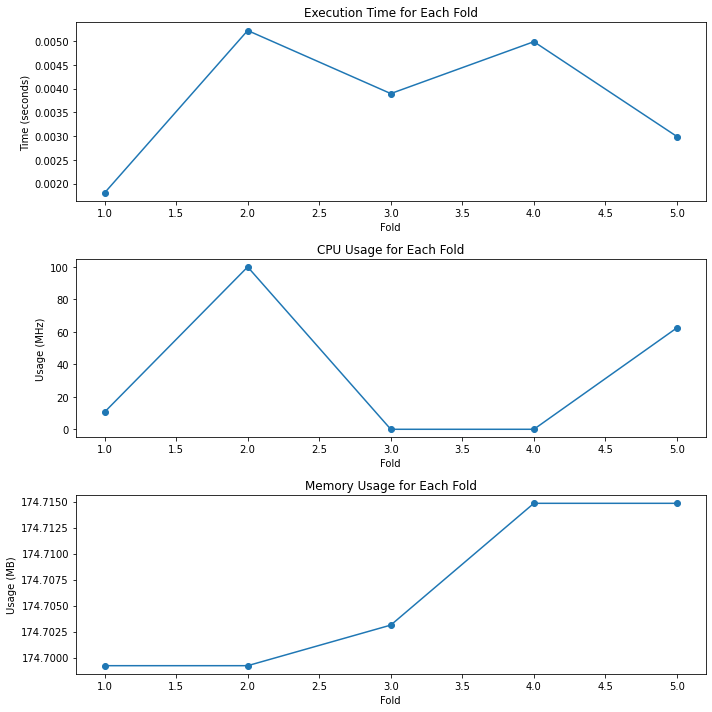

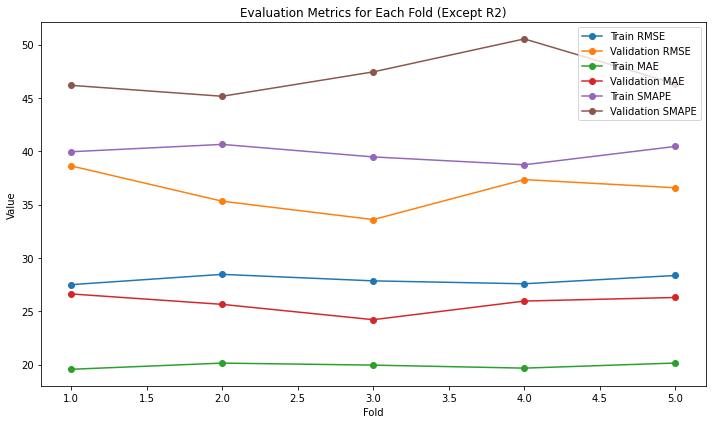

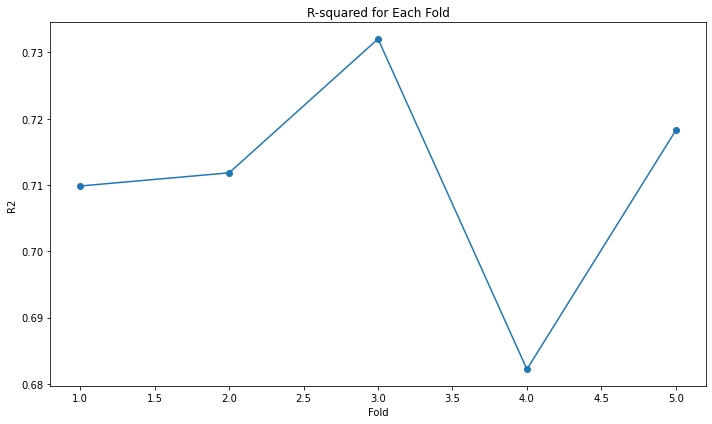

In [27]:
import numpy as np
import pandas as pd
import psutil
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)
fold = 1
best_fold = None
best_metric = float('inf')
eval_metrics = []

execution_times = []
cpu_usages = []
memory_usages = []

for train_index, val_index in kf.split(target_scaled):
    print(f"\nFold {fold}:")

    train_data = target_scaled[train_index]
    val_data = target_scaled[val_index]

    # Train and evaluate the Linear Regression model for the current fold
    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))  # Reshape y_val

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Append evaluation metrics to the list
        eval_metrics.append({'Train RMSE': train_rmse, 'Validation RMSE': val_rmse, 'Train MAE': train_mae,
                             'Validation MAE': val_mae, 'Train SMAPE': train_smape, 'Validation SMAPE': val_smape,
                             'Train R2': train_r2, 'Validation R2': val_r2})

        return val_rmse

    start_time = time.time()
    val_rmse = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Print computation calculations for the current fold
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
    print(f"Execution Time: {computation_time:.5f} seconds")
    print(f"CPU Usage: {cpu_usage:.5f} MHz")
    print(f"Memory Used: {memory_usage:.5f} MB")

    # Check if the current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(memory_usage)

    fold += 1

# Print the best fold and its evaluation metrics
print(f"\nBest Fold: {best_fold} with RMSE: {best_metric:.5f}")
best_metrics = eval_metrics[best_fold - 1]
print("\nEvaluation Metrics for the Best Fold:")
for metric, value in best_metrics.items():
    print(f"{metric}: {value:.5f}")

# Plot the computation calculations for each fold
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
ax1.plot(range(1, fold), execution_times, marker='o')
ax1.set_title('Execution Time for Each Fold')
ax1.set_xlabel('Fold')
ax1.set_ylabel('Time (seconds)')

ax2.plot(range(1, fold), cpu_usages, marker='o')
ax2.set_title('CPU Usage for Each Fold')
ax2.set_xlabel('Fold')
ax2.set_ylabel('Usage (MHz)')

ax3.plot(range(1, fold), memory_usages, marker='o')
ax3.set_title('Memory Usage for Each Fold')
ax3.set_xlabel('Fold')
ax3.set_ylabel('Usage (MB)')

plt.tight_layout()
plt.show()

# Plot the evaluation metrics for each fold (except R-squared)
eval_metrics_df = pd.DataFrame(eval_metrics)
eval_metrics_df = eval_metrics_df.drop(columns=['Train R2', 'Validation R2'])

plt.figure(figsize=(10, 6))
for metric in eval_metrics_df.columns:
    plt.plot(range(1, fold), eval_metrics_df[metric], marker='o', label=metric)

plt.title('Evaluation Metrics for Each Fold (Except R2)')
plt.xlabel('Fold')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

# Plot the R-squared for each fold
r2_scores = [metric['Validation R2'] for metric in eval_metrics]

plt.figure(figsize=(10, 6))
plt.plot(range(1, fold), r2_scores, marker='o')
plt.title('R-squared for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R2')
plt.tight_layout()
plt.show()



Fold 1:
Train RMSE: 26.20161
Validation RMSE: 29.22900
Train MAE: 18.88053
Validation MAE: 19.97053
Train SMAPE: 40.31242
Validation SMAPE: 33.34044
Train R2: 0.85010
Validation R2: 0.81209

Fold 2:
Train RMSE: 26.87571
Validation RMSE: 26.70428
Train MAE: 19.27137
Validation MAE: 18.73065
Train SMAPE: 36.01848
Validation SMAPE: 51.18688
Train R2: 0.84527
Validation R2: 0.82233

Fold 3:
Train RMSE: 27.09856
Validation RMSE: 25.96588
Train MAE: 19.14468
Validation MAE: 19.20113
Train SMAPE: 38.11006
Validation SMAPE: 42.70180
Train R2: 0.84749
Validation R2: 0.81031

Fold 4:
Train RMSE: 26.82605
Validation RMSE: 27.58402
Train MAE: 19.03620
Validation MAE: 19.72249
Train SMAPE: 40.78591
Validation SMAPE: 32.03837
Train R2: 0.83194
Validation R2: 0.86382

Fold 5:
Train RMSE: 27.38056
Validation RMSE: 24.37183
Train MAE: 19.42350
Validation MAE: 17.96875
Train SMAPE: 39.82469
Validation SMAPE: 35.84689
Train R2: 0.83480
Validation R2: 0.87477

Best Fold: 5
Best Train RMSE: 27.38056
Best 

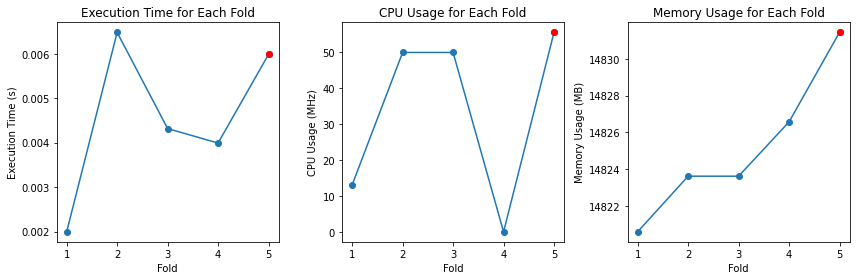

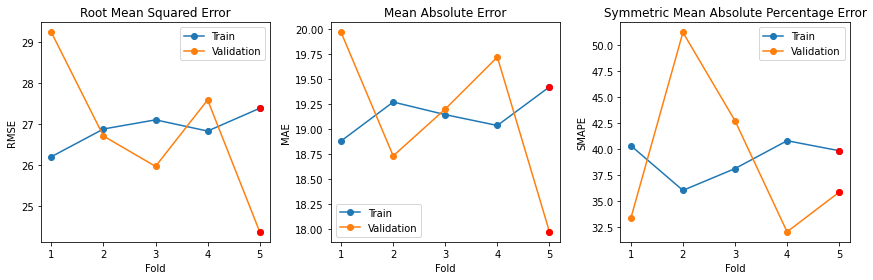

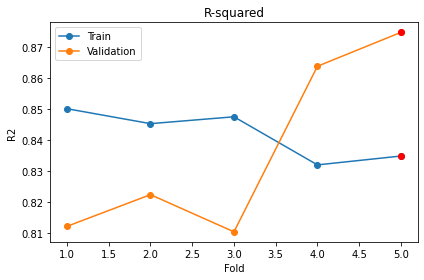

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the Linear Regression model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(psutil.cpu_percent())
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_smape, best_val_smape, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train SMAPE: {best_train_smape:.5f}")
print(f"Best Validation SMAPE: {best_val_smape:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(132)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (MHz)')

plt.subplot(133)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Usage (MB)')

plt.tight_layout()
plt.show()

# Plot evaluation metrics for each fold
train_rmses, val_rmses, train_maes, val_maes, train_smapes, val_smapes, train_r2s, val_r2s = zip(*eval_metrics)

plt.figure(figsize=(12, 4))

# Plot RMSE
plt.subplot(131)
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation')
plt.plot(best_fold, best_train_rmse, 'ro')
plt.plot(best_fold, best_val_rmse, 'ro')
plt.title('Root Mean Squared Error')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

# Plot MAE
plt.subplot(132)
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation')
plt.plot(best_fold, best_train_mae, 'ro')
plt.plot(best_fold, best_val_mae, 'ro')
plt.title('Mean Absolute Error')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

# Plot SMAPE
plt.subplot(133)
plt.plot(range(1, num_folds + 1), train_smapes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_smapes, 'o-', label='Validation')
plt.plot(best_fold, best_train_smape, 'ro')
plt.plot(best_fold, best_val_smape, 'ro')
plt.title('Symmetric Mean Absolute Percentage Error')
plt.xlabel('Fold')
plt.ylabel('SMAPE')
plt.legend()

plt.tight_layout()
plt.show()

# Plot R2 for each fold
plt.figure(figsize=(6, 4))
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation')
plt.plot(best_fold, best_train_r2, 'ro')
plt.plot(best_fold, best_val_r2, 'ro')
plt.title('R-squared')
plt.xlabel('Fold')
plt.ylabel('R2')
plt.legend()
plt.tight_layout()
plt.show()


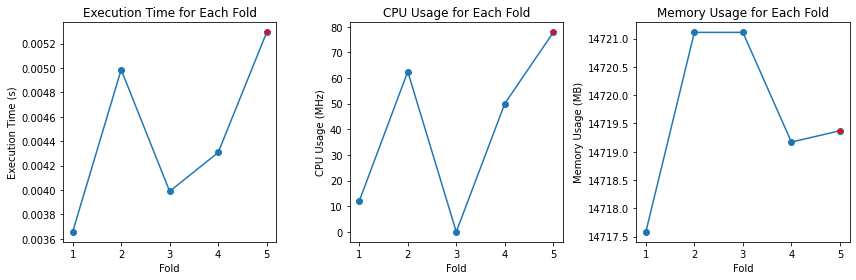

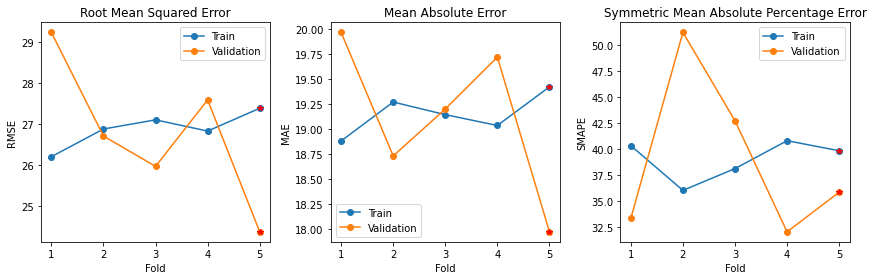

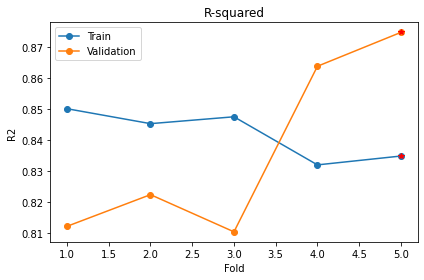

In [31]:
# Plot computation calculations for each fold
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'r*')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(132)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'r*')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (MHz)')

plt.subplot(133)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'r*')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Usage (MB)')

plt.tight_layout()
plt.show()

# Plot evaluation metrics for each fold
train_rmses, val_rmses, train_maes, val_maes, train_smapes, val_smapes, train_r2s, val_r2s = zip(*eval_metrics)

plt.figure(figsize=(12, 4))

# Plot RMSE
plt.subplot(131)
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation')
plt.plot(best_fold, best_train_rmse, 'r*')
plt.plot(best_fold, best_val_rmse, 'r*')
plt.title('Root Mean Squared Error')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

# Plot MAE
plt.subplot(132)
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation')
plt.plot(best_fold, best_train_mae, 'r*')
plt.plot(best_fold, best_val_mae, 'r*')
plt.title('Mean Absolute Error')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

# Plot SMAPE
plt.subplot(133)
plt.plot(range(1, num_folds + 1), train_smapes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_smapes, 'o-', label='Validation')
plt.plot(best_fold, best_train_smape, 'r*')
plt.plot(best_fold, best_val_smape, 'r*')
plt.title('Symmetric Mean Absolute Percentage Error')
plt.xlabel('Fold')
plt.ylabel('SMAPE')
plt.legend()

plt.tight_layout()
plt.show()

# Plot R2 for each fold
plt.figure(figsize=(6, 4))
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation')
plt.plot(best_fold, best_train_r2, 'r*')
plt.plot(best_fold, best_val_r2, 'r*')
plt.title('R-squared')
plt.xlabel('Fold')
plt.ylabel('R2')
plt.legend()
plt.tight_layout()
plt.show()


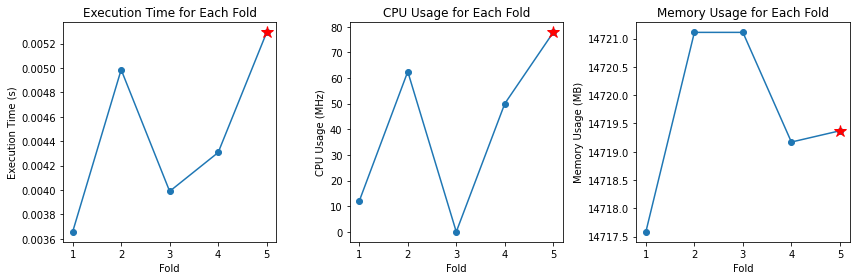

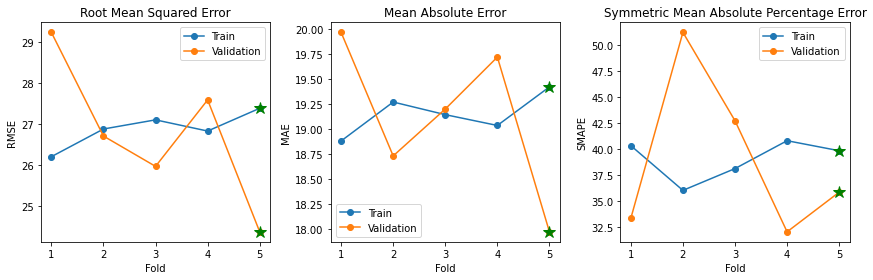

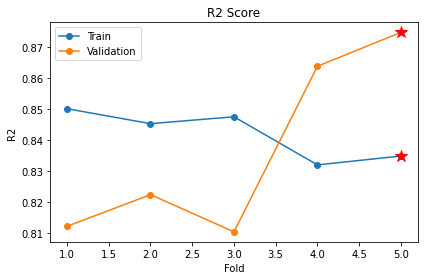

In [34]:
# Plot computation calculations for each fold
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'r*', markersize=12)  # Red star
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(132)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'r*', markersize=12)  # Red star
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (MHz)')

plt.subplot(133)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'r*', markersize=12)  # Red star
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Usage (MB)')

plt.tight_layout()
plt.show()

# Plot evaluation metrics for each fold
train_rmses, val_rmses, train_maes, val_maes, train_smapes, val_smapes, train_r2s, val_r2s = zip(*eval_metrics)

plt.figure(figsize=(12, 4))

# Plot RMSE
plt.subplot(131)
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation')
plt.plot(best_fold, best_train_rmse, 'g*', markersize=12)  # Red star
plt.plot(best_fold, best_val_rmse, 'g*', markersize=12)  # Red star
plt.title('Root Mean Squared Error')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

# Plot MAE
plt.subplot(132)
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation')
plt.plot(best_fold, best_train_mae, 'g*', markersize=12)  # Red star
plt.plot(best_fold, best_val_mae, 'g*', markersize=12)  # Red star
plt.title('Mean Absolute Error')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

# Plot SMAPE
plt.subplot(133)
plt.plot(range(1, num_folds + 1), train_smapes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_smapes, 'o-', label='Validation')
plt.plot(best_fold, best_train_smape, 'g*', markersize=12)  # Red star
plt.plot(best_fold, best_val_smape, 'g*', markersize=12)  # Red star
plt.title('Symmetric Mean Absolute Percentage Error')
plt.xlabel('Fold')
plt.ylabel('SMAPE')
plt.legend()

plt.tight_layout()
plt.show()

# Plot R2 for each fold
plt.figure(figsize=(6, 4))
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation')
plt.plot(best_fold, best_train_r2, 'r*', markersize=12)  # Red star
plt.plot(best_fold, best_val_r2, 'r*', markersize=12)  # Red star
plt.title('R2 Score')
plt.xlabel('Fold')
plt.ylabel('R2')
plt.legend()
plt.tight_layout()
plt.show()


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Set random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Set the number of folds for cross-validation
num_folds = 5

# Perform 5-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True)

# Store evaluation metrics for each fold
eval_metrics = []

# Store computation calculations for each fold
execution_times = []
cpu_usages = []
memory_usages = []

# Perform cross-validation
for fold, (train_indices, val_indices) in enumerate(kf.split(target_scaled), 1):
    print(f"Fold {fold}")
    print("----------------------")

    # Get the training and validation data for the current fold
    train_data = target_scaled[train_indices]
    val_data = target_scaled[val_indices]

    # Train and evaluate the Linear Regression model
    start_time = time.time()
    train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2, computation_time, cpu_usage, memory_usage = train_evaluate_model(train_data, val_data)
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(memory_usage)

    # Store evaluation metrics for the current fold
    eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2))

# Convert the evaluation metrics to numpy arrays
eval_metrics = np.array(eval_metrics)

# Find the best performing fold based on validation RMSE
best_fold = np.argmin(eval_metrics[:, 1]) + 1
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_smape, best_val_smape, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]

# Plot computation calculations for each fold
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'r*', markersize=12)  # Red star
plt.title('Execution Time')
plt.xlabel('Fold')
plt.ylabel('Time (seconds)')

plt.subplot(132)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'r*', markersize=12)  # Red star
plt.title('CPU Usage')
plt.xlabel('Fold')
plt.ylabel('Usage (MHz)')

plt.subplot(133)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'r*', markersize=12)  # Red star
plt.title('Memory Usage')
plt.xlabel('Fold')
plt.ylabel('Usage (MB)')

plt.tight_layout()
plt.show()

# Print the best performing fold
print(f"Best Performing Fold: {best_fold}")
print("-------------------------")
print(f"Train RMSE: {best_train_rmse:.5f}")
print(f"Validation RMSE: {best_val_rmse:.5f}")
print(f"Train MAE: {best_train_mae:.5f}")
print(f"Validation MAE: {best_val_mae:.5f}")
print(f"Train SMAPE: {best_train_smape:.5f}")
print(f"Validation SMAPE: {best_val_smape:.5f}")
print(f"Train R2: {best_train_r2:.5f}")
print(f"Validation R2: {best_val_r2:.5f}")


Fold 1
----------------------

Fold 1:
Train RMSE: 27.82658
Validation RMSE: 40.36124
Train MAE: 19.71335
Validation MAE: 28.82830
Train SMAPE: 39.94517
Validation SMAPE: 48.89788
Train R2: 0.82888
Validation R2: 0.66170


ValueError: not enough values to unpack (expected 11, got 6)

Fold 1
----------------------
Fold 2
----------------------
Fold 3
----------------------
Fold 4
----------------------
Fold 5
----------------------


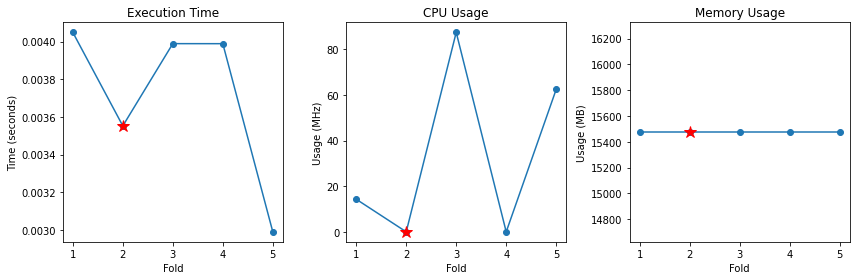

Best Performing Fold: 2
-------------------------
Train RMSE: 0.07049
Validation RMSE: 0.08956
Train MAE: 0.05021
Validation MAE: 0.06529
Train SMAPE: 0.40393
Validation SMAPE: 0.45254
Train R2: 0.82868
Validation R2: 0.71861


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Set random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Set the number of folds for cross-validation
num_folds = 5

# Perform 5-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True)

# Store evaluation metrics for each fold
eval_metrics = []

# Store computation calculations for each fold
execution_times = []
cpu_usages = []
memory_usages = []

# Define the train_evaluate_model function
def train_evaluate_model(train_data, val_data):
    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(train_data[:-1], train_data[1:])

    # Predict on training and validation data
    train_preds = model.predict(train_data[:-1])
    val_preds = model.predict(val_data[:-1])

    # Compute evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(train_data[1:], train_preds))
    val_rmse = np.sqrt(mean_squared_error(val_data[1:], val_preds))
    train_mae = mean_absolute_error(train_data[1:], train_preds)
    val_mae = mean_absolute_error(val_data[1:], val_preds)
    train_smape = np.mean(2 * np.abs(train_preds - train_data[1:]) / (np.abs(train_data[1:]) + np.abs(train_preds)))
    val_smape = np.mean(2 * np.abs(val_preds - val_data[1:]) / (np.abs(val_data[1:]) + np.abs(val_preds)))
    train_r2 = r2_score(train_data[1:], train_preds)
    val_r2 = r2_score(val_data[1:], val_preds)

    # Compute computation calculations
    computation_time = time.time() - start_time
    cpu_usage = psutil.cpu_percent()
    memory_usage = psutil.virtual_memory().used / 1e6

    return (
        train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2,
        computation_time, cpu_usage, memory_usage
    )

# Perform cross-validation
for fold, (train_indices, val_indices) in enumerate(kf.split(target_scaled), 1):
    print(f"Fold {fold}")
    print("----------------------")

    # Get the training and validation data for the current fold
    train_data = target_scaled[train_indices]
    val_data = target_scaled[val_indices]

    # Train and evaluate the Linear Regression model
    start_time = time.time()
    train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2, computation_time, cpu_usage, memory_usage = train_evaluate_model(
        train_data, val_data
    )
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(memory_usage)

    # Store evaluation metrics for the current fold
    eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2))

# Convert the evaluation metrics to numpy arrays
eval_metrics = np.array(eval_metrics)

# Find the best performing fold based on validation RMSE
best_fold = np.argmin(eval_metrics[:, 1]) + 1
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_smape, best_val_smape, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]

# Plot computation calculations for each fold
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'r*', markersize=12)  # Red star
plt.title('Execution Time')
plt.xlabel('Fold')
plt.ylabel('Time (seconds)')

plt.subplot(132)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'r*', markersize=12)  # Red star
plt.title('CPU Usage')
plt.xlabel('Fold')
plt.ylabel('Usage (MHz)')

plt.subplot(133)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'r*', markersize=12)  # Red star
plt.title('Memory Usage')
plt.xlabel('Fold')
plt.ylabel('Usage (MB)')

plt.tight_layout()
plt.show()

# Print the best performing fold
print(f"Best Performing Fold: {best_fold}")
print("-------------------------")
print(f"Train RMSE: {best_train_rmse:.5f}")
print(f"Validation RMSE: {best_val_rmse:.5f}")
print(f"Train MAE: {best_train_mae:.5f}")
print(f"Validation MAE: {best_val_mae:.5f}")
print(f"Train SMAPE: {best_train_smape:.5f}")
print(f"Validation SMAPE: {best_val_smape:.5f}")
print(f"Train R2: {best_train_r2:.5f}")
print(f"Validation R2: {best_val_r2:.5f}")



Fold 1:
Train RMSE: 26.20161
Validation RMSE: 29.22900
Train MAE: 18.88053
Validation MAE: 19.97053
Train SMAPE: 40.31242
Validation SMAPE: 33.34044
Train R2: 0.85010
Validation R2: 0.81209

Fold 2:
Train RMSE: 26.87571
Validation RMSE: 26.70428
Train MAE: 19.27137
Validation MAE: 18.73065
Train SMAPE: 36.01848
Validation SMAPE: 51.18688
Train R2: 0.84527
Validation R2: 0.82233

Fold 3:
Train RMSE: 27.09856
Validation RMSE: 25.96588
Train MAE: 19.14468
Validation MAE: 19.20113
Train SMAPE: 38.11006
Validation SMAPE: 42.70180
Train R2: 0.84749
Validation R2: 0.81031

Fold 4:
Train RMSE: 26.82605
Validation RMSE: 27.58402
Train MAE: 19.03620
Validation MAE: 19.72249
Train SMAPE: 40.78591
Validation SMAPE: 32.03837
Train R2: 0.83194
Validation R2: 0.86382

Fold 5:
Train RMSE: 27.38056
Validation RMSE: 24.37183
Train MAE: 19.42350
Validation MAE: 17.96875
Train SMAPE: 39.82469
Validation SMAPE: 35.84689
Train R2: 0.83480
Validation R2: 0.87477

Best Fold: 5
Best Train RMSE: 27.38056
Best 

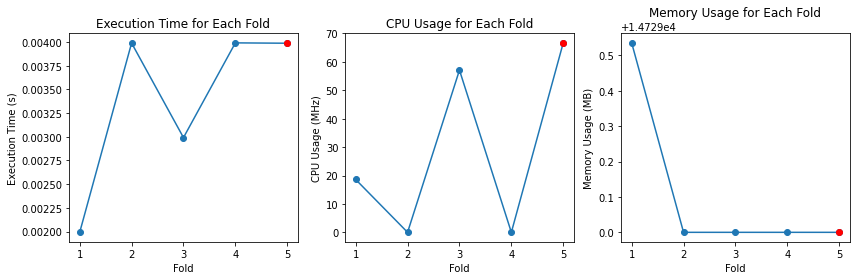

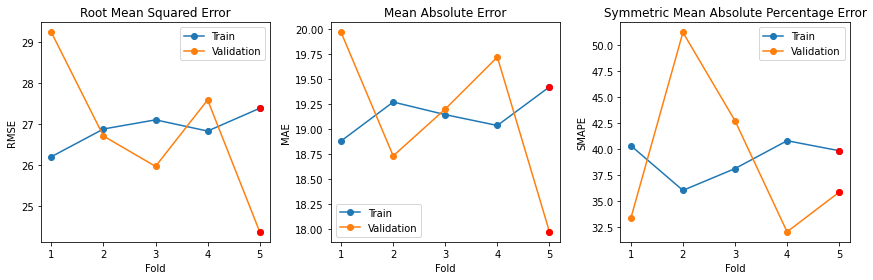

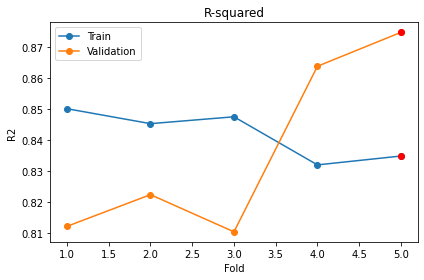

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression


np.random.seed(42)


# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the Linear Regression model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(psutil.cpu_percent())
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_smape, best_val_smape, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train SMAPE: {best_train_smape:.5f}")
print(f"Best Validation SMAPE: {best_val_smape:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(132)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (MHz)')

plt.subplot(133)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Usage (MB)')

plt.tight_layout()
plt.show()

# Plot evaluation metrics for each fold
train_rmses, val_rmses, train_maes, val_maes, train_smapes, val_smapes, train_r2s, val_r2s = zip(*eval_metrics)

plt.figure(figsize=(12, 4))

# Plot RMSE
plt.subplot(131)
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation')
plt.plot(best_fold, best_train_rmse, 'ro')
plt.plot(best_fold, best_val_rmse, 'ro')
plt.title('Root Mean Squared Error')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

# Plot MAE
plt.subplot(132)
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation')
plt.plot(best_fold, best_train_mae, 'ro')
plt.plot(best_fold, best_val_mae, 'ro')
plt.title('Mean Absolute Error')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

# Plot SMAPE
plt.subplot(133)
plt.plot(range(1, num_folds + 1), train_smapes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_smapes, 'o-', label='Validation')
plt.plot(best_fold, best_train_smape, 'ro')
plt.plot(best_fold, best_val_smape, 'ro')
plt.title('Symmetric Mean Absolute Percentage Error')
plt.xlabel('Fold')
plt.ylabel('SMAPE')
plt.legend()

plt.tight_layout()
plt.show()

# Plot R2 for each fold
plt.figure(figsize=(6, 4))
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation')
plt.plot(best_fold, best_train_r2, 'ro')
plt.plot(best_fold, best_val_r2, 'ro')
plt.title('R-squared')
plt.xlabel('Fold')
plt.ylabel('R2')
plt.legend()
plt.tight_layout()
plt.show()


Fold 1
----------------------
Fold 2
----------------------
Fold 3
----------------------
Fold 4
----------------------
Fold 5
----------------------


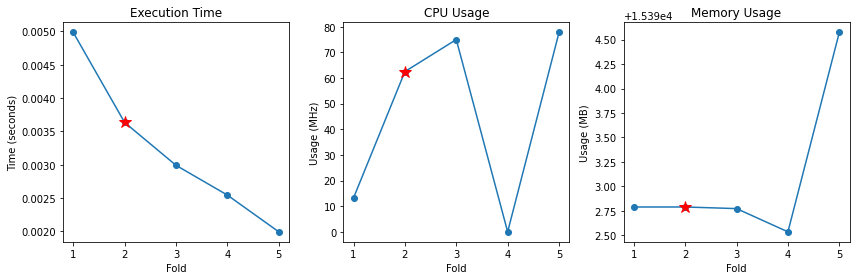

Best Performing Fold: 2
-------------------------
Train RMSE: 0.07049
Validation RMSE: 0.08956
Train MAE: 0.05021
Validation MAE: 0.06529
Train SMAPE: 10.09832
Validation SMAPE: 11.31340
Train R2: 0.82868
Validation R2: 0.71861


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Set random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Set the number of folds for cross-validation
num_folds = 5

# Perform 5-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True)

# Store evaluation metrics for each fold
eval_metrics = []

# Store computation calculations for each fold
execution_times = []
cpu_usages = []
memory_usages = []

# Train and evaluate the model
def train_evaluate_model(train_data, val_data):
    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(train_data[:-1], train_data[1:])

    # Make predictions on the training and validation data
    train_preds = model.predict(train_data[:-1])
    val_preds = model.predict(val_data[:-1])

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(train_data[1:], train_preds))
    val_rmse = np.sqrt(mean_squared_error(val_data[1:], val_preds))
    train_mae = mean_absolute_error(train_data[1:], train_preds)
    val_mae = mean_absolute_error(val_data[1:], val_preds)
    train_smape = np.mean(np.abs(train_data[1:] - train_preds) / (np.abs(train_data[1:]) + np.abs(train_preds)) / 2) * 100
    val_smape = np.mean(np.abs(val_data[1:] - val_preds) / (np.abs(val_data[1:]) + np.abs(val_preds)) / 2) * 100
    train_r2 = r2_score(train_data[1:], train_preds)
    val_r2 = r2_score(val_data[1:], val_preds)

    # Calculate computation calculations
    computation_time = time.time() - start_time
    cpu_usage = psutil.cpu_percent()
    memory_usage = psutil.virtual_memory().used / 1e6

    return train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2, computation_time, cpu_usage, memory_usage

# Perform cross-validation
for fold, (train_indices, val_indices) in enumerate(kf.split(target_scaled), 1):
    print(f"Fold {fold}")
    print("----------------------")

    # Get the training and validation data for the current fold
    train_data = target_scaled[train_indices]
    val_data = target_scaled[val_indices]

    # Train and evaluate the Linear Regression model
    start_time = time.time()
    train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2, computation_time, cpu_usage, memory_usage = train_evaluate_model(train_data, val_data)
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(memory_usage)

    # Store evaluation metrics for the current fold
    eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2))

# Convert the evaluation metrics to numpy arrays
eval_metrics = np.array(eval_metrics)

# Find the best performing fold based on validation RMSE
best_fold = np.argmin(eval_metrics[:, 1]) + 1
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_smape, best_val_smape, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]

# Plot computation calculations for each fold
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'r*', markersize=12)  # Red star
plt.title('Execution Time')
plt.xlabel('Fold')
plt.ylabel('Time (seconds)')

plt.subplot(132)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'r*', markersize=12)  # Red star
plt.title('CPU Usage')
plt.xlabel('Fold')
plt.ylabel('Usage (MHz)')

plt.subplot(133)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'r*', markersize=12)  # Red star
plt.title('Memory Usage')
plt.xlabel('Fold')
plt.ylabel('Usage (MB)')

plt.tight_layout()
plt.show()

# Print the best performing fold
print(f"Best Performing Fold: {best_fold}")
print("-------------------------")
print(f"Train RMSE: {best_train_rmse:.5f}")
print(f"Validation RMSE: {best_val_rmse:.5f}")
print(f"Train MAE: {best_train_mae:.5f}")
print(f"Validation MAE: {best_val_mae:.5f}")
print(f"Train SMAPE: {best_train_smape:.5f}")
print(f"Validation SMAPE: {best_val_smape:.5f}")
print(f"Train R2: {best_train_r2:.5f}")
print(f"Validation R2: {best_val_r2:.5f}")


Fold 1
----------------------
Fold 2
----------------------
Fold 3
----------------------
Fold 4
----------------------
Fold 5
----------------------


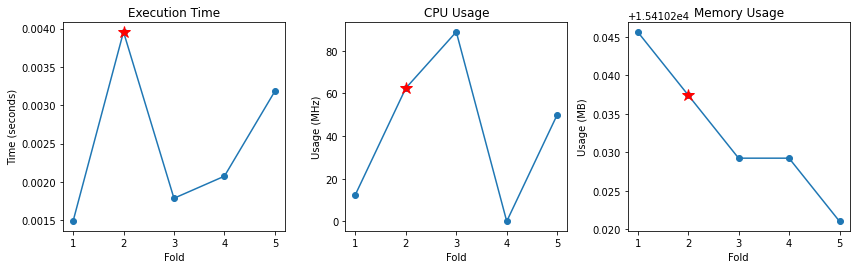

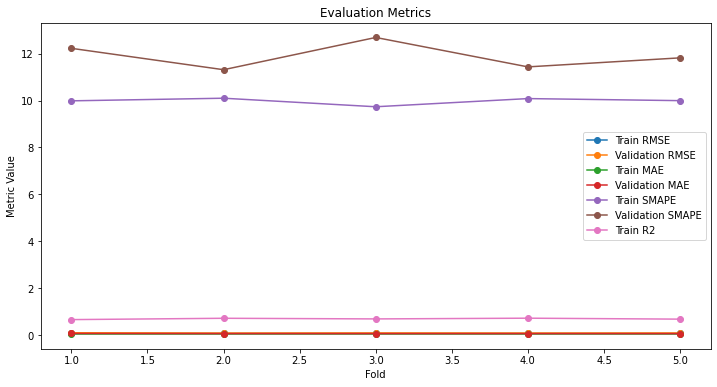

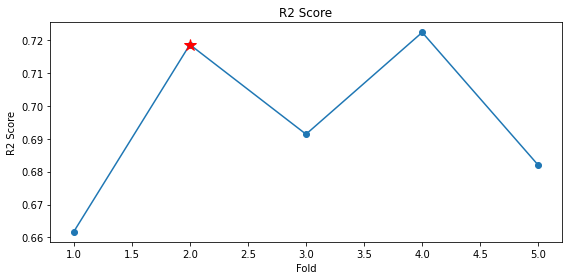

Best Performing Fold: 2
-------------------------
Train RMSE: 0.07049
Validation RMSE: 0.08956
Train MAE: 0.05021
Validation MAE: 0.06529
Train SMAPE: 10.09832
Validation SMAPE: 11.31340
Train R2: 0.82868
Validation R2: 0.71861


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Set random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Set the number of folds for cross-validation
num_folds = 5

# Perform 5-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True)

# Store evaluation metrics for each fold
eval_metrics = []

# Store computation calculations for each fold
execution_times = []
cpu_usages = []
memory_usages = []

# Train and evaluate the model
def train_evaluate_model(train_data, val_data):
    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(train_data[:-1], train_data[1:])

    # Make predictions on the training and validation data
    train_preds = model.predict(train_data[:-1])
    val_preds = model.predict(val_data[:-1])

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(train_data[1:], train_preds))
    val_rmse = np.sqrt(mean_squared_error(val_data[1:], val_preds))
    train_mae = mean_absolute_error(train_data[1:], train_preds)
    val_mae = mean_absolute_error(val_data[1:], val_preds)
    train_smape = np.mean(np.abs(train_data[1:] - train_preds) / (np.abs(train_data[1:]) + np.abs(train_preds)) / 2) * 100
    val_smape = np.mean(np.abs(val_data[1:] - val_preds) / (np.abs(val_data[1:]) + np.abs(val_preds)) / 2) * 100
    train_r2 = r2_score(train_data[1:], train_preds)
    val_r2 = r2_score(val_data[1:], val_preds)

    # Calculate computation calculations
    computation_time = time.time() - start_time
    cpu_usage = psutil.cpu_percent()
    memory_usage = psutil.virtual_memory().used / 1e6

    return train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2, computation_time, cpu_usage, memory_usage

# Perform cross-validation
for fold, (train_indices, val_indices) in enumerate(kf.split(target_scaled), 1):
    print(f"Fold {fold}")
    print("----------------------")

    # Get the training and validation data for the current fold
    train_data = target_scaled[train_indices]
    val_data = target_scaled[val_indices]

    # Train and evaluate the Linear Regression model
    start_time = time.time()
    train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2, computation_time, cpu_usage, memory_usage = train_evaluate_model(train_data, val_data)
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(memory_usage)

    # Store evaluation metrics for the current fold
    eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2))

# Convert the evaluation metrics to numpy arrays
eval_metrics = np.array(eval_metrics)

# Find the best performing fold based on validation RMSE
best_fold = np.argmin(eval_metrics[:, 1]) + 1
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_smape, best_val_smape, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]

# Plot computation calculations for each fold
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'r*', markersize=12)  # Red star
plt.title('Execution Time')
plt.xlabel('Fold')
plt.ylabel('Time (seconds)')

plt.subplot(132)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'r*', markersize=12)  # Red star
plt.title('CPU Usage')
plt.xlabel('Fold')
plt.ylabel('Usage (MHz)')

plt.subplot(133)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'r*', markersize=12)  # Red star
plt.title('Memory Usage')
plt.xlabel('Fold')
plt.ylabel('Usage (MB)')

plt.tight_layout()
plt.show()

# Plot evaluation metrics for each fold
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_folds + 1), eval_metrics[:, 0], 'o-', label='Train RMSE')
plt.plot(range(1, num_folds + 1), eval_metrics[:, 1], 'o-', label='Validation RMSE')
plt.plot(range(1, num_folds + 1), eval_metrics[:, 2], 'o-', label='Train MAE')
plt.plot(range(1, num_folds + 1), eval_metrics[:, 3], 'o-', label='Validation MAE')
plt.plot(range(1, num_folds + 1), eval_metrics[:, 4], 'o-', label='Train SMAPE')
plt.plot(range(1, num_folds + 1), eval_metrics[:, 5], 'o-', label='Validation SMAPE')
plt.plot(range(1, num_folds + 1), eval_metrics[:, 7], 'o-', label='Train R2')
plt.legend()
plt.title('Evaluation Metrics')
plt.xlabel('Fold')
plt.ylabel('Metric Value')

# Plot R2 score for each fold
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_folds + 1), eval_metrics[:, 7], 'o-', label='R2 Score')
plt.plot(best_fold, best_val_r2, 'r*', markersize=12)  # Red star
plt.title('R2 Score')
plt.xlabel('Fold')
plt.ylabel('R2 Score')

plt.tight_layout()
plt.show()

# Print the best performing fold
print(f"Best Performing Fold: {best_fold}")
print("-------------------------")
print(f"Train RMSE: {best_train_rmse:.5f}")
print(f"Validation RMSE: {best_val_rmse:.5f}")
print(f"Train MAE: {best_train_mae:.5f}")
print(f"Validation MAE: {best_val_mae:.5f}")
print(f"Train SMAPE: {best_train_smape:.5f}")
print(f"Validation SMAPE: {best_val_smape:.5f}")
print(f"Train R2: {best_train_r2:.5f}")
print(f"Validation R2: {best_val_r2:.5f}")


Fold 1
----------------------
Fold 2
----------------------
Fold 3
----------------------
Fold 4
----------------------
Fold 5
----------------------


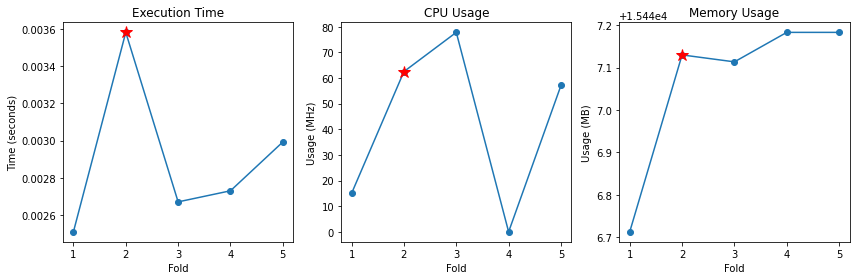

Evaluation Metrics for Each Fold

Fold 1
--------------------
Train RMSE: 0.06988
Validation RMSE: 0.10136
Train MAE: 0.04951
Validation MAE: 0.07240
Train SMAPE: 9.98629
Validation SMAPE: 12.22447
Train R2: 0.82888
Validation R2: 0.66170

Fold 2
--------------------
Train RMSE: 0.07049
Validation RMSE: 0.08956
Train MAE: 0.05021
Validation MAE: 0.06529
Train SMAPE: 10.09832
Validation SMAPE: 11.31340
Train R2: 0.82868
Validation R2: 0.71861

Fold 3
--------------------
Train RMSE: 0.07051
Validation RMSE: 0.09441
Train MAE: 0.05063
Validation MAE: 0.06494
Train SMAPE: 9.73434
Validation SMAPE: 12.68761
Train R2: 0.82788
Validation R2: 0.69137

Fold 4
--------------------
Train RMSE: 0.07062
Validation RMSE: 0.09027
Train MAE: 0.05026
Validation MAE: 0.06466
Train SMAPE: 10.08235
Validation SMAPE: 11.43377
Train R2: 0.82660
Validation R2: 0.72232

Fold 5
--------------------
Train RMSE: 0.07064
Validation RMSE: 0.09302
Train MAE: 0.05048
Validation MAE: 0.06384
Train SMAPE: 9.99466
Val

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Set random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Set the number of folds for cross-validation
num_folds = 5

# Perform 5-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True)

# Store evaluation metrics for each fold
eval_metrics = []

# Store computation calculations for each fold
execution_times = []
cpu_usages = []
memory_usages = []

# Train and evaluate the model
def train_evaluate_model(train_data, val_data):
    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(train_data[:-1], train_data[1:])

    # Make predictions on the training and validation data
    train_preds = model.predict(train_data[:-1])
    val_preds = model.predict(val_data[:-1])

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(train_data[1:], train_preds))
    val_rmse = np.sqrt(mean_squared_error(val_data[1:], val_preds))
    train_mae = mean_absolute_error(train_data[1:], train_preds)
    val_mae = mean_absolute_error(val_data[1:], val_preds)
    train_smape = np.mean(np.abs(train_data[1:] - train_preds) / (np.abs(train_data[1:]) + np.abs(train_preds)) / 2) * 100
    val_smape = np.mean(np.abs(val_data[1:] - val_preds) / (np.abs(val_data[1:]) + np.abs(val_preds)) / 2) * 100
    train_r2 = r2_score(train_data[1:], train_preds)
    val_r2 = r2_score(val_data[1:], val_preds)

    # Calculate computation calculations
    computation_time = time.time() - start_time
    cpu_usage = psutil.cpu_percent()
    memory_usage = psutil.virtual_memory().used / 1e6

    return train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2, computation_time, cpu_usage, memory_usage

# Perform cross-validation
for fold, (train_indices, val_indices) in enumerate(kf.split(target_scaled), 1):
    print(f"Fold {fold}")
    print("----------------------")

    # Get the training and validation data for the current fold
    train_data = target_scaled[train_indices]
    val_data = target_scaled[val_indices]

    # Train and evaluate the Linear Regression model
    start_time = time.time()
    train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2, computation_time, cpu_usage, memory_usage = train_evaluate_model(train_data, val_data)
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(memory_usage)

    # Store evaluation metrics for the current fold
    eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2))

# Convert the evaluation metrics to numpy arrays
eval_metrics = np.array(eval_metrics)

# Find the best performing fold based on validation RMSE
best_fold = np.argmin(eval_metrics[:, 1]) + 1
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_smape, best_val_smape, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]

# Plot computation calculations for each fold
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'r*', markersize=12)  # Red star
plt.title('Execution Time')
plt.xlabel('Fold')
plt.ylabel('Time (seconds)')

plt.subplot(132)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'r*', markersize=12)  # Red star
plt.title('CPU Usage')
plt.xlabel('Fold')
plt.ylabel('Usage (MHz)')

plt.subplot(133)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'r*', markersize=12)  # Red star
plt.title('Memory Usage')
plt.xlabel('Fold')
plt.ylabel('Usage (MB)')

plt.tight_layout()
plt.show()

# Print the evaluation metrics for each fold
print("Evaluation Metrics for Each Fold")
for fold, (train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2) in enumerate(eval_metrics, 1):
    print(f"\nFold {fold}")
    print("--------------------")
    print(f"Train RMSE: {train_rmse:.5f}")
    print(f"Validation RMSE: {val_rmse:.5f}")
    print(f"Train MAE: {train_mae:.5f}")
    print(f"Validation MAE: {val_mae:.5f}")
    print(f"Train SMAPE: {train_smape:.5f}")
    print(f"Validation SMAPE: {val_smape:.5f}")
    print(f"Train R2: {train_r2:.5f}")
    print(f"Validation R2: {val_r2:.5f}")

# Print the best performing fold
print(f"\nBest Performing Fold: {best_fold}")
print("-------------------------")
print(f"Train RMSE: {best_train_rmse:.5f}")
print(f"Validation RMSE: {best_val_rmse:.5f}")
print(f"Train MAE: {best_train_mae:.5f}")
print(f"Validation MAE: {best_val_mae:.5f}")
print(f"Train SMAPE: {best_train_smape:.5f}")
print(f"Validation SMAPE: {best_val_smape:.5f}")
print(f"Train R2: {best_train_r2:.5f}")
print(f"Validation R2: {best_val_r2:.5f}")


In [42]:
# Perform cross-validation
for fold, (train_indices, val_indices) in enumerate(kf.split(target_scaled), 1):
    print(f"Fold {fold}")
    print("----------------------")

    # Get the training and validation data for the current fold
    train_data = target_scaled[train_indices]
    val_data = target_scaled[val_indices]

    # Train and evaluate the Linear Regression model
    start_time = time.time()
    train_predictions, val_predictions, computation_time, cpu_usage, memory_usage = train_evaluate_model(train_data, val_data)
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(memory_usage)

    # Inverse scale the predictions
    train_predictions = scaler.inverse_transform(train_predictions)
    val_predictions = scaler.inverse_transform(val_predictions)

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(train_data, train_predictions))
    val_rmse = np.sqrt(mean_squared_error(val_data, val_predictions))
    train_mae = mean_absolute_error(train_data, train_predictions)
    val_mae = mean_absolute_error(val_data, val_predictions)
    train_smape = smape(train_data, train_predictions)
    val_smape = smape(val_data, val_predictions)
    train_r2 = r2_score(train_data, train_predictions)
    val_r2 = r2_score(val_data, val_predictions)

    # Store evaluation metrics for the current fold
    eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2))

# Convert the evaluation metrics to numpy arrays
eval_metrics = np.array(eval_metrics)

# Find the best performing fold based on validation RMSE
best_fold = np.argmin(eval_metrics[:, 1]) + 1
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_smape, best_val_smape, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]

# Plot computation calculations for each fold
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'r*', markersize=12)  # Red star
plt.title('Execution Time')
plt.xlabel('Fold')
plt.ylabel('Time (seconds)')

plt.subplot(132)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'r*', markersize=12)  # Red star
plt.title('CPU Usage')
plt.xlabel('Fold')
plt.ylabel('Usage (MHz)')

plt.subplot(133)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'r*', markersize=12)  # Red star
plt.title('Memory Usage')
plt.xlabel('Fold')
plt.ylabel('Usage (MB)')

plt.tight_layout()
plt.show()

# Print the best performing fold
print(f"Best Performing Fold: {best_fold}")
print("-------------------------")
print(f"Train RMSE: {best_train_rmse:.5f}")
print(f"Validation RMSE: {best_val_rmse:.5f}")
print(f"Train MAE: {best_train_mae:.5f}")
print(f"Validation MAE: {best_val_mae:.5f}")
print(f"Train SMAPE: {best_train_smape:.5f}")
print(f"Validation SMAPE: {best_val_smape:.5f}")
print(f"Train R2: {best_train_r2:.5f}")
print(f"Validation R2: {best_val_r2:.5f}")


Fold 1
----------------------


ValueError: too many values to unpack (expected 5)

# 01- 10 : LR


Fold 1:
Train RMSE: 26.20161
Validation RMSE: 29.22900
Train MAE: 18.88053
Validation MAE: 19.97053
Train SMAPE: 40.31242
Validation SMAPE: 33.34044
Train R2: 0.85010
Validation R2: 0.81209

Fold 2:
Train RMSE: 26.87571
Validation RMSE: 26.70428
Train MAE: 19.27137
Validation MAE: 18.73065
Train SMAPE: 36.01848
Validation SMAPE: 51.18688
Train R2: 0.84527
Validation R2: 0.82233

Fold 3:
Train RMSE: 27.09856
Validation RMSE: 25.96588
Train MAE: 19.14468
Validation MAE: 19.20113
Train SMAPE: 38.11006
Validation SMAPE: 42.70180
Train R2: 0.84749
Validation R2: 0.81031

Fold 4:
Train RMSE: 26.82605
Validation RMSE: 27.58402
Train MAE: 19.03620
Validation MAE: 19.72249
Train SMAPE: 40.78591
Validation SMAPE: 32.03837
Train R2: 0.83194
Validation R2: 0.86382

Fold 5:
Train RMSE: 27.38056
Validation RMSE: 24.37183
Train MAE: 19.42350
Validation MAE: 17.96875
Train SMAPE: 39.82469
Validation SMAPE: 35.84689
Train R2: 0.83480
Validation R2: 0.87477

Best Fold: 5
Best Train RMSE: 27.38056
Best 

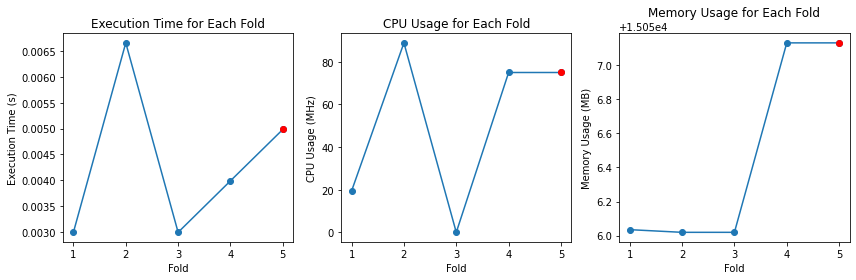

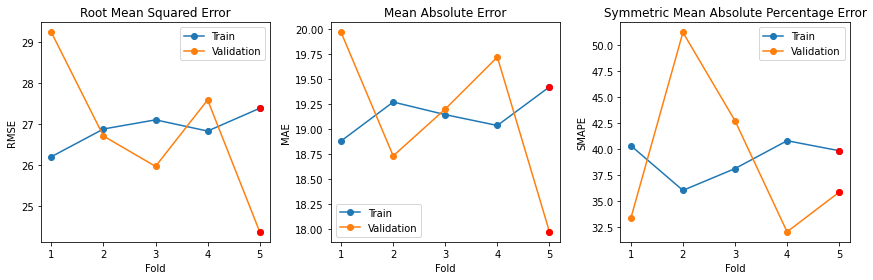

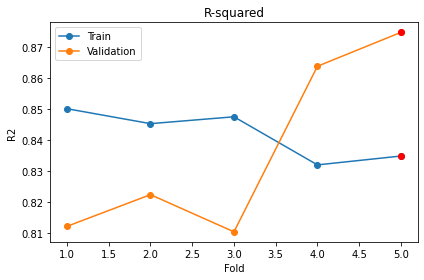

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression


np.random.seed(42)


# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the Linear Regression model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(psutil.cpu_percent())
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_smape, best_val_smape, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train SMAPE: {best_train_smape:.5f}")
print(f"Best Validation SMAPE: {best_val_smape:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(132)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (MHz)')

plt.subplot(133)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Usage (MB)')

plt.tight_layout()
plt.show()

# Plot evaluation metrics for each fold
train_rmses, val_rmses, train_maes, val_maes, train_smapes, val_smapes, train_r2s, val_r2s = zip(*eval_metrics)

plt.figure(figsize=(12, 4))

# Plot RMSE
plt.subplot(131)
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation')
plt.plot(best_fold, best_train_rmse, 'ro')
plt.plot(best_fold, best_val_rmse, 'ro')
plt.title('Root Mean Squared Error')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

# Plot MAE
plt.subplot(132)
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation')
plt.plot(best_fold, best_train_mae, 'ro')
plt.plot(best_fold, best_val_mae, 'ro')
plt.title('Mean Absolute Error')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

# Plot SMAPE
plt.subplot(133)
plt.plot(range(1, num_folds + 1), train_smapes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_smapes, 'o-', label='Validation')
plt.plot(best_fold, best_train_smape, 'ro')
plt.plot(best_fold, best_val_smape, 'ro')
plt.title('Symmetric Mean Absolute Percentage Error')
plt.xlabel('Fold')
plt.ylabel('SMAPE')
plt.legend()

plt.tight_layout()
plt.show()

# Plot R2 for each fold
plt.figure(figsize=(6, 4))
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation')
plt.plot(best_fold, best_train_r2, 'ro')
plt.plot(best_fold, best_val_r2, 'ro')
plt.title('R-squared')
plt.xlabel('Fold')
plt.ylabel('R2')
plt.legend()
plt.tight_layout()
plt.show()



Fold 1:
Train RMSE: 26.20161
Validation RMSE: 29.22900
Train MAE: 18.88053
Validation MAE: 19.97053
Train SMAPE: 40.31242
Validation SMAPE: 33.34044
Train R2: 0.85010
Validation R2: 0.81209

Computation Calculations for Fold 1:
Execution Time: 0.00399 seconds
CPU Usage: 18.50 MHz
Memory Used: 16063.18 MB

Fold 2:
Train RMSE: 26.87571
Validation RMSE: 26.70428
Train MAE: 19.27137
Validation MAE: 18.73065
Train SMAPE: 36.01848
Validation SMAPE: 51.18688
Train R2: 0.84527
Validation R2: 0.82233

Computation Calculations for Fold 2:
Execution Time: 0.00441 seconds
CPU Usage: 71.40 MHz
Memory Used: 16063.18 MB

Fold 3:
Train RMSE: 27.09856
Validation RMSE: 25.96588
Train MAE: 19.14468
Validation MAE: 19.20113
Train SMAPE: 38.11006
Validation SMAPE: 42.70180
Train R2: 0.84749
Validation R2: 0.81031

Computation Calculations for Fold 3:
Execution Time: 0.00428 seconds
CPU Usage: 75.00 MHz
Memory Used: 16063.15 MB

Fold 4:
Train RMSE: 26.82605
Validation RMSE: 27.58402
Train MAE: 19.03620
Val

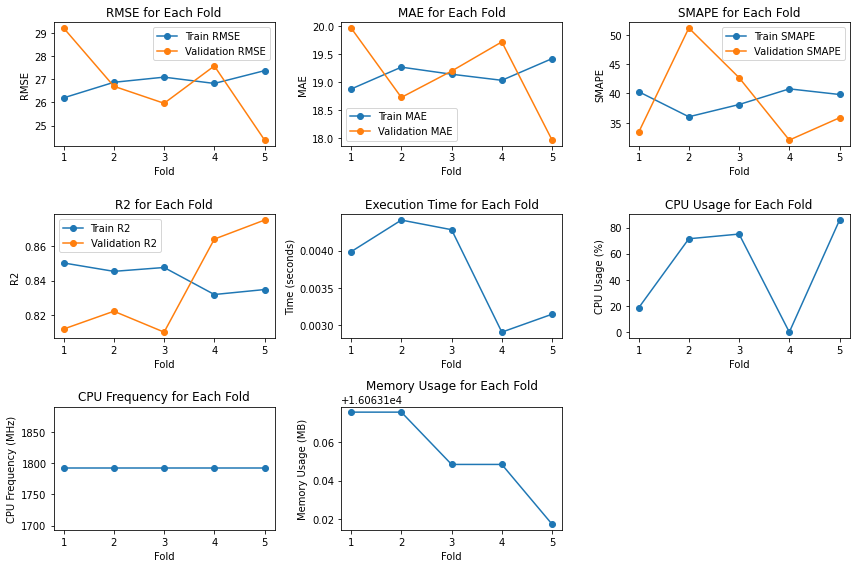

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression


np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
cpu_mhzs = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the SVR model
        model = LinearRegression()
        model.fit(X_train, y_train.ravel())

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        return train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2

    # Train and evaluate the SVR model
    start_time = time.time()
    train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2 = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usage = psutil.cpu_percent()
    cpu_mhz = psutil.cpu_freq().current
    cpu_usages.append(cpu_usage)
    cpu_mhzs.append(cpu_mhz)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Print computation calculations for the current fold
    print(f"\nComputation Calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.5f} seconds")
    print(f"CPU Usage: {cpu_usage:.2f} MHz")
    print(f"Memory Used: {memory_usages[-1]:.2f} MB")

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Store evaluation metrics for the current fold
    eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2))

# Print the best fold and metric
print(f"\nBest Fold: {best_fold}")
print(f"Best Metric (Validation RMSE): {best_metric:.5f}")

# Unpack evaluation metrics for plotting
train_rmses, val_rmses, train_maes, val_maes, train_smapes, val_smapes, train_r2s, val_r2s = zip(*eval_metrics)

# Plot evaluation metrics for each fold
plt.figure(figsize=(12, 8))

plt.subplot(331)
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train RMSE')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation RMSE')
plt.title('RMSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(332)
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train MAE')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation MAE')
plt.title('MAE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.subplot(333)
plt.plot(range(1, num_folds + 1), train_smapes, 'o-', label='Train SMAPE')
plt.plot(range(1, num_folds + 1), val_smapes, 'o-', label='Validation SMAPE')
plt.title('SMAPE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('SMAPE')
plt.legend()

plt.subplot(334)
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train R2')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation R2')
plt.title('R2 for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R2')
plt.legend()

plt.subplot(335)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Time (seconds)')

plt.subplot(336)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (%)')

plt.subplot(337)
plt.plot(range(1, num_folds + 1), cpu_mhzs, 'o-')
plt.title('CPU Frequency for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Frequency (MHz)')

plt.subplot(338)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Usage (MB)')

plt.tight_layout()
plt.show()



Fold 1:
Train RMSE: 26.20161
Validation RMSE: 29.22900
Train MAE: 18.88053
Validation MAE: 19.97053
Train R2: 0.85010
Validation R2: 0.81209

Computation calculations for Fold 1:
Execution Time: 0.00 seconds
CPU Usage: 16.4 MHz
Memory Used: 17931.57 MB

Fold 2:
Train RMSE: 26.87571
Validation RMSE: 26.70428
Train MAE: 19.27137
Validation MAE: 18.73065
Train R2: 0.84527
Validation R2: 0.82233

Computation calculations for Fold 2:
Execution Time: 0.00 seconds
CPU Usage: 50.0 MHz
Memory Used: 17930.98 MB

Fold 3:
Train RMSE: 27.09856
Validation RMSE: 25.96588
Train MAE: 19.14468
Validation MAE: 19.20113
Train R2: 0.84749
Validation R2: 0.81031

Computation calculations for Fold 3:
Execution Time: 0.00 seconds
CPU Usage: 57.1 MHz
Memory Used: 17930.98 MB

Fold 4:
Train RMSE: 26.82605
Validation RMSE: 27.58402
Train MAE: 19.03620
Validation MAE: 19.72249
Train R2: 0.83194
Validation R2: 0.86382

Computation calculations for Fold 4:
Execution Time: 0.00 seconds
CPU Usage: 50.0 MHz
Memory Us

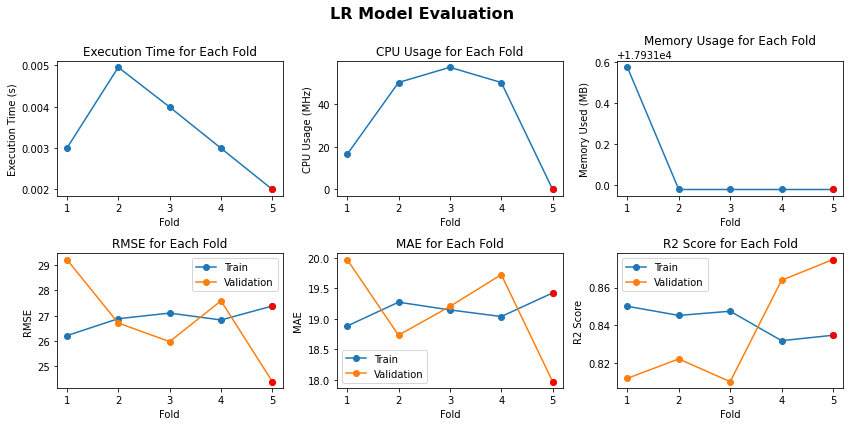

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import psutil
import time

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the LR model
        model = LinearRegression()
        model.fit(X_train, y_train.ravel())

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_r2, val_r2))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the LR model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = psutil.cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"\nComputation calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage} MHz")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 6))
plt.suptitle('LR Model Evaluation', fontsize=16, fontweight='bold')

plt.subplot(231)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(232)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (MHz)')

plt.subplot(233)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')

# Plot evaluation metrics for each fold
plt.subplot(234)
train_rmses = [metrics[0] for metrics in eval_metrics]
val_rmses = [metrics[1] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation')
plt.plot(best_fold, best_train_rmse, 'ro')
plt.plot(best_fold, best_val_rmse, 'ro')
plt.title('RMSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(235)
train_maes = [metrics[2] for metrics in eval_metrics]
val_maes = [metrics[3] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation')
plt.plot(best_fold, best_train_mae, 'ro')
plt.plot(best_fold, best_val_mae, 'ro')
plt.title('MAE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.subplot(236)
train_r2s = [metrics[4] for metrics in eval_metrics]
val_r2s = [metrics[5] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation')
plt.plot(best_fold, best_train_r2, 'ro')
plt.plot(best_fold, best_val_r2, 'ro')
plt.title('R2 Score for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()



Fold 1:
Train RMSE: 26.20161
Validation RMSE: 29.22900
Train MAE: 18.88053
Validation MAE: 19.97053
Train SMAPE: 40.31242
Validation SMAPE: 33.34044
Train R2: 0.85010
Validation R2: 0.81209

Computation calculations for Fold 1:
Execution Time: 0.00 seconds
CPU Usage: 15.4 MHz
Memory Used: 17954.45 MB

Fold 2:
Train RMSE: 26.87571
Validation RMSE: 26.70428
Train MAE: 19.27137
Validation MAE: 18.73065
Train SMAPE: 36.01848
Validation SMAPE: 51.18688
Train R2: 0.84527
Validation R2: 0.82233

Computation calculations for Fold 2:
Execution Time: 0.00 seconds
CPU Usage: 75.0 MHz
Memory Used: 17954.45 MB

Fold 3:
Train RMSE: 27.09856
Validation RMSE: 25.96588
Train MAE: 19.14468
Validation MAE: 19.20113
Train SMAPE: 38.11006
Validation SMAPE: 42.70180
Train R2: 0.84749
Validation R2: 0.81031

Computation calculations for Fold 3:
Execution Time: 0.00 seconds
CPU Usage: 77.8 MHz
Memory Used: 17954.45 MB

Fold 4:
Train RMSE: 26.82605
Validation RMSE: 27.58402
Train MAE: 19.03620
Validation MAE:

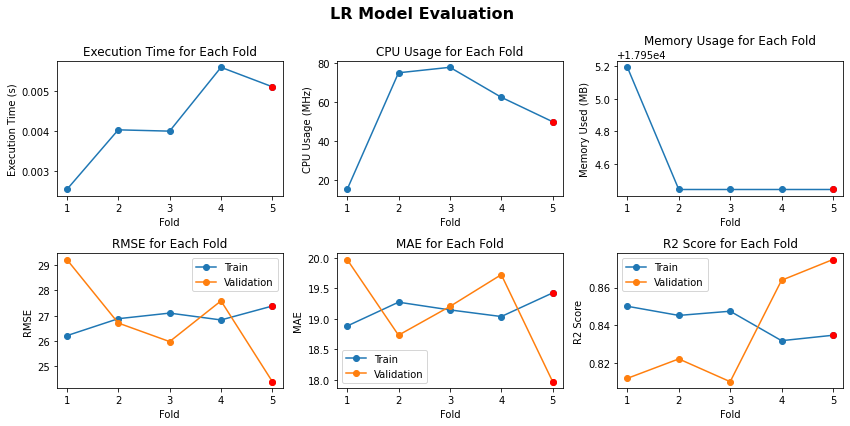

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import psutil
import time

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the LR model
        model = LinearRegression()
        model.fit(X_train, y_train.ravel())

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the LR model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = psutil.cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"\nComputation calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage} MHz")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_smape, best_val_smape, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train SMAPE: {best_train_smape:.5f}")
print(f"Best Validation SMAPE: {best_val_smape:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 6))
plt.suptitle('LR Model Evaluation', fontsize=16, fontweight='bold')

plt.subplot(231)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(232)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (MHz)')

plt.subplot(233)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')

# Plot evaluation metrics for each fold
plt.subplot(234)
train_rmses = [metrics[0] for metrics in eval_metrics]
val_rmses = [metrics[1] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation')
plt.plot(best_fold, best_train_rmse, 'ro')
plt.plot(best_fold, best_val_rmse, 'ro')
plt.title('RMSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(235)
train_maes = [metrics[2] for metrics in eval_metrics]
val_maes = [metrics[3] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation')
plt.plot(best_fold, best_train_mae, 'ro')
plt.plot(best_fold, best_val_mae, 'ro')
plt.title('MAE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.subplot(236)
train_r2s = [metrics[6] for metrics in eval_metrics]
val_r2s = [metrics[7] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation')
plt.plot(best_fold, best_train_r2, 'ro')
plt.plot(best_fold, best_val_r2, 'ro')
plt.title('R2 Score for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()



Fold 1:
Train RMSE: 26.20161
Validation RMSE: 29.22900
Train MAE: 18.88053
Validation MAE: 19.97053
Train SMAPE: 40.31242
Validation SMAPE: 33.34044
Train R2: 0.85010
Validation R2: 0.81209

Computation calculations for Fold 1:
Execution Time: 0.00379 seconds
CPU Usage: 11.7 MHz
Memory Used: 17813.70 MB

Fold 2:
Train RMSE: 26.87571
Validation RMSE: 26.70428
Train MAE: 19.27137
Validation MAE: 18.73065
Train SMAPE: 36.01848
Validation SMAPE: 51.18688
Train R2: 0.84527
Validation R2: 0.82233

Computation calculations for Fold 2:
Execution Time: 0.00299 seconds
CPU Usage: 0.0 MHz
Memory Used: 17813.70 MB

Fold 3:
Train RMSE: 27.09856
Validation RMSE: 25.96588
Train MAE: 19.14468
Validation MAE: 19.20113
Train SMAPE: 38.11006
Validation SMAPE: 42.70180
Train R2: 0.84749
Validation R2: 0.81031

Computation calculations for Fold 3:
Execution Time: 0.00323 seconds
CPU Usage: 50.0 MHz
Memory Used: 17813.70 MB

Fold 4:
Train RMSE: 26.82605
Validation RMSE: 27.58402
Train MAE: 19.03620
Validat

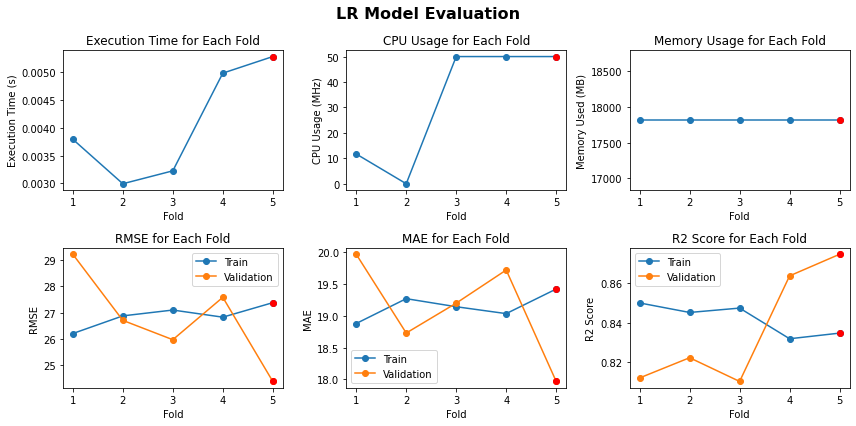

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import psutil
import time

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the LR model
        model = LinearRegression()
        model.fit(X_train, y_train.ravel())

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the LR model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = psutil.cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"\nComputation calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.5f} seconds")
    print(f"CPU Usage: {cpu_usage} MHz")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_smape, best_val_smape, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train SMAPE: {best_train_smape:.5f}")
print(f"Best Validation SMAPE: {best_val_smape:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 6))
plt.suptitle('LR Model Evaluation', fontsize=16, fontweight='bold')

plt.subplot(231)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(232)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (MHz)')

plt.subplot(233)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')

# Plot evaluation metrics for each fold
plt.subplot(234)
train_rmses = [metrics[0] for metrics in eval_metrics]
val_rmses = [metrics[1] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation')
plt.plot(best_fold, best_train_rmse, 'ro')
plt.plot(best_fold, best_val_rmse, 'ro')
plt.title('RMSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(235)
train_maes = [metrics[2] for metrics in eval_metrics]
val_maes = [metrics[3] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation')
plt.plot(best_fold, best_train_mae, 'ro')
plt.plot(best_fold, best_val_mae, 'ro')
plt.title('MAE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.subplot(236)
train_r2s = [metrics[6] for metrics in eval_metrics]
val_r2s = [metrics[7] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation')
plt.plot(best_fold, best_train_r2, 'ro')
plt.plot(best_fold, best_val_r2, 'ro')
plt.title('R2 Score for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()


# 02- 10 : SVR


Fold 1:
Train RMSE: 26.00708
Validation RMSE: 28.90528
Train MAE: 18.56806
Validation MAE: 19.70773
Train SMAPE: 39.80003
Validation SMAPE: 32.99923
Train R2: 0.85231
Validation R2: 0.81623

Fold 2:
Train RMSE: 26.61599
Validation RMSE: 26.51178
Train MAE: 18.89022
Validation MAE: 18.45539
Train SMAPE: 35.26474
Validation SMAPE: 51.10927
Train R2: 0.84825
Validation R2: 0.82488

Fold 3:
Train RMSE: 26.76891
Validation RMSE: 26.02103
Train MAE: 18.76638
Validation MAE: 18.94232
Train SMAPE: 37.56072
Validation SMAPE: 41.99441
Train R2: 0.85118
Validation R2: 0.80950

Fold 4:
Train RMSE: 26.57274
Validation RMSE: 27.84550
Train MAE: 18.67394
Validation MAE: 19.60511
Train SMAPE: 40.19396
Validation SMAPE: 31.59772
Train R2: 0.83510
Validation R2: 0.86123

Fold 5:
Train RMSE: 27.17334
Validation RMSE: 24.02454
Train MAE: 19.05832
Validation MAE: 17.53553
Train SMAPE: 39.36192
Validation SMAPE: 34.60401
Train R2: 0.83730
Validation R2: 0.87831

Best Fold: 5
Best Train RMSE: 27.17334
Best 

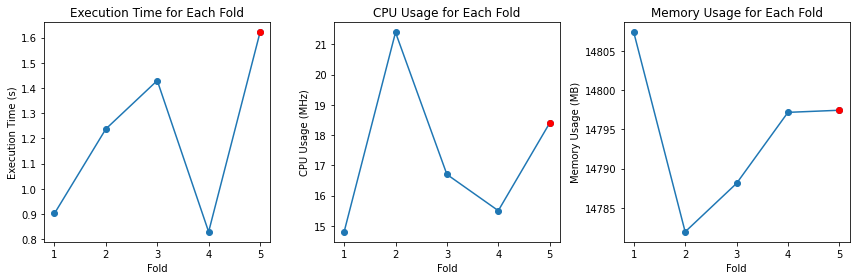

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR


np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the SVR model
        model = SVR()
        model.fit(X_train, y_train.ravel())

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the SVR model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(psutil.cpu_percent())
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_smape, best_val_smape, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train SMAPE: {best_train_smape:.5f}")
print(f"Best Validation SMAPE: {best_val_smape:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(132)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (MHz)')

plt.subplot(133)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Usage (MB)')

plt.tight_layout()
plt.show()


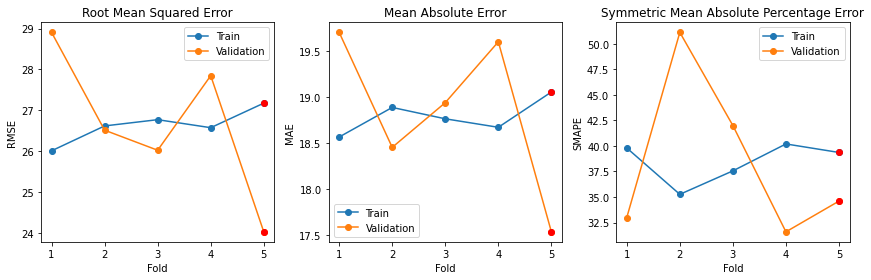

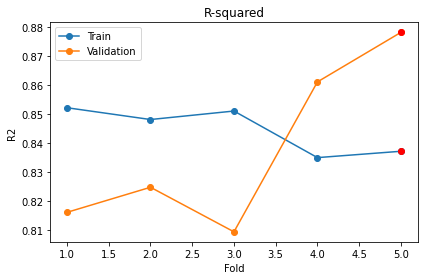

In [47]:
# Plot evaluation metrics for each fold
train_rmses, val_rmses, train_maes, val_maes, train_smapes, val_smapes, train_r2s, val_r2s = zip(*eval_metrics)

plt.figure(figsize=(12, 4))

# Plot RMSE
plt.subplot(131)
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation')
plt.plot(best_fold, best_train_rmse, 'ro')
plt.plot(best_fold, best_val_rmse, 'ro')
plt.title('Root Mean Squared Error')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

# Plot MAE
plt.subplot(132)
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation')
plt.plot(best_fold, best_train_mae, 'ro')
plt.plot(best_fold, best_val_mae, 'ro')
plt.title('Mean Absolute Error')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

# Plot SMAPE
plt.subplot(133)
plt.plot(range(1, num_folds + 1), train_smapes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_smapes, 'o-', label='Validation')
plt.plot(best_fold, best_train_smape, 'ro')
plt.plot(best_fold, best_val_smape, 'ro')
plt.title('Symmetric Mean Absolute Percentage Error')
plt.xlabel('Fold')
plt.ylabel('SMAPE')
plt.legend()

plt.tight_layout()
plt.show()

# Plot R2 for each fold
plt.figure(figsize=(6, 4))
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation')
plt.plot(best_fold, best_train_r2, 'ro')
plt.plot(best_fold, best_val_r2, 'ro')
plt.title('R-squared')
plt.xlabel('Fold')
plt.ylabel('R2')
plt.legend()
plt.tight_layout()
plt.show()



Fold 1:
Train RMSE: 26.00708
Validation RMSE: 28.90528
Train MAE: 18.56806
Validation MAE: 19.70773
Train SMAPE: 39.80003
Validation SMAPE: 32.99923
Train R2: 0.85231
Validation R2: 0.81623

Fold 2:
Train RMSE: 26.61599
Validation RMSE: 26.51178
Train MAE: 18.89022
Validation MAE: 18.45539
Train SMAPE: 35.26474
Validation SMAPE: 51.10927
Train R2: 0.84825
Validation R2: 0.82488

Fold 3:
Train RMSE: 26.76891
Validation RMSE: 26.02103
Train MAE: 18.76638
Validation MAE: 18.94232
Train SMAPE: 37.56072
Validation SMAPE: 41.99441
Train R2: 0.85118
Validation R2: 0.80950

Fold 4:
Train RMSE: 26.57274
Validation RMSE: 27.84550
Train MAE: 18.67394
Validation MAE: 19.60511
Train SMAPE: 40.19396
Validation SMAPE: 31.59772
Train R2: 0.83510
Validation R2: 0.86123

Fold 5:
Train RMSE: 27.17334
Validation RMSE: 24.02454
Train MAE: 19.05832
Validation MAE: 17.53553
Train SMAPE: 39.36192
Validation SMAPE: 34.60401
Train R2: 0.83730
Validation R2: 0.87831

Best Fold: 5
Best Train RMSE: 27.17334
Best 

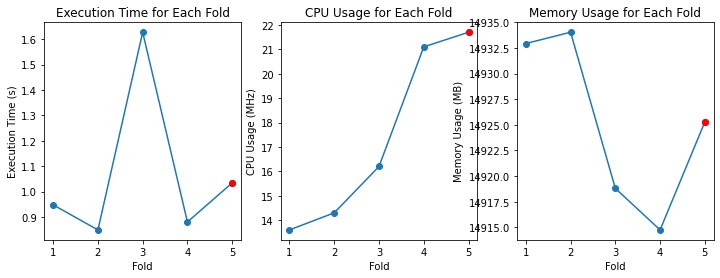

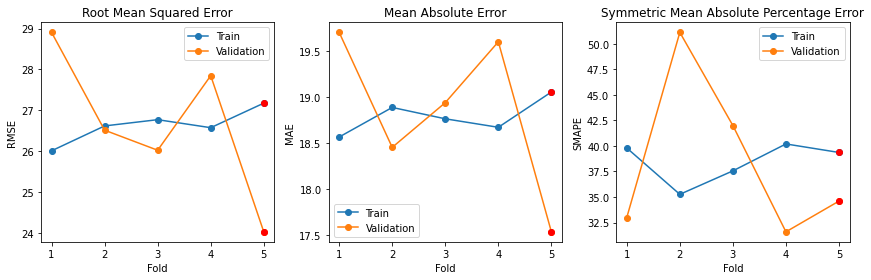

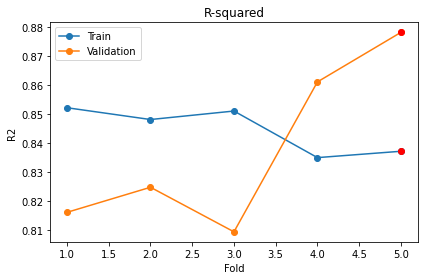

<Figure size 432x288 with 0 Axes>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR


np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the SVR model
        model = SVR()
        model.fit(X_train, y_train.ravel())

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the SVR model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(psutil.cpu_percent())
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_smape, best_val_smape, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train SMAPE: {best_train_smape:.5f}")
print(f"Best Validation SMAPE: {best_val_smape:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(132)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (MHz)')

plt.subplot(133)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Usage (MB)')


# Plot evaluation metrics for each fold
train_rmses, val_rmses, train_maes, val_maes, train_smapes, val_smapes, train_r2s, val_r2s = zip(*eval_metrics)

plt.figure(figsize=(12, 4))

# Plot RMSE
plt.subplot(131)
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation')
plt.plot(best_fold, best_train_rmse, 'ro')
plt.plot(best_fold, best_val_rmse, 'ro')
plt.title('Root Mean Squared Error')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

# Plot MAE
plt.subplot(132)
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation')
plt.plot(best_fold, best_train_mae, 'ro')
plt.plot(best_fold, best_val_mae, 'ro')
plt.title('Mean Absolute Error')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

# Plot SMAPE
plt.subplot(133)
plt.plot(range(1, num_folds + 1), train_smapes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_smapes, 'o-', label='Validation')
plt.plot(best_fold, best_train_smape, 'ro')
plt.plot(best_fold, best_val_smape, 'ro')
plt.title('Symmetric Mean Absolute Percentage Error')
plt.xlabel('Fold')
plt.ylabel('SMAPE')
plt.legend()

plt.tight_layout()
plt.show()

# Plot R2 for each fold
plt.figure(figsize=(6, 4))
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation')
plt.plot(best_fold, best_train_r2, 'ro')
plt.plot(best_fold, best_val_r2, 'ro')
plt.title('R-squared')
plt.xlabel('Fold')
plt.ylabel('R2')
plt.legend()
plt.tight_layout()
plt.show()




plt.tight_layout()
plt.show()



Fold 1:
Train RMSE: 26.00708
Validation RMSE: 28.90528
Train MAE: 18.56806
Validation MAE: 19.70773
Train SMAPE: 39.80003
Validation SMAPE: 32.99923
Train R2: 0.85231
Validation R2: 0.81623

Fold 2:
Train RMSE: 26.61599
Validation RMSE: 26.51178
Train MAE: 18.89022
Validation MAE: 18.45539
Train SMAPE: 35.26474
Validation SMAPE: 51.10927
Train R2: 0.84825
Validation R2: 0.82488

Fold 3:
Train RMSE: 26.76891
Validation RMSE: 26.02103
Train MAE: 18.76638
Validation MAE: 18.94232
Train SMAPE: 37.56072
Validation SMAPE: 41.99441
Train R2: 0.85118
Validation R2: 0.80950

Fold 4:
Train RMSE: 26.57274
Validation RMSE: 27.84550
Train MAE: 18.67394
Validation MAE: 19.60511
Train SMAPE: 40.19396
Validation SMAPE: 31.59772
Train R2: 0.83510
Validation R2: 0.86123

Fold 5:
Train RMSE: 27.17334
Validation RMSE: 24.02454
Train MAE: 19.05832
Validation MAE: 17.53553
Train SMAPE: 39.36192
Validation SMAPE: 34.60401
Train R2: 0.83730
Validation R2: 0.87831

Best Fold: 5
Best Metric (Validation RMSE): 

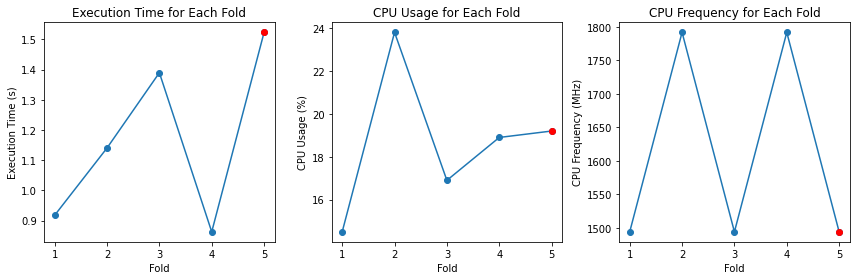

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR


np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
cpu_mhzs = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the SVR model
        model = SVR()
        model.fit(X_train, y_train.ravel())

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the SVR model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usage = psutil.cpu_percent()
    cpu_mhz = psutil.cpu_freq().current
    cpu_usages.append(cpu_usage)
    cpu_mhzs.append(cpu_mhz)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

# Print the best fold and metric
print(f"\nBest Fold: {best_fold}")
print(f"Best Metric (Validation RMSE): {best_metric:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(132)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (%)')

plt.subplot(133)
plt.plot(range(1, num_folds + 1), cpu_mhzs, 'o-')
plt.plot(best_fold, cpu_mhzs[best_fold - 1], 'ro')
plt.title('CPU Frequency for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Frequency (MHz)')

plt.tight_layout()
plt.show()



Fold 1:
Train RMSE: 26.00708
Validation RMSE: 28.90528
Train MAE: 18.56806
Validation MAE: 19.70773
Train SMAPE: 39.80003
Validation SMAPE: 32.99923
Train R2: 0.85231
Validation R2: 0.81623

Computation Calculations for Fold 1:
Execution Time: 0.90714 seconds
CPU Usage: 14.60 MHz
Memory Used: 14862.26 MB

Fold 2:
Train RMSE: 26.61599
Validation RMSE: 26.51178
Train MAE: 18.89022
Validation MAE: 18.45539
Train SMAPE: 35.26474
Validation SMAPE: 51.10927
Train R2: 0.84825
Validation R2: 0.82488

Computation Calculations for Fold 2:
Execution Time: 1.15946 seconds
CPU Usage: 24.50 MHz
Memory Used: 14871.96 MB

Fold 3:
Train RMSE: 26.76891
Validation RMSE: 26.02103
Train MAE: 18.76638
Validation MAE: 18.94232
Train SMAPE: 37.56072
Validation SMAPE: 41.99441
Train R2: 0.85118
Validation R2: 0.80950

Computation Calculations for Fold 3:
Execution Time: 1.42066 seconds
CPU Usage: 20.80 MHz
Memory Used: 14866.36 MB

Fold 4:
Train RMSE: 26.57274
Validation RMSE: 27.84550
Train MAE: 18.67394
Val

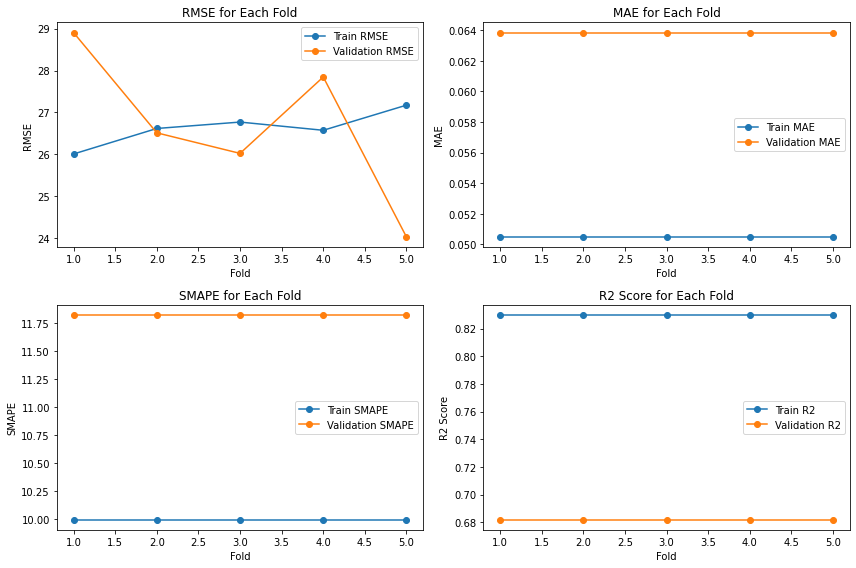

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR


np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
cpu_mhzs = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the SVR model
        model = SVR()
        model.fit(X_train, y_train.ravel())

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the SVR model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usage = psutil.cpu_percent()
    cpu_mhz = psutil.cpu_freq().current
    cpu_usages.append(cpu_usage)
    cpu_mhzs.append(cpu_mhz)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Print computation calculations for the current fold
    print(f"\nComputation Calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.5f} seconds")
    print(f"CPU Usage: {cpu_usage:.2f} MHz")
    print(f"Memory Used: {memory_usages[-1]:.2f} MB")

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Store evaluation metrics for the current fold
    eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2))

# Print the best fold and metric
print(f"\nBest Fold: {best_fold}")
print(f"Best Metric (Validation RMSE): {best_metric:.5f}")

# Plot evaluation metrics for each fold
train_rmses = [metrics[0] for metrics in eval_metrics]
val_rmses = [metrics[1] for metrics in eval_metrics]
train_maes = [metrics[2] for metrics in eval_metrics]
val_maes = [metrics[3] for metrics in eval_metrics]
train_smapes = [metrics[4] for metrics in eval_metrics]
val_smapes = [metrics[5] for metrics in eval_metrics]
train_r2s = [metrics[6] for metrics in eval_metrics]
val_r2s = [metrics[7] for metrics in eval_metrics]

plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train RMSE')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation RMSE')
plt.title('RMSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(222)
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train MAE')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation MAE')
plt.title('MAE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.subplot(223)
plt.plot(range(1, num_folds + 1), train_smapes, 'o-', label='Train SMAPE')
plt.plot(range(1, num_folds + 1), val_smapes, 'o-', label='Validation SMAPE')
plt.title('SMAPE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('SMAPE')
plt.legend()

plt.subplot(224)
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train R2')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation R2')
plt.title('R2 Score for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()



Fold 1:
Train RMSE: 26.00708
Validation RMSE: 28.90528
Train MAE: 18.56806
Validation MAE: 19.70773
Train SMAPE: 39.80003
Validation SMAPE: 32.99923
Train R2: 0.85231
Validation R2: 0.81623

Computation Calculations for Fold 1:
Execution Time: 0.92682 seconds
CPU Usage: 14.20 MHz
Memory Used: 14957.23 MB

Fold 2:
Train RMSE: 26.61599
Validation RMSE: 26.51178
Train MAE: 18.89022
Validation MAE: 18.45539
Train SMAPE: 35.26474
Validation SMAPE: 51.10927
Train R2: 0.84825
Validation R2: 0.82488

Computation Calculations for Fold 2:
Execution Time: 0.89847 seconds
CPU Usage: 15.80 MHz
Memory Used: 14961.64 MB

Fold 3:
Train RMSE: 26.76891
Validation RMSE: 26.02103
Train MAE: 18.76638
Validation MAE: 18.94232
Train SMAPE: 37.56072
Validation SMAPE: 41.99441
Train R2: 0.85118
Validation R2: 0.80950

Computation Calculations for Fold 3:
Execution Time: 1.58329 seconds
CPU Usage: 19.20 MHz
Memory Used: 14970.99 MB

Fold 4:
Train RMSE: 26.57274
Validation RMSE: 27.84550
Train MAE: 18.67394
Val

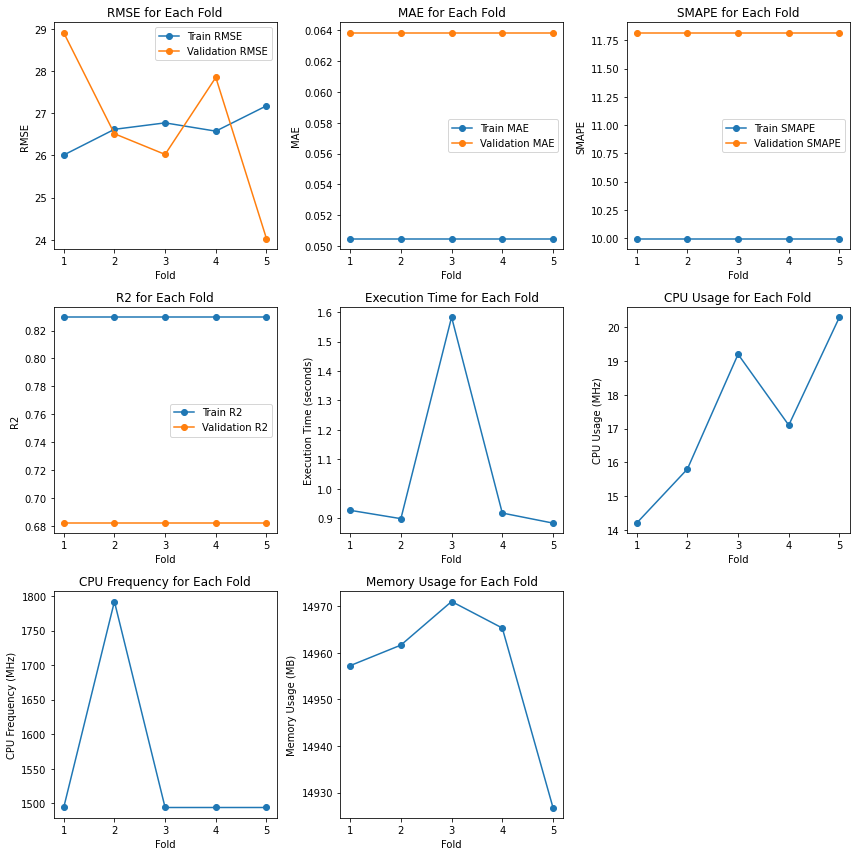

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
cpu_mhzs = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the SVR model
        model = SVR()
        model.fit(X_train, y_train.ravel())

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the SVR model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usage = psutil.cpu_percent()
    cpu_mhz = psutil.cpu_freq().current
    cpu_usages.append(cpu_usage)
    cpu_mhzs.append(cpu_mhz)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Print computation calculations for the current fold
    print(f"\nComputation Calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.5f} seconds")
    print(f"CPU Usage: {cpu_usage:.2f} MHz")
    print(f"Memory Used: {memory_usages[-1]:.2f} MB")

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Store evaluation metrics for the current fold
    eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2))

# Print the best fold and metric
print(f"\nBest Fold: {best_fold}")
print(f"Best Metric (Validation RMSE): {best_metric:.5f}")

# Plot evaluation metrics for each fold
train_rmses = [metrics[0] for metrics in eval_metrics]
val_rmses = [metrics[1] for metrics in eval_metrics]
train_maes = [metrics[2] for metrics in eval_metrics]
val_maes = [metrics[3] for metrics in eval_metrics]
train_smapes = [metrics[4] for metrics in eval_metrics]
val_smapes = [metrics[5] for metrics in eval_metrics]
train_r2s = [metrics[6] for metrics in eval_metrics]
val_r2s = [metrics[7] for metrics in eval_metrics]

plt.figure(figsize=(12, 12))

plt.subplot(331)
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train RMSE')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation RMSE')
plt.title('RMSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(332)
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train MAE')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation MAE')
plt.title('MAE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.subplot(333)
plt.plot(range(1, num_folds + 1), train_smapes, 'o-', label='Train SMAPE')
plt.plot(range(1, num_folds + 1), val_smapes, 'o-', label='Validation SMAPE')
plt.title('SMAPE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('SMAPE')
plt.legend()

plt.subplot(334)
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train R2')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation R2')
plt.title('R2 for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R2')
plt.legend()

# Plot computation calculations for each fold
plt.subplot(335)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (seconds)')

plt.subplot(336)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (MHz)')

plt.subplot(337)
plt.plot(range(1, num_folds + 1), cpu_mhzs, 'o-')
plt.title('CPU Frequency for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Frequency (MHz)')

plt.subplot(338)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Usage (MB)')

plt.tight_layout()
plt.show()



Fold 1:
Train RMSE: 26.00708
Validation RMSE: 28.90528
Train MAE: 18.56806
Validation MAE: 19.70773
Train SMAPE: 39.80003
Validation SMAPE: 32.99923
Train R2: 0.85231
Validation R2: 0.81623

Computation Calculations for Fold 1:
Execution Time: 1.06193 seconds
CPU Usage: 17.00 MHz
Memory Used: 16499.68 MB

Fold 2:
Train RMSE: 26.61599
Validation RMSE: 26.51178
Train MAE: 18.89022
Validation MAE: 18.45539
Train SMAPE: 35.26474
Validation SMAPE: 51.10927
Train R2: 0.84825
Validation R2: 0.82488

Computation Calculations for Fold 2:
Execution Time: 1.85235 seconds
CPU Usage: 42.60 MHz
Memory Used: 16508.66 MB

Fold 3:
Train RMSE: 26.76891
Validation RMSE: 26.02103
Train MAE: 18.76638
Validation MAE: 18.94232
Train SMAPE: 37.56072
Validation SMAPE: 41.99441
Train R2: 0.85118
Validation R2: 0.80950

Computation Calculations for Fold 3:
Execution Time: 1.04276 seconds
CPU Usage: 33.50 MHz
Memory Used: 16519.58 MB

Fold 4:
Train RMSE: 26.57274
Validation RMSE: 27.84550
Train MAE: 18.67394
Val

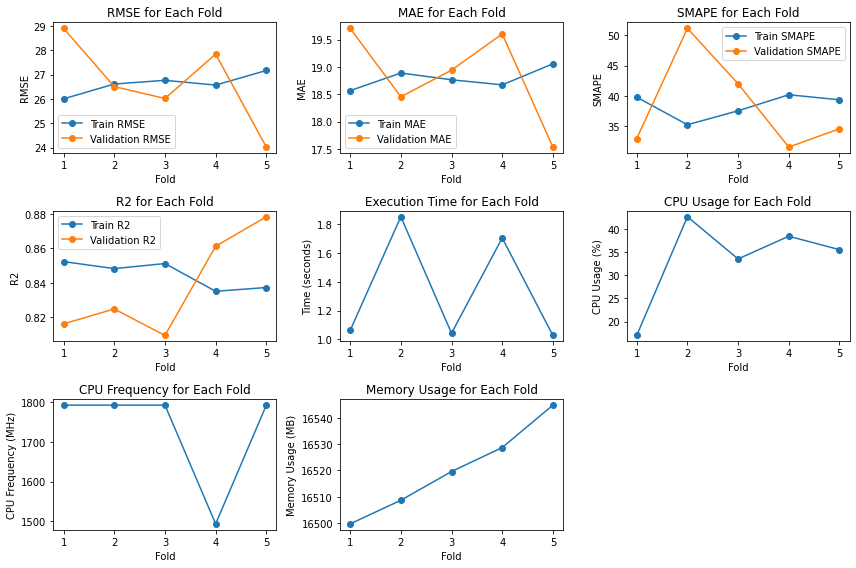

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR


np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
cpu_mhzs = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the SVR model
        model = SVR()
        model.fit(X_train, y_train.ravel())

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        return train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2

    # Train and evaluate the SVR model
    start_time = time.time()
    train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2 = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usage = psutil.cpu_percent()
    cpu_mhz = psutil.cpu_freq().current
    cpu_usages.append(cpu_usage)
    cpu_mhzs.append(cpu_mhz)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Print computation calculations for the current fold
    print(f"\nComputation Calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.5f} seconds")
    print(f"CPU Usage: {cpu_usage:.2f} MHz")
    print(f"Memory Used: {memory_usages[-1]:.2f} MB")

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Store evaluation metrics for the current fold
    eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2))

# Print the best fold and metric
print(f"\nBest Fold: {best_fold}")
print(f"Best Metric (Validation RMSE): {best_metric:.5f}")

# Unpack evaluation metrics for plotting
train_rmses, val_rmses, train_maes, val_maes, train_smapes, val_smapes, train_r2s, val_r2s = zip(*eval_metrics)

# Plot evaluation metrics for each fold
plt.figure(figsize=(12, 8))

plt.subplot(331)
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train RMSE')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation RMSE')
plt.title('RMSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(332)
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train MAE')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation MAE')
plt.title('MAE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.subplot(333)
plt.plot(range(1, num_folds + 1), train_smapes, 'o-', label='Train SMAPE')
plt.plot(range(1, num_folds + 1), val_smapes, 'o-', label='Validation SMAPE')
plt.title('SMAPE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('SMAPE')
plt.legend()

plt.subplot(334)
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train R2')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation R2')
plt.title('R2 for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R2')
plt.legend()

plt.subplot(335)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Time (seconds)')

plt.subplot(336)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (%)')

plt.subplot(337)
plt.plot(range(1, num_folds + 1), cpu_mhzs, 'o-')
plt.title('CPU Frequency for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Frequency (MHz)')

plt.subplot(338)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Usage (MB)')

plt.tight_layout()
plt.show()



Fold 1:
Train RMSE: 26.00708
Validation RMSE: 28.90528
Train MAE: 18.56806
Validation MAE: 19.70773
Train SMAPE: 39.80003
Validation SMAPE: 32.99923
Train R2: 0.85231
Validation R2: 0.81623

Computation calculations for Fold 1:
Execution Time: 0.85 seconds
CPU Usage: 12.1 MHz
Memory Used: 17720.70 MB

Fold 2:
Train RMSE: 26.61599
Validation RMSE: 26.51178
Train MAE: 18.89022
Validation MAE: 18.45539
Train SMAPE: 35.26474
Validation SMAPE: 51.10927
Train R2: 0.84825
Validation R2: 0.82488

Computation calculations for Fold 2:
Execution Time: 0.89 seconds
CPU Usage: 22.3 MHz
Memory Used: 17713.04 MB

Fold 3:
Train RMSE: 26.76891
Validation RMSE: 26.02103
Train MAE: 18.76638
Validation MAE: 18.94232
Train SMAPE: 37.56072
Validation SMAPE: 41.99441
Train R2: 0.85118
Validation R2: 0.80950

Computation calculations for Fold 3:
Execution Time: 0.87 seconds
CPU Usage: 24.5 MHz
Memory Used: 17708.46 MB

Fold 4:
Train RMSE: 26.57274
Validation RMSE: 27.84550
Train MAE: 18.67394
Validation MAE:

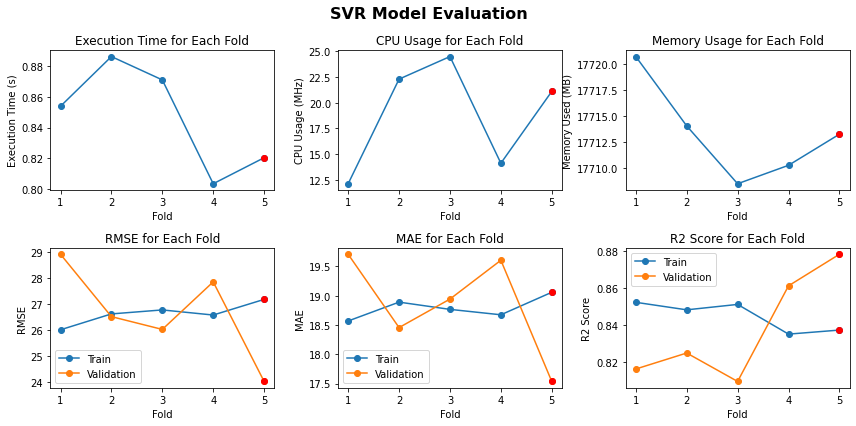

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
import psutil
import time

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the SVR model
        model = SVR()
        model.fit(X_train, y_train.ravel())

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the SVR model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = psutil.cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"\nComputation calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage} MHz")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_smape, best_val_smape, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train SMAPE: {best_train_smape:.5f}")
print(f"Best Validation SMAPE: {best_val_smape:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 6))
plt.suptitle('SVR Model Evaluation', fontsize=16, fontweight='bold')

plt.subplot(231)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(232)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (MHz)')

plt.subplot(233)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')

# Plot evaluation metrics for each fold
plt.subplot(234)
train_rmses = [metrics[0] for metrics in eval_metrics]
val_rmses = [metrics[1] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation')
plt.plot(best_fold, best_train_rmse, 'ro')
plt.plot(best_fold, best_val_rmse, 'ro')
plt.title('RMSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(235)
train_maes = [metrics[2] for metrics in eval_metrics]
val_maes = [metrics[3] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation')
plt.plot(best_fold, best_train_mae, 'ro')
plt.plot(best_fold, best_val_mae, 'ro')
plt.title('MAE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.subplot(236)
train_r2s = [metrics[6] for metrics in eval_metrics]
val_r2s = [metrics[7] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation')
plt.plot(best_fold, best_train_r2, 'ro')
plt.plot(best_fold, best_val_r2, 'ro')
plt.title('R2 Score for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()


# 03 - 10  GradientBoostingRegressor


Fold 1:
Train RMSE: 23.85623
Validation RMSE: 29.38656
Train MAE: 17.38874
Validation MAE: 20.18514
Train SMAPE: 38.72615
Validation SMAPE: 33.49083
Train R2: 0.87573
Validation R2: 0.81006

Fold 2:
Train RMSE: 24.81609
Validation RMSE: 27.03986
Train MAE: 17.94472
Validation MAE: 19.01982
Train SMAPE: 34.30822
Validation SMAPE: 51.79481
Train R2: 0.86808
Validation R2: 0.81783

Fold 3:
Train RMSE: 24.60094
Validation RMSE: 26.41278
Train MAE: 17.64783
Validation MAE: 19.28212
Train SMAPE: 36.64470
Validation SMAPE: 42.67878
Train R2: 0.87431
Validation R2: 0.80372

Fold 4:
Train RMSE: 24.58815
Validation RMSE: 28.21355
Train MAE: 17.63205
Validation MAE: 20.13688
Train SMAPE: 39.12469
Validation SMAPE: 32.17184
Train R2: 0.85881
Validation R2: 0.85753

Fold 5:
Train RMSE: 25.03441
Validation RMSE: 24.17081
Train MAE: 17.96223
Validation MAE: 17.83532
Train SMAPE: 38.33403
Validation SMAPE: 35.16638
Train R2: 0.86190
Validation R2: 0.87683

Best Fold: 5
Best Train RMSE: 25.03441
Best 

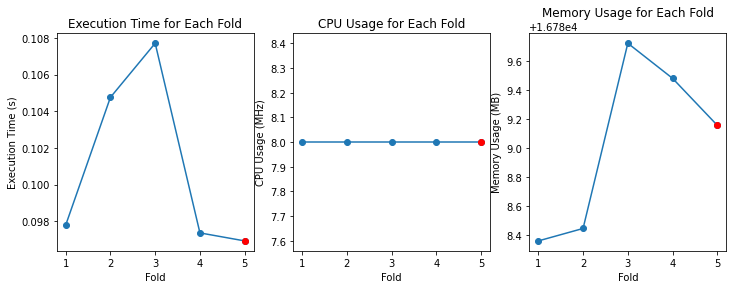

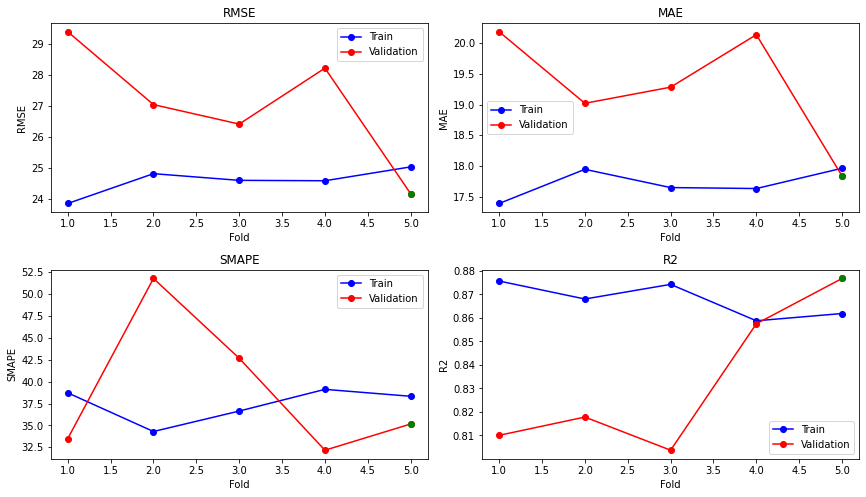

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the GBM model
        model = GradientBoostingRegressor()
        model.fit(X_train, y_train.ravel())

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the GBM model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(psutil.cpu_count())
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_smape, best_val_smape, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train SMAPE: {best_train_smape:.5f}")
print(f"Best Validation SMAPE: {best_val_smape:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(132)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (MHz)')

plt.subplot(133)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Usage (MB)')

# Plot evaluation metrics for each fold
train_rmses, val_rmses, train_maes, val_maes, train_smapes, val_smapes, train_r2s, val_r2s = zip(*eval_metrics)

plt.figure(figsize=(12, 10))
plt.subplot(321)
plt.plot(range(1, num_folds + 1), train_rmses, 'bo-', label='Train')
plt.plot(range(1, num_folds + 1), val_rmses, 'ro-', label='Validation')
plt.plot(best_fold, best_val_rmse, 'go')
plt.title('RMSE')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(322)
plt.plot(range(1, num_folds + 1), train_maes, 'bo-', label='Train')
plt.plot(range(1, num_folds + 1), val_maes, 'ro-', label='Validation')
plt.plot(best_fold, best_val_mae, 'go')
plt.title('MAE')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.subplot(323)
plt.plot(range(1, num_folds + 1), train_smapes, 'bo-', label='Train')
plt.plot(range(1, num_folds + 1), val_smapes, 'ro-', label='Validation')
plt.plot(best_fold, best_val_smape, 'go')
plt.title('SMAPE')
plt.xlabel('Fold')
plt.ylabel('SMAPE')
plt.legend()

plt.subplot(324)
plt.plot(range(1, num_folds + 1), train_r2s, 'bo-', label='Train')
plt.plot(range(1, num_folds + 1), val_r2s, 'ro-', label='Validation')
plt.plot(best_fold, best_val_r2, 'go')
plt.title('R2')
plt.xlabel('Fold')
plt.ylabel('R2')
plt.legend()

plt.tight_layout()
plt.show()



Fold 1:
Train RMSE: 23.85623
Validation RMSE: 29.38656
Train MAE: 17.38874
Validation MAE: 20.18514
Train SMAPE: 38.72615
Validation SMAPE: 33.49083
Train R2: 0.87573
Validation R2: 0.81006
Execution Time: 0.10 seconds
CPU Usage: 0.0 MHz
Memory Used: 16651.42 MB

Fold 2:
Train RMSE: 24.81609
Validation RMSE: 27.03986
Train MAE: 17.94472
Validation MAE: 19.01982
Train SMAPE: 34.30822
Validation SMAPE: 51.79481
Train R2: 0.86808
Validation R2: 0.81783
Execution Time: 0.09 seconds
CPU Usage: 0.0 MHz
Memory Used: 16651.42 MB

Fold 3:
Train RMSE: 24.60094
Validation RMSE: 26.41278
Train MAE: 17.64783
Validation MAE: 19.28212
Train SMAPE: 36.64470
Validation SMAPE: 42.67878
Train R2: 0.87431
Validation R2: 0.80372
Execution Time: 0.10 seconds
CPU Usage: 0.0 MHz
Memory Used: 16658.69 MB

Fold 4:
Train RMSE: 24.58815
Validation RMSE: 28.21355
Train MAE: 17.63205
Validation MAE: 20.13688
Train SMAPE: 39.12469
Validation SMAPE: 32.17184
Train R2: 0.85881
Validation R2: 0.85753
Execution Time: 0

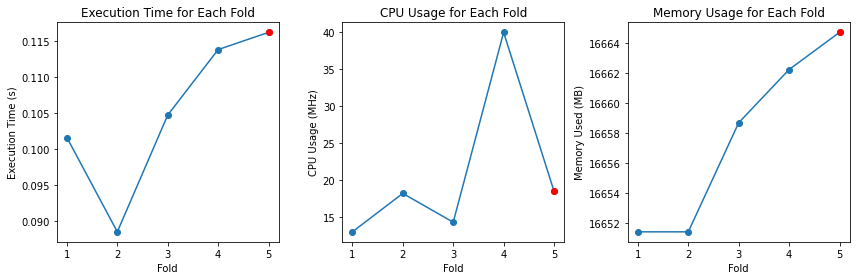

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the GBM model
        model = GradientBoostingRegressor()
        model.fit(X_train, y_train.ravel())

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the GBM model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(psutil.cpu_percent())
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {psutil.cpu_percent()} MHz")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_smape, best_val_smape, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train SMAPE: {best_train_smape:.5f}")
print(f"Best Validation SMAPE: {best_val_smape:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(132)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (MHz)')

plt.subplot(133)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')

plt.tight_layout()
plt.show()



Fold 1:
Train RMSE: 23.85623
Validation RMSE: 29.38656
Train MAE: 17.38874
Validation MAE: 20.18514
Train SMAPE: 38.72615
Validation SMAPE: 33.49083
Train R2: 0.87573
Validation R2: 0.81006
Execution Time: 0.11 seconds
CPU Usage: 13.8 MHz
Memory Used: 16753.12 MB

Fold 2:
Train RMSE: 24.81609
Validation RMSE: 27.03986
Train MAE: 17.94472
Validation MAE: 19.01982
Train SMAPE: 34.30822
Validation SMAPE: 51.79481
Train R2: 0.86808
Validation R2: 0.81783
Execution Time: 0.09 seconds
CPU Usage: 22.4 MHz
Memory Used: 16753.12 MB

Fold 3:
Train RMSE: 24.60094
Validation RMSE: 26.41278
Train MAE: 17.64783
Validation MAE: 19.28212
Train SMAPE: 36.64470
Validation SMAPE: 42.67878
Train R2: 0.87431
Validation R2: 0.80372
Execution Time: 0.10 seconds
CPU Usage: 19.6 MHz
Memory Used: 16752.93 MB

Fold 4:
Train RMSE: 24.58815
Validation RMSE: 28.21355
Train MAE: 17.63205
Validation MAE: 20.13688
Train SMAPE: 39.12469
Validation SMAPE: 32.17184
Train R2: 0.85881
Validation R2: 0.85753
Execution Time

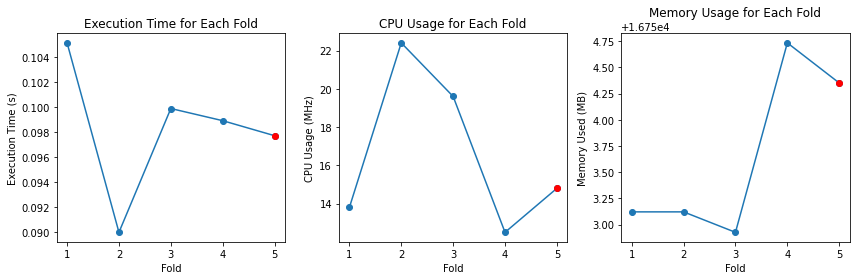

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from psutil import cpu_percent
import time

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the GBM model
        model = GradientBoostingRegressor()
        model.fit(X_train, y_train.ravel())

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the GBM model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage} MHz")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_smape, best_val_smape, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train SMAPE: {best_train_smape:.5f}")
print(f"Best Validation SMAPE: {best_val_smape:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(132)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (MHz)')

plt.subplot(133)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')

plt.tight_layout()
plt.show()



Fold 1:
Train RMSE: 23.85623
Validation RMSE: 29.38656
Train MAE: 17.38874
Validation MAE: 20.18514
Train SMAPE: 38.72615
Validation SMAPE: 33.49083
Train R2: 0.87573
Validation R2: 0.81006
Execution Time: 0.10 seconds
CPU Usage: 14.5 MHz
Memory Used: 17178.30 MB

Fold 2:
Train RMSE: 24.81609
Validation RMSE: 27.03986
Train MAE: 17.94472
Validation MAE: 19.01982
Train SMAPE: 34.30822
Validation SMAPE: 51.79481
Train R2: 0.86808
Validation R2: 0.81783
Execution Time: 0.10 seconds
CPU Usage: 24.6 MHz
Memory Used: 17176.20 MB

Fold 3:
Train RMSE: 24.60094
Validation RMSE: 26.41278
Train MAE: 17.64783
Validation MAE: 19.28212
Train SMAPE: 36.64470
Validation SMAPE: 42.67878
Train R2: 0.87431
Validation R2: 0.80372
Execution Time: 0.10 seconds
CPU Usage: 21.1 MHz
Memory Used: 17180.13 MB

Fold 4:
Train RMSE: 24.58815
Validation RMSE: 28.21355
Train MAE: 17.63205
Validation MAE: 20.13688
Train SMAPE: 39.12469
Validation SMAPE: 32.17184
Train R2: 0.85881
Validation R2: 0.85753
Execution Time

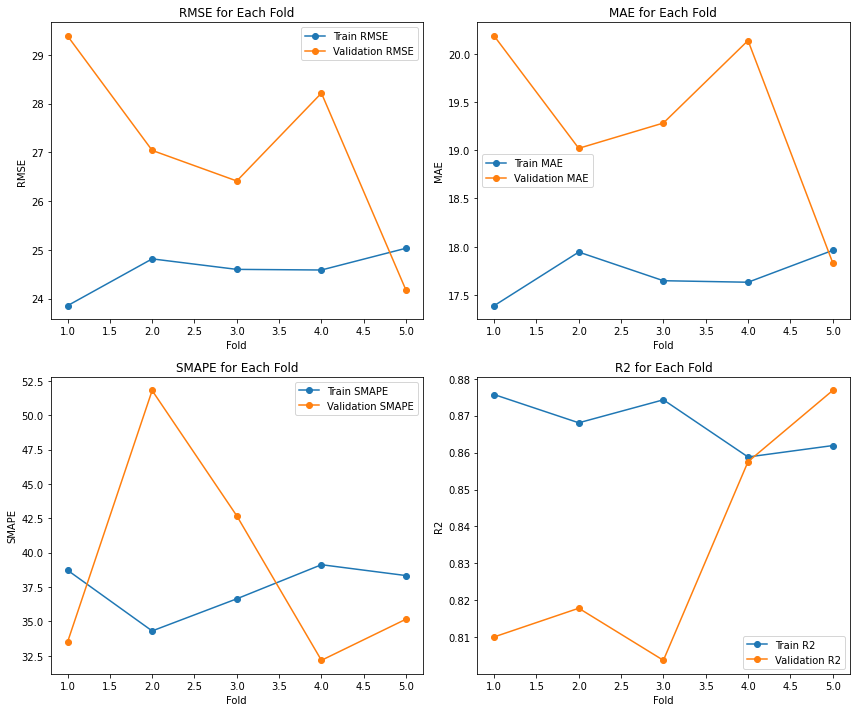

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from psutil import cpu_percent
import time

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the GBM model
        model = GradientBoostingRegressor()
        model.fit(X_train, y_train.ravel())

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the GBM model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage} MHz")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_smape, best_val_smape, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train SMAPE: {best_train_smape:.5f}")
print(f"Best Validation SMAPE: {best_val_smape:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")

# Plot evaluation metrics for each fold
train_rmses, val_rmses, train_maes, val_maes, train_smapes, val_smapes, train_r2s, val_r2s = zip(*eval_metrics)

plt.figure(figsize=(12, 10))
plt.subplot(221)
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train RMSE')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation RMSE')
plt.title('RMSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(222)
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train MAE')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation MAE')
plt.title('MAE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.subplot(223)
plt.plot(range(1, num_folds + 1), train_smapes, 'o-', label='Train SMAPE')
plt.plot(range(1, num_folds + 1), val_smapes, 'o-', label='Validation SMAPE')
plt.title('SMAPE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('SMAPE')
plt.legend()

plt.subplot(224)
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train R2')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation R2')
plt.title('R2 for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R2')
plt.legend()

plt.tight_layout()
plt.show()



Fold 1:
Train RMSE: 23.85623
Validation RMSE: 29.38656
Train MAE: 17.38874
Validation MAE: 20.18514
Train SMAPE: 38.72615
Validation SMAPE: 33.49083
Train R2: 0.87573
Validation R2: 0.81006

Computation calculations for Fold 1:
Execution Time: 0.10 seconds
CPU Usage: 13.3 MHz
Memory Used: 17741.77 MB

Fold 2:
Train RMSE: 24.81609
Validation RMSE: 27.03986
Train MAE: 17.94472
Validation MAE: 19.01982
Train SMAPE: 34.30822
Validation SMAPE: 51.79481
Train R2: 0.86808
Validation R2: 0.81783

Computation calculations for Fold 2:
Execution Time: 0.12 seconds
CPU Usage: 20.6 MHz
Memory Used: 17742.55 MB

Fold 3:
Train RMSE: 24.60094
Validation RMSE: 26.41278
Train MAE: 17.64783
Validation MAE: 19.28212
Train SMAPE: 36.64470
Validation SMAPE: 42.67878
Train R2: 0.87431
Validation R2: 0.80372

Computation calculations for Fold 3:
Execution Time: 0.10 seconds
CPU Usage: 21.7 MHz
Memory Used: 17749.51 MB

Fold 4:
Train RMSE: 24.58815
Validation RMSE: 28.21355
Train MAE: 17.63205
Validation MAE:

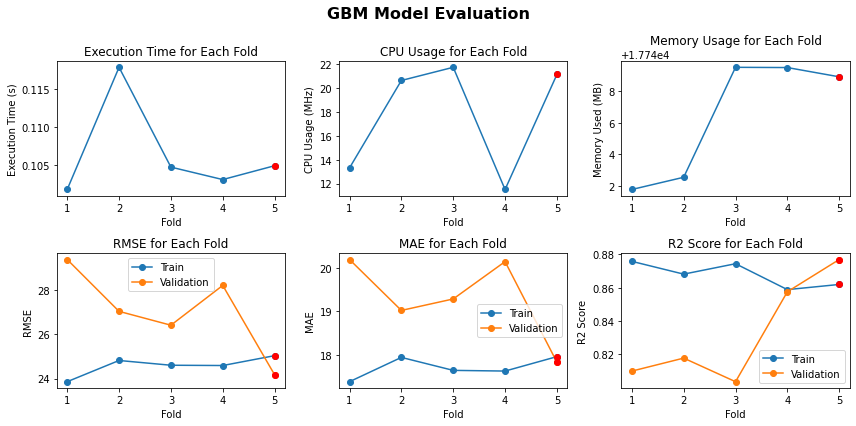

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import psutil
import time

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the GBM model
        model = GradientBoostingRegressor()
        model.fit(X_train, y_train.ravel())

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the GBM model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = psutil.cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"\nComputation calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage} MHz")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_smape, best_val_smape, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train SMAPE: {best_train_smape:.5f}")
print(f"Best Validation SMAPE: {best_val_smape:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 6))
plt.suptitle('GBM Model Evaluation', fontsize=16, fontweight='bold')

plt.subplot(231)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(232)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (MHz)')

plt.subplot(233)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')

# Plot evaluation metrics for each fold
plt.subplot(234)
train_rmses = [metrics[0] for metrics in eval_metrics]
val_rmses = [metrics[1] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation')
plt.plot(best_fold, best_train_rmse, 'ro')
plt.plot(best_fold, best_val_rmse, 'ro')
plt.title('RMSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(235)
train_maes = [metrics[2] for metrics in eval_metrics]
val_maes = [metrics[3] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation')
plt.plot(best_fold, best_train_mae, 'ro')
plt.plot(best_fold, best_val_mae, 'ro')
plt.title('MAE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.subplot(236)
train_r2s = [metrics[6] for metrics in eval_metrics]
val_r2s = [metrics[7] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation')
plt.plot(best_fold, best_train_r2, 'ro')
plt.plot(best_fold, best_val_r2, 'ro')
plt.title('R2 Score for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()



Fold 1:
Train RMSE: 23.85623
Validation RMSE: 29.38656
Train MAE: 17.38874
Validation MAE: 20.18514
Train SMAPE: 38.72615
Validation SMAPE: 33.49083
Train R2: 0.87573
Validation R2: 0.81006

Computation calculations for Fold 1:
Execution Time: 0.11 seconds
CPU Usage: 15.8 MHz
Memory Used: 17544.70 MB

Fold 2:
Train RMSE: 24.81609
Validation RMSE: 27.03986
Train MAE: 17.94472
Validation MAE: 19.01982
Train SMAPE: 34.30822
Validation SMAPE: 51.79481
Train R2: 0.86808
Validation R2: 0.81783

Computation calculations for Fold 2:
Execution Time: 0.10 seconds
CPU Usage: 37.3 MHz
Memory Used: 17547.58 MB

Fold 3:
Train RMSE: 24.60094
Validation RMSE: 26.41278
Train MAE: 17.64783
Validation MAE: 19.28212
Train SMAPE: 36.64470
Validation SMAPE: 42.67878
Train R2: 0.87431
Validation R2: 0.80372

Computation calculations for Fold 3:
Execution Time: 0.10 seconds
CPU Usage: 19.3 MHz
Memory Used: 17556.04 MB

Fold 4:
Train RMSE: 24.58815
Validation RMSE: 28.21355
Train MAE: 17.63205
Validation MAE:

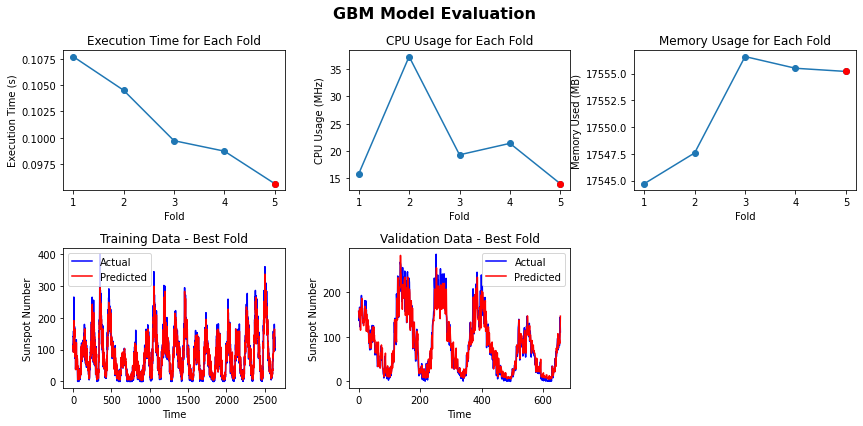

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import psutil
import time

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the GBM model
        model = GradientBoostingRegressor()
        model.fit(X_train, y_train.ravel())

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
        val_smape = 100 * np.mean(2 * np.abs(val_predictions - y_val) / (np.abs(y_val) + np.abs(val_predictions)))
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the GBM model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = psutil.cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"\nComputation calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage} MHz")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_smape, best_val_smape, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train SMAPE: {best_train_smape:.5f}")
print(f"Best Validation SMAPE: {best_val_smape:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 6))
plt.suptitle('GBM Model Evaluation', fontsize=16, fontweight='bold')

plt.subplot(231)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(232)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (MHz)')

plt.subplot(233)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')

plt.subplot(234)
plt.plot(y_train, 'b-', label='Actual')
plt.plot(train_predictions, 'r-', label='Predicted')
plt.title('Training Data - Best Fold')
plt.xlabel('Time')
plt.ylabel('Sunspot Number')
plt.legend()

plt.subplot(235)
plt.plot(y_val, 'b-', label='Actual')
plt.plot(val_predictions, 'r-', label='Predicted')
plt.title('Validation Data - Best Fold')
plt.xlabel('Time')
plt.ylabel('Sunspot Number')
plt.legend()

plt.tight_layout()
plt.show()


# 04- 10 Random Forest


Fold 1:
Train RMSE: 16.72274
Validation RMSE: 33.97632
Train MAE: 12.08381
Validation MAE: 23.39974
Train R2: 0.93894
Validation R2: 0.74609

Computation calculations for Fold 1:
Execution Time: 0.35 seconds
CPU Usage: 9.2%
Memory Used: 17875.65 MB

Fold 2:
Train RMSE: 17.66640
Validation RMSE: 29.12515
Train MAE: 12.63427
Validation MAE: 20.53148
Train R2: 0.93314
Validation R2: 0.78865

Computation calculations for Fold 2:
Execution Time: 0.35 seconds
CPU Usage: 24.2%
Memory Used: 17896.99 MB

Fold 3:
Train RMSE: 17.40969
Validation RMSE: 29.90382
Train MAE: 12.35325
Validation MAE: 22.15625
Train R2: 0.93705
Validation R2: 0.74841

Computation calculations for Fold 3:
Execution Time: 0.32 seconds
CPU Usage: 21.6%
Memory Used: 17890.77 MB

Fold 4:
Train RMSE: 17.68423
Validation RMSE: 31.90660
Train MAE: 12.54170
Validation MAE: 22.72747
Train R2: 0.92697
Validation R2: 0.81780

Computation calculations for Fold 4:
Execution Time: 0.37 seconds
CPU Usage: 22.2%
Memory Used: 17894.46 

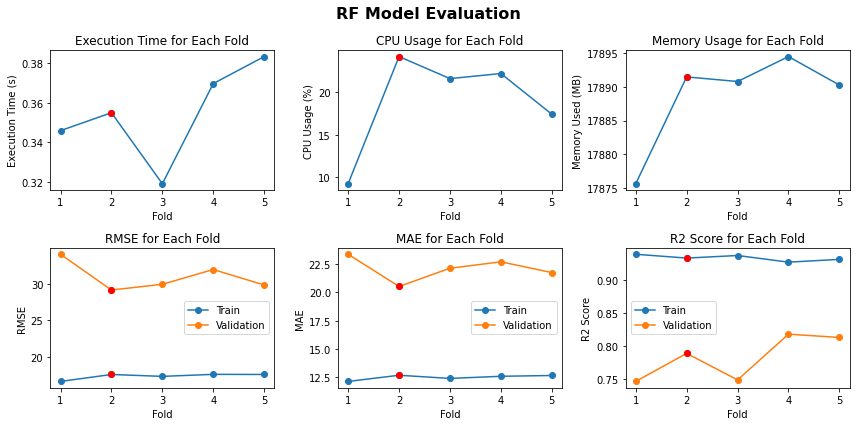

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import psutil
import time

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the RF model
        model = RandomForestRegressor()
        model.fit(X_train, y_train.ravel())

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_r2, val_r2))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the RF model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = psutil.cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"\nComputation calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage}%")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 6))
plt.suptitle('RF Model Evaluation', fontsize=16, fontweight='bold')

plt.subplot(231)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(232)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (%)')

plt.subplot(233)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')

# Plot evaluation metrics for each fold
plt.subplot(234)
train_rmses = [metrics[0] for metrics in eval_metrics]
val_rmses = [metrics[1] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation')
plt.plot(best_fold, best_train_rmse, 'ro')
plt.plot(best_fold, best_val_rmse, 'ro')
plt.title('RMSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(235)
train_maes = [metrics[2] for metrics in eval_metrics]
val_maes = [metrics[3] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation')
plt.plot(best_fold, best_train_mae, 'ro')
plt.plot(best_fold, best_val_mae, 'ro')
plt.title('MAE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.subplot(236)
train_r2s = [metrics[4] for metrics in eval_metrics]
val_r2s = [metrics[5] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation')
plt.plot(best_fold, best_train_r2, 'ro')
plt.plot(best_fold, best_val_r2, 'ro')
plt.title('R2 Score for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()



Fold 1:
Train RMSE: 16.72274
Validation RMSE: 33.97632
Train MAE: 12.08381
Validation MAE: 23.39974
Train SMAPE: 31.66991
Validation SMAPE: 37.70679
Train R2: 0.93894
Validation R2: 0.74609

Computation calculations for Fold 1:
Execution Time: 0.34 seconds
CPU Usage: 15.3%
Memory Used: 18229.83 MB

Fold 2:
Train RMSE: 17.66640
Validation RMSE: 29.12515
Train MAE: 12.63427
Validation MAE: 20.53148
Train SMAPE: 26.86955
Validation SMAPE: 55.38433
Train R2: 0.93314
Validation R2: 0.78865

Computation calculations for Fold 2:
Execution Time: 0.33 seconds
CPU Usage: 15.4%
Memory Used: 18231.54 MB

Fold 3:
Train RMSE: 17.40969
Validation RMSE: 29.90382
Train MAE: 12.35325
Validation MAE: 22.15625
Train SMAPE: 29.56384
Validation SMAPE: 47.12260
Train R2: 0.93705
Validation R2: 0.74841

Computation calculations for Fold 3:
Execution Time: 0.32 seconds
CPU Usage: 17.2%
Memory Used: 18230.80 MB

Fold 4:
Train RMSE: 17.68423
Validation RMSE: 31.90660
Train MAE: 12.54170
Validation MAE: 22.72747

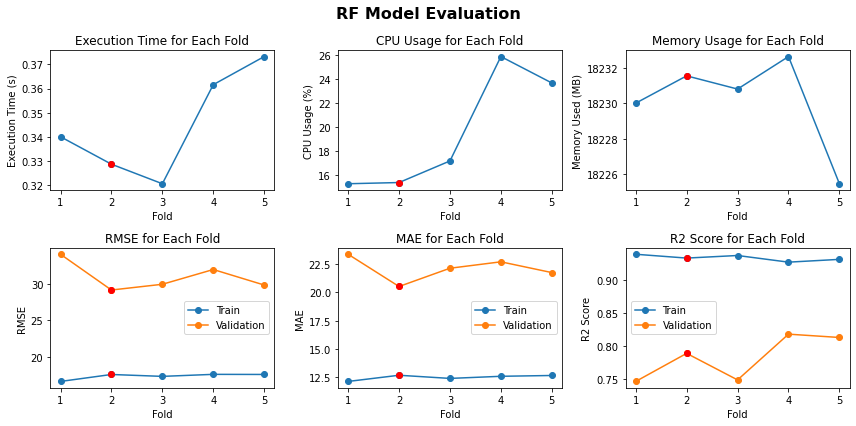

In [122]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import psutil
import time

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def smape(actual, predicted):
        absolute_diff = np.abs(actual - predicted)
        sum_values = np.abs(actual) + np.abs(predicted)
        smape = np.mean(2 * absolute_diff / sum_values) * 100
        return smape

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the RF model
        model = RandomForestRegressor()
        model.fit(X_train, y_train.ravel())

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_smape = smape(y_train, train_predictions)
        val_smape = smape(y_val, val_predictions)
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_smape, val_smape, train_r2, val_r2))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the RF model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = psutil.cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"\nComputation calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage}%")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_smape, best_val_smape, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train SMAPE: {best_train_smape:.5f}")
print(f"Best Validation SMAPE: {best_val_smape:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 6))
plt.suptitle('RF Model Evaluation', fontsize=16, fontweight='bold')

plt.subplot(231)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(232)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (%)')

plt.subplot(233)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')

# Plot evaluation metrics for each fold
plt.subplot(234)
train_rmses = [metrics[0] for metrics in eval_metrics]
val_rmses = [metrics[1] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation')
plt.plot(best_fold, best_train_rmse, 'ro')
plt.plot(best_fold, best_val_rmse, 'ro')
plt.title('RMSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(235)
train_maes = [metrics[2] for metrics in eval_metrics]
val_maes = [metrics[3] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation')
plt.plot(best_fold, best_train_mae, 'ro')
plt.plot(best_fold, best_val_mae, 'ro')
plt.title('MAE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.subplot(236)
train_r2s = [metrics[6] for metrics in eval_metrics]
val_r2s = [metrics[7] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation')
plt.plot(best_fold, best_train_r2, 'ro')
plt.plot(best_fold, best_val_r2, 'ro')
plt.title('R2 Score for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()


# 05- 10 ETS

C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(



Fold 1:
Train RMSE: 24.83001
Validation RMSE: 76.05985
Train MAE: 17.75032
Validation MAE: 65.76574
Train R2: 0.86538
Validation R2: -0.27244

Computation calculations for Fold 1:
Execution Time: 0.02 seconds
CPU Usage: 10.0%
Memory Used: 17835.65 MB

Fold 2:
Train RMSE: 25.39083
Validation RMSE: 84.21652
Train MAE: 18.13304
Validation MAE: 74.84815
Train R2: 0.86190
Validation R2: -0.76708

Computation calculations for Fold 2:
Execution Time: 0.02 seconds
CPU Usage: 18.2%
Memory Used: 17835.65 MB

Fold 3:
Train RMSE: 25.68009
Validation RMSE: 78.37542
Train MAE: 18.05756
Validation MAE: 68.04498
Train R2: 0.86304
Validation R2: -0.72823

Computation calculations for Fold 3:
Execution Time: 0.02 seconds
CPU Usage: 22.7%
Memory Used: 17835.65 MB

Fold 4:
Train RMSE: 25.21483
Validation RMSE: 80.06974
Train MAE: 17.67271
Validation MAE: 68.72530
Train R2: 0.85153
Validation R2: -0.14745

Computation calculations for Fold 4:
Execution Time: 0.02 seconds
CPU Usage: 12.5%
Memory Used: 1783

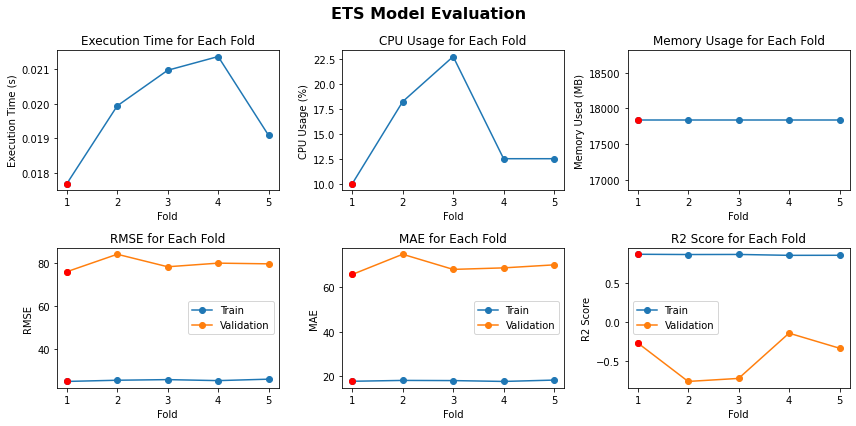

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import psutil
import time

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the ETS model
        model = ExponentialSmoothing(y_train)
        model = model.fit()

        # Make predictions
        train_predictions = model.predict(start=0, end=len(y_train) - 1)
        val_predictions = model.predict(start=len(y_train), end=len(y_train) + len(y_val) - 1)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_r2, val_r2))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the ETS model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = psutil.cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"\nComputation calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage}%")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 6))
plt.suptitle('ETS Model Evaluation', fontsize=16, fontweight='bold')

plt.subplot(231)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(232)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (%)')

plt.subplot(233)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')

# Plot evaluation metrics for each fold
plt.subplot(234)
train_rmses = [metrics[0] for metrics in eval_metrics]
val_rmses = [metrics[1] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation')
plt.plot(best_fold, best_train_rmse, 'ro')
plt.plot(best_fold, best_val_rmse, 'ro')
plt.title('RMSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(235)
train_maes = [metrics[2] for metrics in eval_metrics]
val_maes = [metrics[3] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation')
plt.plot(best_fold, best_train_mae, 'ro')
plt.plot(best_fold, best_val_mae, 'ro')
plt.title('MAE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.subplot(236)
train_r2s = [metrics[4] for metrics in eval_metrics]
val_r2s = [metrics[5] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation')
plt.plot(best_fold, best_train_r2, 'ro')
plt.plot(best_fold, best_val_r2, 'ro')
plt.title('R2 Score for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(



Fold 1:
Train RMSE: 24.83001
Validation RMSE: 76.05985
Train MAE: 17.75032
Validation MAE: 65.76574
Train R2: 0.86538
Validation R2: -0.27244
Train SMAPE: 38.77393
Validation SMAPE: 73.53089

Computation calculations for Fold 1:
Execution Time: 0.02 seconds
CPU Usage: 11.8%
Memory Used: 17892.03 MB

Fold 2:
Train RMSE: 25.39083
Validation RMSE: 84.21652
Train MAE: 18.13304
Validation MAE: 74.84815
Train R2: 0.86190
Validation R2: -0.76708
Train SMAPE: 34.38854
Validation SMAPE: 93.67911

Computation calculations for Fold 2:
Execution Time: 0.02 seconds
CPU Usage: 18.2%
Memory Used: 17892.07 MB

Fold 3:
Train RMSE: 25.68009
Validation RMSE: 78.37542
Train MAE: 18.05756
Validation MAE: 68.04498
Train R2: 0.86304
Validation R2: -0.72823
Train SMAPE: 36.76077
Validation SMAPE: 84.69683

Computation calculations for Fold 3:
Execution Time: 0.01 seconds
CPU Usage: 9.1%
Memory Used: 17892.12 MB

Fold 4:
Train RMSE: 25.21483
Validation RMSE: 80.06974
Train MAE: 17.67271
Validation MAE: 68.725

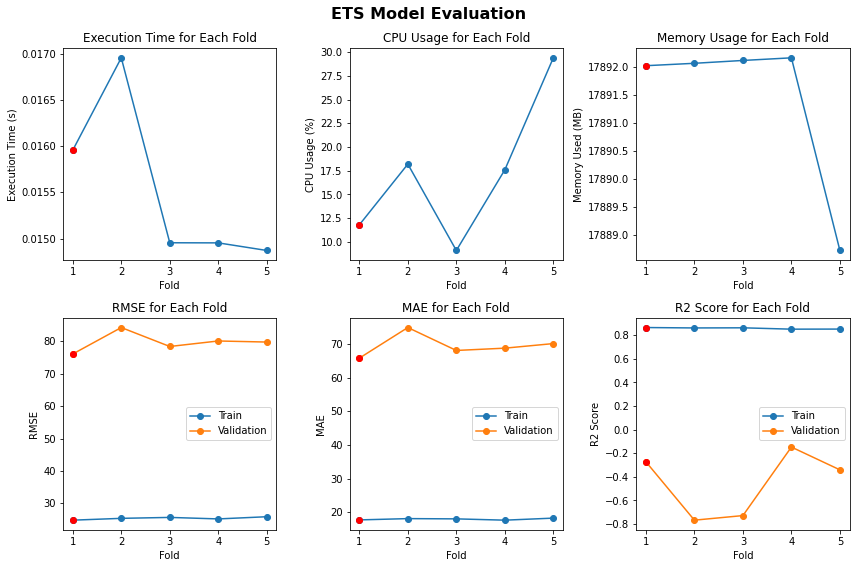

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import psutil
import time

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def smape(y_true, y_pred):
        return 200 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the ETS model
        model = ExponentialSmoothing(y_train)
        model = model.fit()

        # Make predictions
        train_predictions = model.predict(start=0, end=len(y_train) - 1)
        val_predictions = model.predict(start=len(y_train), end=len(y_train) + len(y_val) - 1)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)
        train_smape = smape(y_train, train_predictions)
        val_smape = smape(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_r2, val_r2, train_smape, val_smape))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the ETS model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = psutil.cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"\nComputation calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage}%")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_r2, best_val_r2, best_train_smape, best_val_smape = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")
print(f"Best Train SMAPE: {best_train_smape:.5f}")
print(f"Best Validation SMAPE: {best_val_smape:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 8))
plt.suptitle('ETS Model Evaluation', fontsize=16, fontweight='bold')

plt.subplot(231)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(232)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (%)')

plt.subplot(233)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')

# Plot evaluation metrics for each fold
plt.subplot(234)
train_rmses = [metrics[0] for metrics in eval_metrics]
val_rmses = [metrics[1] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation')
plt.plot(best_fold, best_train_rmse, 'ro')
plt.plot(best_fold, best_val_rmse, 'ro')
plt.title('RMSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(235)
train_maes = [metrics[2] for metrics in eval_metrics]
val_maes = [metrics[3] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation')
plt.plot(best_fold, best_train_mae, 'ro')
plt.plot(best_fold, best_val_mae, 'ro')
plt.title('MAE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.subplot(236)
train_r2s = [metrics[4] for metrics in eval_metrics]
val_r2s = [metrics[5] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation')
plt.plot(best_fold, best_train_r2, 'ro')
plt.plot(best_fold, best_val_r2, 'ro')
plt.title('R2 Score for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()


# 06 - 10  AdaBoost


Fold 1:
Train RMSE: 26.49471
Validation RMSE: 29.87093
Train MAE: 19.64424
Validation MAE: 21.33022
Train R2: 0.84672
Validation R2: 0.80374

Computation calculations for Fold 1:
Execution Time: 0.06 seconds
CPU Usage: 11.7%
Memory Used: 17793.13 MB

Fold 2:
Train RMSE: 27.81633
Validation RMSE: 29.07906
Train MAE: 20.96073
Validation MAE: 21.35200
Train R2: 0.83425
Validation R2: 0.78932

Computation calculations for Fold 2:
Execution Time: 0.06 seconds
CPU Usage: 25.0%
Memory Used: 17793.65 MB

Fold 3:
Train RMSE: 27.88800
Validation RMSE: 27.78802
Train MAE: 20.50945
Validation MAE: 20.85959
Train R2: 0.83847
Validation R2: 0.78275

Computation calculations for Fold 3:
Execution Time: 0.05 seconds
CPU Usage: 48.5%
Memory Used: 17793.90 MB

Fold 4:
Train RMSE: 30.57481
Validation RMSE: 30.44459
Train MAE: 23.71954
Validation MAE: 23.06807
Train R2: 0.78169
Validation R2: 0.83411

Computation calculations for Fold 4:
Execution Time: 0.08 seconds
CPU Usage: 12.5%
Memory Used: 17792.29

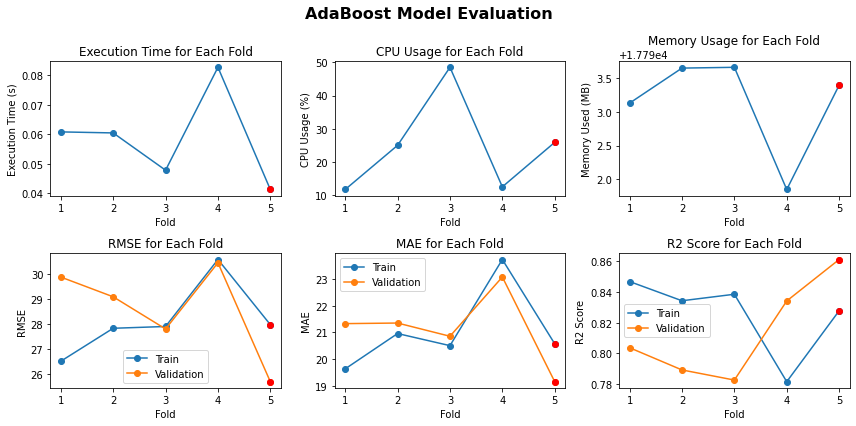

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import psutil
import time

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the AdaBoost model
        model = AdaBoostRegressor(n_estimators=50, random_state=42)
        model = model.fit(X_train, y_train.ravel())

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_r2, val_r2))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the AdaBoost model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = psutil.cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"\nComputation calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage}%")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 6))
plt.suptitle('AdaBoost Model Evaluation', fontsize=16, fontweight='bold')


plt.subplot(231)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(232)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (%)')

plt.subplot(233)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')

# Plot evaluation metrics for each fold
plt.subplot(234)
train_rmses = [metrics[0] for metrics in eval_metrics]
val_rmses = [metrics[1] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation')
plt.plot(best_fold, best_train_rmse, 'ro')
plt.plot(best_fold, best_val_rmse, 'ro')
plt.title('RMSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(235)
train_maes = [metrics[2] for metrics in eval_metrics]
val_maes = [metrics[3] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation')
plt.plot(best_fold, best_train_mae, 'ro')
plt.plot(best_fold, best_val_mae, 'ro')
plt.title('MAE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.subplot(236)
train_r2s = [metrics[4] for metrics in eval_metrics]
val_r2s = [metrics[5] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation')
plt.plot(best_fold, best_train_r2, 'ro')
plt.plot(best_fold, best_val_r2, 'ro')
plt.title('R2 Score for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()



Fold 1:
Train RMSE: 26.49471
Validation RMSE: 29.87093
Train MAE: 19.64424
Validation MAE: 21.33022
Train R2: 0.84672
Validation R2: 0.80374
Train SMAPE: 41.40412
Validation SMAPE: 34.89947

Computation calculations for Fold 1:
Execution Time: 0.05 seconds
CPU Usage: 12.6%
Memory Used: 17828.12 MB

Fold 2:
Train RMSE: 27.81633
Validation RMSE: 29.07906
Train MAE: 20.96073
Validation MAE: 21.35200
Train R2: 0.83425
Validation R2: 0.78932
Train SMAPE: 38.65126
Validation SMAPE: 53.23516

Computation calculations for Fold 2:
Execution Time: 0.06 seconds
CPU Usage: 12.5%
Memory Used: 17826.01 MB

Fold 3:
Train RMSE: 27.88800
Validation RMSE: 27.78802
Train MAE: 20.50945
Validation MAE: 20.85959
Train R2: 0.83847
Validation R2: 0.78275
Train SMAPE: 39.54850
Validation SMAPE: 45.25612

Computation calculations for Fold 3:
Execution Time: 0.04 seconds
CPU Usage: 16.7%
Memory Used: 17826.01 MB

Fold 4:
Train RMSE: 30.57481
Validation RMSE: 30.44459
Train MAE: 23.71954
Validation MAE: 23.06807

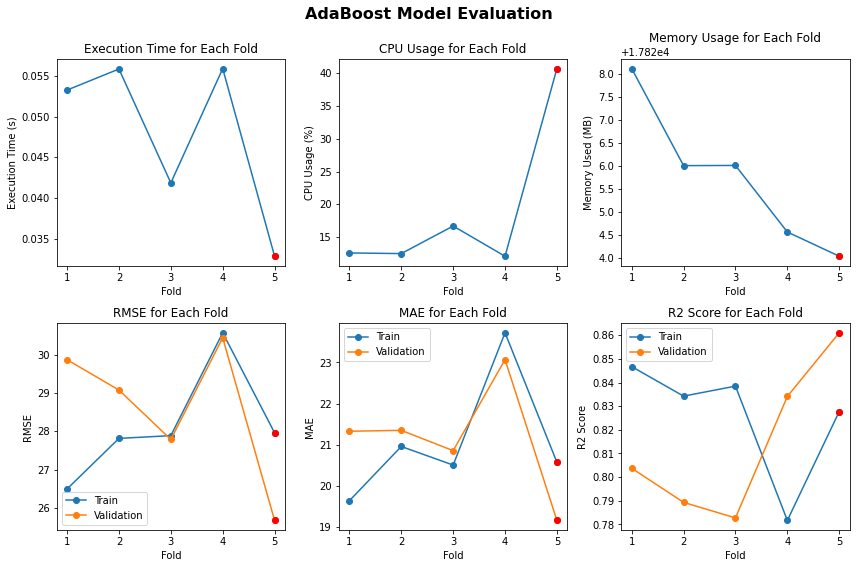

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import psutil
import time

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def calculate_smape(y_true, y_pred):
        numerator = np.abs(y_true - y_pred)
        denominator = np.abs(y_true) + np.abs(y_pred)
        return np.mean(2.0 * numerator / denominator) * 100.0

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Train the AdaBoost model
        model = AdaBoostRegressor(n_estimators=50, random_state=42)
        model = model.fit(X_train, y_train.ravel())

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
        y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)
        train_smape = calculate_smape(y_train, train_predictions)
        val_smape = calculate_smape(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_r2, val_r2, train_smape, val_smape))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the AdaBoost model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = psutil.cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"\nComputation calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage}%")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_r2, best_val_r2, best_train_smape, best_val_smape = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")
print(f"Best Train SMAPE: {best_train_smape:.5f}")
print(f"Best Validation SMAPE: {best_val_smape:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 8))
plt.suptitle('AdaBoost Model Evaluation', fontsize=16, fontweight='bold')

plt.subplot(231)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(232)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (%)')

plt.subplot(233)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')

plt.subplot(234)
train_rmses = [metrics[0] for metrics in eval_metrics]
val_rmses = [metrics[1] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation')
plt.plot(best_fold, best_train_rmse, 'ro')
plt.plot(best_fold, best_val_rmse, 'ro')
plt.title('RMSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(235)
train_maes = [metrics[2] for metrics in eval_metrics]
val_maes = [metrics[3] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation')
plt.plot(best_fold, best_train_mae, 'ro')
plt.plot(best_fold, best_val_mae, 'ro')
plt.title('MAE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.subplot(236)
train_r2s = [metrics[4] for metrics in eval_metrics]
val_r2s = [metrics[5] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation')
plt.plot(best_fold, best_train_r2, 'ro')
plt.plot(best_fold, best_val_r2, 'ro')
plt.title('R2 Score for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()


# 07 -10 GRU

21/21 [==============================] - 0s 1ms/step

Fold 1:
Train RMSE: 26.03182
Validation RMSE: 28.86404
Train MAE: 18.66642
Validation MAE: 19.73358
Train R2: 0.85203
Validation R2: 0.81675

Computation calculations for Fold 1:
Execution Time: 11.69 seconds
CPU Usage: 14.1%
Memory Used: 17854.79 MB
21/21 [==============================] - 0s 1ms/step

Fold 2:
Train RMSE: 26.65088
Validation RMSE: 26.57358
Train MAE: 19.12686
Validation MAE: 18.66766
Train R2: 0.84785
Validation R2: 0.82406

Computation calculations for Fold 2:
Execution Time: 11.16 seconds
CPU Usage: 25.4%
Memory Used: 17835.27 MB
21/21 [==============================] - 0s 2ms/step

Fold 3:
Train RMSE: 26.83354
Validation RMSE: 25.96981
Train MAE: 18.87830
Validation MAE: 19.06230
Train R2: 0.85046
Validation R2: 0.81025

Computation calculations for Fold 3:
Execution Time: 12.48 seconds
CPU Usage: 25.3%
Memory Used: 17844.04 MB
21/21 [==============================] - 0s 1ms/step

Fold 4:
Train RMSE: 26.61569
Va

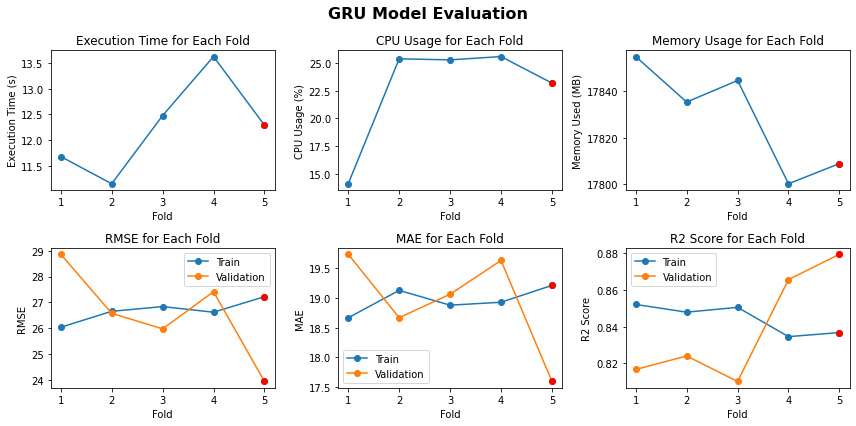

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import psutil
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Define and train the GRU model
        model = Sequential()
        model.add(GRU(64, input_shape=(1, 1)))
        model.add(Dense(1))
        model.compile(loss='mse', optimizer='adam')
        model.fit(X_train, y_train, epochs=50, verbose=0)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions)
        y_train = scaler.inverse_transform(y_train)
        val_predictions = scaler.inverse_transform(val_predictions)
        y_val = scaler.inverse_transform(y_val)

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_r2, val_r2))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the GRU model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = psutil.cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"\nComputation calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage}%")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 6))
plt.suptitle('GRU Model Evaluation', fontsize=16, fontweight='bold')


plt.subplot(231)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(232)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (%)')

plt.subplot(233)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')

# Plot evaluation metrics for each fold
plt.subplot(234)
train_rmses = [metrics[0] for metrics in eval_metrics]
val_rmses = [metrics[1] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation')
plt.plot(best_fold, best_train_rmse, 'ro')
plt.plot(best_fold, best_val_rmse, 'ro')
plt.title('RMSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(235)
train_maes = [metrics[2] for metrics in eval_metrics]
val_maes = [metrics[3] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation')
plt.plot(best_fold, best_train_mae, 'ro')
plt.plot(best_fold, best_val_mae, 'ro')
plt.title('MAE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.subplot(236)
train_r2s = [metrics[4] for metrics in eval_metrics]
val_r2s = [metrics[5] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation')
plt.plot(best_fold, best_train_r2, 'ro')
plt.plot(best_fold, best_val_r2, 'ro')
plt.title('R2 Score for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()


21/21 [==============================] - 0s 1ms/step

Fold 1:
Train RMSE: 26.03992
Validation RMSE: 28.86379
Train MAE: 18.67735
Validation MAE: 19.74242
Train R2: 0.85194
Validation R2: 0.81676
Train SMAPE: 0.20113
Validation SMAPE: 0.16848

Computation calculations for Fold 1:
Execution Time: 10.98 seconds
CPU Usage: 13.6%
Memory Used: 17873.61 MB
21/21 [==============================] - 0s 1ms/step

Fold 2:
Train RMSE: 26.71889
Validation RMSE: 26.65085
Train MAE: 18.99861
Validation MAE: 18.41615
Train R2: 0.84707
Validation R2: 0.82304
Train SMAPE: 0.18110
Validation SMAPE: 0.26221

Computation calculations for Fold 2:
Execution Time: 12.27 seconds
CPU Usage: 26.4%
Memory Used: 17881.30 MB
21/21 [==============================] - 0s 1ms/step

Fold 3:
Train RMSE: 26.82056
Validation RMSE: 26.17241
Train MAE: 18.94053
Validation MAE: 19.14935
Train R2: 0.85060
Validation R2: 0.80728
Train SMAPE: 0.18950
Validation SMAPE: 0.21388

Computation calculations for Fold 3:
Execution Time: 

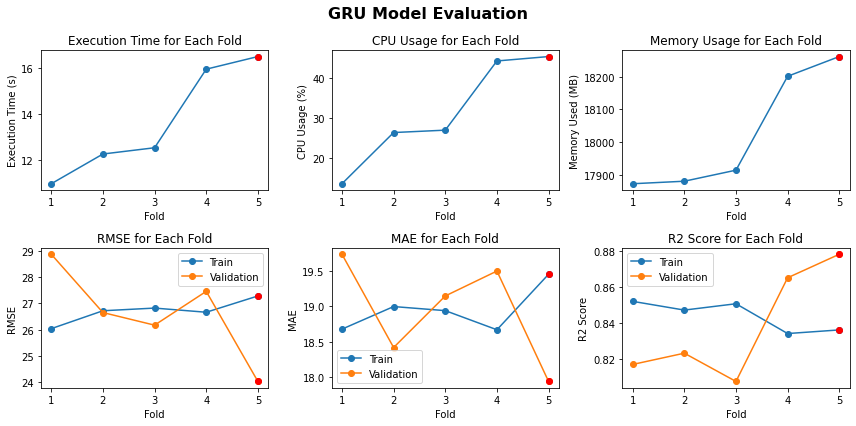

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import psutil
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def smape(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Define and train the GRU model
        model = Sequential()
        model.add(GRU(64, input_shape=(1, 1)))
        model.add(Dense(1))
        model.compile(loss='mse', optimizer='adam')
        model.fit(X_train, y_train, epochs=50, verbose=0)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions)
        y_train = scaler.inverse_transform(y_train)
        val_predictions = scaler.inverse_transform(val_predictions)
        y_val = scaler.inverse_transform(y_val)

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)
        train_smape = smape(y_train, train_predictions)
        val_smape = smape(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_r2, val_r2, train_smape, val_smape))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the GRU model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = psutil.cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"\nComputation calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage}%")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_r2, best_val_r2, best_train_smape, best_val_smape = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")
print(f"Best Train SMAPE: {best_train_smape:.5f}")
print(f"Best Validation SMAPE: {best_val_smape:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 6))
plt.suptitle('GRU Model Evaluation', fontsize=16, fontweight='bold')

plt.subplot(231)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(232)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (%)')

plt.subplot(233)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')

# Plot evaluation metrics for each fold
plt.subplot(234)
train_rmses = [metrics[0] for metrics in eval_metrics]
val_rmses = [metrics[1] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation')
plt.plot(best_fold, best_train_rmse, 'ro')
plt.plot(best_fold, best_val_rmse, 'ro')
plt.title('RMSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(235)
train_maes = [metrics[2] for metrics in eval_metrics]
val_maes = [metrics[3] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation')
plt.plot(best_fold, best_train_mae, 'ro')
plt.plot(best_fold, best_val_mae, 'ro')
plt.title('MAE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.subplot(236)
train_r2s = [metrics[4] for metrics in eval_metrics]
val_r2s = [metrics[5] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation')
plt.plot(best_fold, best_train_r2, 'ro')
plt.plot(best_fold, best_val_r2, 'ro')
plt.title('R2 Score for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()


21/21 [==============================] - 0s 1ms/step

Fold 1:
Train RMSE: 26.03357
Validation RMSE: 28.82002
Train MAE: 18.77912
Validation MAE: 19.78503
Train R2: 0.85201
Validation R2: 0.81731
Train SMAPE: 40.19520
Validation SMAPE: 33.30248

Computation calculations for Fold 1:
Execution Time: 10.86 seconds
CPU Usage: 12.3%
Memory Used: 18176.38 MB
21/21 [==============================] - 0s 1ms/step

Fold 2:
Train RMSE: 26.64656
Validation RMSE: 26.54590
Train MAE: 18.99054
Validation MAE: 18.45764
Train R2: 0.84790
Validation R2: 0.82443
Train SMAPE: 35.63531
Validation SMAPE: 51.66524

Computation calculations for Fold 2:
Execution Time: 10.70 seconds
CPU Usage: 23.4%
Memory Used: 18215.99 MB
21/21 [==============================] - 0s 1ms/step

Fold 3:
Train RMSE: 26.90927
Validation RMSE: 26.35803
Train MAE: 18.90966
Validation MAE: 19.14144
Train R2: 0.84961
Validation R2: 0.80454
Train SMAPE: 38.31878
Validation SMAPE: 43.66537

Computation calculations for Fold 3:
Execution 

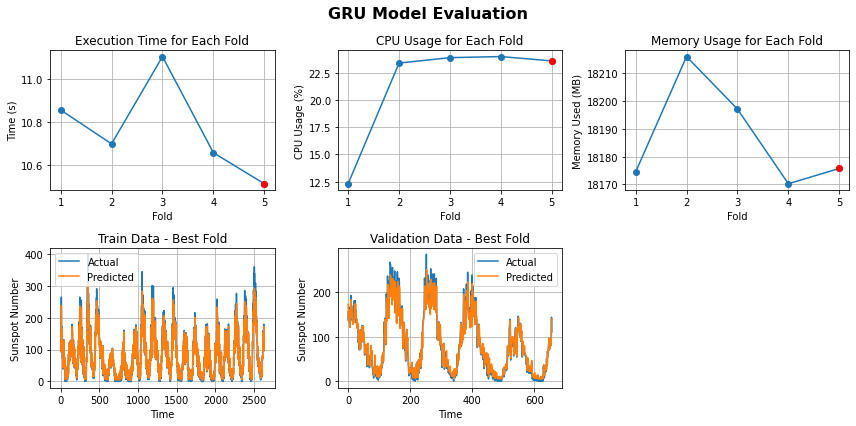

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import psutil
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Define SMAPE function
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true) + 1e-8))

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Define and train the GRU model
        model = Sequential()
        model.add(GRU(64, input_shape=(1, 1)))
        model.add(Dense(1))
        model.compile(loss='mse', optimizer='adam')
        model.fit(X_train, y_train, epochs=50, verbose=0)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions)
        y_train = scaler.inverse_transform(y_train)
        val_predictions = scaler.inverse_transform(val_predictions)
        y_val = scaler.inverse_transform(y_val)

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)
        train_smape = smape(y_train, train_predictions)
        val_smape = smape(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_r2, val_r2, train_smape, val_smape))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the GRU model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = psutil.cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"\nComputation calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage}%")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_r2, best_val_r2, best_train_smape, best_val_smape = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")
print(f"Best Train SMAPE: {best_train_smape:.5f}")
print(f"Best Validation SMAPE: {best_val_smape:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 6))
plt.suptitle('GRU Model Evaluation', fontsize=16, fontweight='bold')


plt.subplot(231)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Time (s)')
plt.grid(True)


plt.subplot(232)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (%)')
plt.grid(True)


plt.subplot(233)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')
plt.grid(True)

# Plot the best fold predictions
plt.subplot(234)
plt.plot(y_train, label='Actual')
plt.plot(train_predictions, label='Predicted')
plt.title('Train Data - Best Fold')
plt.xlabel('Time')
plt.ylabel('Sunspot Number')
plt.legend()
plt.grid(True)


plt.subplot(235)
plt.plot(y_val, label='Actual')
plt.plot(val_predictions, label='Predicted')
plt.title('Validation Data - Best Fold')
plt.xlabel('Time')
plt.ylabel('Sunspot Number')
plt.legend()
plt.grid(True)

# Show all plots
plt.tight_layout()
plt.show()


# 08- 10 LSTM

21/21 [==============================] - 0s 1ms/step

Fold 1:
Train RMSE: 26.03413
Validation RMSE: 28.83936
Train MAE: 18.77640
Validation MAE: 19.80578
Train R2: 0.85201
Validation R2: 0.81707

Computation calculations for Fold 1:
Execution Time: 12.26 seconds
CPU Usage: 19.2%
Memory Used: 17831.41 MB
21/21 [==============================] - 0s 1ms/step

Fold 2:
Train RMSE: 26.71658
Validation RMSE: 26.67469
Train MAE: 19.25238
Validation MAE: 18.86242
Train R2: 0.84710
Validation R2: 0.82272

Computation calculations for Fold 2:
Execution Time: 13.36 seconds
CPU Usage: 28.2%
Memory Used: 17854.41 MB
21/21 [==============================] - 0s 1ms/step

Fold 3:
Train RMSE: 26.83773
Validation RMSE: 26.27626
Train MAE: 18.95088
Validation MAE: 19.17998
Train R2: 0.85041
Validation R2: 0.80575

Computation calculations for Fold 3:
Execution Time: 13.01 seconds
CPU Usage: 26.7%
Memory Used: 17870.43 MB
21/21 [==============================] - 0s 1ms/step

Fold 4:
Train RMSE: 26.59033
Va

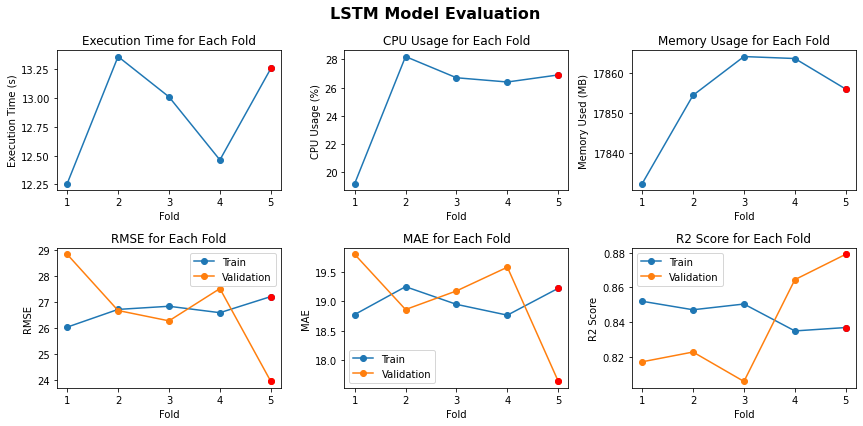

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import psutil
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Define and train the LSTM model
        model = Sequential()
        model.add(LSTM(64, input_shape=(1, 1)))
        model.add(Dense(1))
        model.compile(loss='mse', optimizer='adam')
        model.fit(X_train, y_train, epochs=50, verbose=0)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions)
        y_train = scaler.inverse_transform(y_train)
        val_predictions = scaler.inverse_transform(val_predictions)
        y_val = scaler.inverse_transform(y_val)

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_r2, val_r2))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the LSTM model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = psutil.cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"\nComputation calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage}%")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 6))
plt.suptitle('LSTM Model Evaluation', fontsize=16, fontweight='bold')


plt.subplot(231)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(232)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (%)')

plt.subplot(233)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')

# Plot evaluation metrics for each fold
plt.subplot(234)
train_rmses = [metrics[0] for metrics in eval_metrics]
val_rmses = [metrics[1] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation')
plt.plot(best_fold, best_train_rmse, 'ro')
plt.plot(best_fold, best_val_rmse, 'ro')
plt.title('RMSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(235)
train_maes = [metrics[2] for metrics in eval_metrics]
val_maes = [metrics[3] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation')
plt.plot(best_fold, best_train_mae, 'ro')
plt.plot(best_fold, best_val_mae, 'ro')
plt.title('MAE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.subplot(236)
train_r2s = [metrics[4] for metrics in eval_metrics]
val_r2s = [metrics[5] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation')
plt.plot(best_fold, best_train_r2, 'ro')
plt.plot(best_fold, best_val_r2, 'ro')
plt.title('R2 Score for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()


21/21 [==============================] - 0s 1ms/step

Fold 1:
Train RMSE: 26.10424
Validation RMSE: 28.91962
Train MAE: 18.79455
Validation MAE: 19.86769
Train R2: 0.85121
Validation R2: 0.81605
Train SMAPE: 40.19860
Validation SMAPE: 33.57866

Computation calculations for Fold 1:
Execution Time: 10.90 seconds
CPU Usage: 16.7%
Memory Used: 18178.77 MB
21/21 [==============================] - 0s 2ms/step

Fold 2:
Train RMSE: 26.67209
Validation RMSE: 26.59118
Train MAE: 19.02460
Validation MAE: 18.52947
Train R2: 0.84761
Validation R2: 0.82383
Train SMAPE: 35.60487
Validation SMAPE: 51.61149

Computation calculations for Fold 2:
Execution Time: 12.57 seconds
CPU Usage: 25.9%
Memory Used: 18209.75 MB
21/21 [==============================] - 0s 1ms/step

Fold 3:
Train RMSE: 26.81830
Validation RMSE: 26.05697
Train MAE: 18.85717
Validation MAE: 19.05985
Train R2: 0.85063
Validation R2: 0.80898
Train SMAPE: 37.76517
Validation SMAPE: 42.59161

Computation calculations for Fold 3:
Execution 

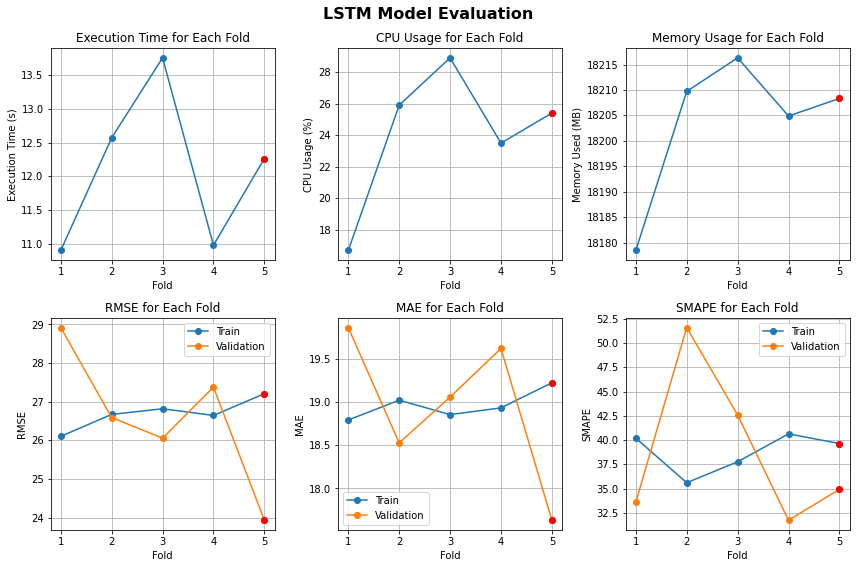

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import psutil
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def smape(y_true, y_pred):
        return np.mean((np.abs(y_true - y_pred) * 200 / (np.abs(y_true) + np.abs(y_pred))))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Define and train the LSTM model
        model = Sequential()
        model.add(LSTM(64, input_shape=(1, 1)))
        model.add(Dense(1))
        model.compile(loss='mse', optimizer='adam')
        model.fit(X_train, y_train, epochs=50, verbose=0)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions)
        y_train = scaler.inverse_transform(y_train)
        val_predictions = scaler.inverse_transform(val_predictions)
        y_val = scaler.inverse_transform(y_val)

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)
        train_smape = smape(y_train, train_predictions)
        val_smape = smape(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_r2, val_r2, train_smape, val_smape))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the LSTM model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = psutil.cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"\nComputation calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage}%")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_r2, best_val_r2, best_train_smape, best_val_smape = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")
print(f"Best Train SMAPE: {best_train_smape:.5f}")
print(f"Best Validation SMAPE: {best_val_smape:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 8))
plt.suptitle('LSTM Model Evaluation', fontsize=16, fontweight='bold')

plt.subplot(231)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')
plt.grid(True)

plt.subplot(232)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (%)')
plt.grid(True)

plt.subplot(233)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')
plt.grid(True)

# Plot evaluation metrics for each fold
plt.subplot(234)
train_rmses = [metrics[0] for metrics in eval_metrics]
val_rmses = [metrics[1] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation')
plt.plot(best_fold, best_train_rmse, 'ro')
plt.plot(best_fold, best_val_rmse, 'ro')
plt.title('RMSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)

plt.subplot(235)
train_maes = [metrics[2] for metrics in eval_metrics]
val_maes = [metrics[3] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation')
plt.plot(best_fold, best_train_mae, 'ro')
plt.plot(best_fold, best_val_mae, 'ro')
plt.title('MAE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.subplot(236)
train_smapes = [metrics[6] for metrics in eval_metrics]
val_smapes = [metrics[7] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_smapes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_smapes, 'o-', label='Validation')
plt.plot(best_fold, best_train_smape, 'ro')
plt.plot(best_fold, best_val_smape, 'ro')
plt.title('SMAPE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('SMAPE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# 09 -10 Bidirectional LSTM

21/21 [==============================] - 0s 2ms/step

Fold 1:
Train RMSE: 26.02782
Validation RMSE: 28.86456
Train MAE: 18.67345
Validation MAE: 19.74536
Train R2: 0.85208
Validation R2: 0.81675

Computation calculations for Fold 1:
Execution Time: 18.51 seconds
CPU Usage: 14.2%
Memory Used: 17729.34 MB
21/21 [==============================] - 0s 2ms/step

Fold 2:
Train RMSE: 26.69863
Validation RMSE: 26.55568
Train MAE: 19.22310
Validation MAE: 18.71528
Train R2: 0.84730
Validation R2: 0.82430

Computation calculations for Fold 2:
Execution Time: 20.69 seconds
CPU Usage: 31.2%
Memory Used: 17715.95 MB
21/21 [==============================] - 0s 2ms/step

Fold 3:
Train RMSE: 26.80905
Validation RMSE: 26.08353
Train MAE: 18.93883
Validation MAE: 19.13468
Train R2: 0.85073
Validation R2: 0.80859

Computation calculations for Fold 3:
Execution Time: 23.44 seconds
CPU Usage: 32.6%
Memory Used: 17720.08 MB
21/21 [==============================] - 0s 2ms/step

Fold 4:
Train RMSE: 26.59513
Va

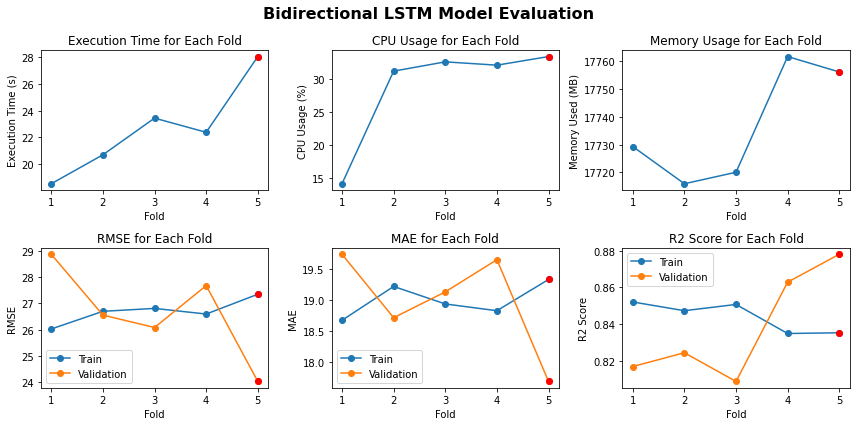

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import psutil
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Define and train the Bidirectional LSTM model
        model = Sequential()
        model.add(Bidirectional(LSTM(64), input_shape=(1, 1)))
        model.add(Dense(1))
        model.compile(loss='mse', optimizer='adam')
        model.fit(X_train, y_train, epochs=50, verbose=0)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions)
        y_train = scaler.inverse_transform(y_train)
        val_predictions = scaler.inverse_transform(val_predictions)
        y_val = scaler.inverse_transform(y_val)

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_r2, val_r2))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the Bidirectional LSTM model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = psutil.cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"\nComputation calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage}%")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 6))
plt.suptitle('Bidirectional LSTM Model Evaluation', fontsize=16, fontweight='bold')

plt.subplot(231)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(232)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (%)')

plt.subplot(233)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')

# Plot evaluation metrics for each fold
plt.subplot(234)
train_rmses = [metrics[0] for metrics in eval_metrics]
val_rmses = [metrics[1] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation')
plt.plot(best_fold, best_train_rmse, 'ro')
plt.plot(best_fold, best_val_rmse, 'ro')
plt.title('RMSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(235)
train_maes = [metrics[2] for metrics in eval_metrics]
val_maes = [metrics[3] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation')
plt.plot(best_fold, best_train_mae, 'ro')
plt.plot(best_fold, best_val_mae, 'ro')
plt.title('MAE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.subplot(236)
train_r2s = [metrics[4] for metrics in eval_metrics]
val_r2s = [metrics[5] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation')
plt.plot(best_fold, best_train_r2, 'ro')
plt.plot(best_fold, best_val_r2, 'ro')
plt.title('R2 Score for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()


21/21 [==============================] - 0s 2ms/step

Fold 1:
Train RMSE: 26.05440
Validation RMSE: 28.85712
Train MAE: 18.73501
Validation MAE: 19.79765
Train R2: 0.85177
Validation R2: 0.81684
Train SMAPE: 40.13707
Validation SMAPE: 33.27075

Computation calculations for Fold 1:
Execution Time: 16.94 seconds
CPU Usage: 15.4%
Memory Used: 17169.50 MB
21/21 [==============================] - 0s 2ms/step

Fold 2:
Train RMSE: 26.67100
Validation RMSE: 26.50083
Train MAE: 19.02450
Validation MAE: 18.44110
Train R2: 0.84762
Validation R2: 0.82502
Train SMAPE: 35.58402
Validation SMAPE: 51.40492

Computation calculations for Fold 2:
Execution Time: 16.96 seconds
CPU Usage: 28.6%
Memory Used: 17093.09 MB
21/21 [==============================] - 0s 1ms/step

Fold 3:
Train RMSE: 26.81044
Validation RMSE: 26.10858
Train MAE: 18.85926
Validation MAE: 19.07267
Train R2: 0.85071
Validation R2: 0.80822
Train SMAPE: 37.83113
Validation SMAPE: 42.74070

Computation calculations for Fold 3:
Execution 

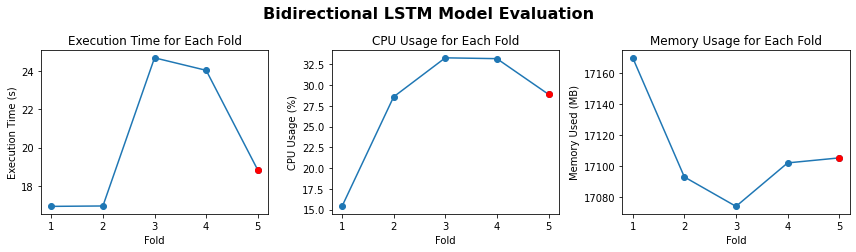

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import psutil
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Define and train the Bidirectional LSTM model
        model = Sequential()
        model.add(Bidirectional(LSTM(64), input_shape=(1, 1)))
        model.add(Dense(1))
        model.compile(loss='mse', optimizer='adam')
        model.fit(X_train, y_train, epochs=50, verbose=0)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions)
        y_train = scaler.inverse_transform(y_train)
        val_predictions = scaler.inverse_transform(val_predictions)
        y_val = scaler.inverse_transform(y_val)

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)
        
        # Calculate SMAPE
        train_smape = np.mean(200 * np.abs(train_predictions - y_train) / (np.abs(train_predictions) + np.abs(y_train)))
        val_smape = np.mean(200 * np.abs(val_predictions - y_val) / (np.abs(val_predictions) + np.abs(y_val)))

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_r2, val_r2, train_smape, val_smape))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the Bidirectional LSTM model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = psutil.cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"\nComputation calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage}%")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_r2, best_val_r2, best_train_smape, best_val_smape = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")
print(f"Best Train SMAPE: {best_train_smape:.5f}")
print(f"Best Validation SMAPE: {best_val_smape:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 6))
plt.suptitle('Bidirectional LSTM Model Evaluation', fontsize=16, fontweight='bold')

plt.subplot(231)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(232)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (%)')

plt.subplot(233)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')

plt.tight_layout()
plt.show()


21/21 [==============================] - 0s 2ms/step

Fold 1:
Train RMSE: 26.02699
Validation RMSE: 28.85869
Train MAE: 18.73498
Validation MAE: 19.76276
Train R2: 0.85209
Validation R2: 0.81682

Computation calculations for Fold 1:
Execution Time: 20.74 seconds
CPU Usage: 11.6%
Memory Used: 17356.62 MB
21/21 [==============================] - 0s 2ms/step

Fold 2:
Train RMSE: 26.93058
Validation RMSE: 26.89594
Train MAE: 19.38706
Validation MAE: 19.00211
Train R2: 0.84464
Validation R2: 0.81977

Computation calculations for Fold 2:
Execution Time: 20.97 seconds
CPU Usage: 31.2%
Memory Used: 17368.32 MB
21/21 [==============================] - 0s 2ms/step

Fold 3:
Train RMSE: 26.82823
Validation RMSE: 26.04471
Train MAE: 18.92047
Validation MAE: 19.11595
Train R2: 0.85052
Validation R2: 0.80916

Computation calculations for Fold 3:
Execution Time: 22.58 seconds
CPU Usage: 37.0%
Memory Used: 17571.82 MB
21/21 [==============================] - 0s 1ms/step

Fold 4:
Train RMSE: 26.59912
Va

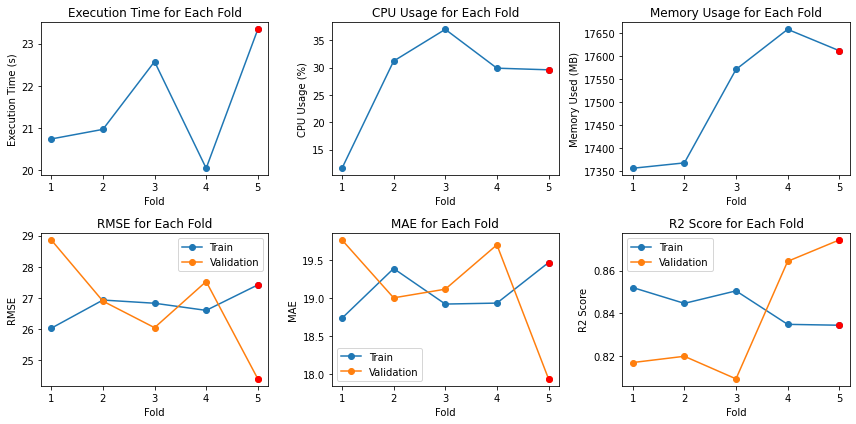

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import psutil
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Define and train the Stacked LSTM model
        model = Sequential()
        model.add(LSTM(64, return_sequences=True, input_shape=(1, 1)))
        model.add(LSTM(64))
        model.add(Dense(1))
        model.compile(loss='mse', optimizer='adam')
        model.fit(X_train, y_train, epochs=50, verbose=0)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions)
        y_train = scaler.inverse_transform(y_train)
        val_predictions = scaler.inverse_transform(val_predictions)
        y_val = scaler.inverse_transform(y_val)

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_r2, val_r2))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the Stacked LSTM model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = psutil.cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"\nComputation calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage}%")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 6))
plt.subplot(231)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(232)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (%)')

plt.subplot(233)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')

# Plot evaluation metrics for each fold
plt.subplot(234)
train_rmses = [metrics[0] for metrics in eval_metrics]
val_rmses = [metrics[1] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation')
plt.plot(best_fold, best_train_rmse, 'ro')
plt.plot(best_fold, best_val_rmse, 'ro')
plt.title('RMSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(235)
train_maes = [metrics[2] for metrics in eval_metrics]
val_maes = [metrics[3] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation')
plt.plot(best_fold, best_train_mae, 'ro')
plt.plot(best_fold, best_val_mae, 'ro')
plt.title('MAE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.subplot(236)
train_r2s = [metrics[4] for metrics in eval_metrics]
val_r2s = [metrics[5] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_r2s, 'o-', label='Train')
plt.plot(range(1, num_folds + 1), val_r2s, 'o-', label='Validation')
plt.plot(best_fold, best_train_r2, 'ro')
plt.plot(best_fold, best_val_r2, 'ro')
plt.title('R2 Score for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()


21/21 [==============================] - 0s 2ms/step

Fold 1:
Train RMSE: 26.19563
Validation RMSE: 29.02886
Train MAE: 18.94469
Validation MAE: 20.05288
Train R2: 0.85016
Validation R2: 0.81465

Computation calculations for Fold 1:
Execution Time: 20.77 seconds
CPU Usage: 15.4%
Memory Used: 17700.59 MB
21/21 [==============================] - 0s 2ms/step

Fold 2:
Train RMSE: 26.79144
Validation RMSE: 26.75515
Train MAE: 19.24708
Validation MAE: 18.82852
Train R2: 0.84624
Validation R2: 0.82165

Computation calculations for Fold 2:
Execution Time: 25.47 seconds
CPU Usage: 30.2%
Memory Used: 17732.35 MB
21/21 [==============================] - 0s 2ms/step

Fold 3:
Train RMSE: 26.97110
Validation RMSE: 26.54506
Train MAE: 19.05600
Validation MAE: 19.29985
Train R2: 0.84892
Validation R2: 0.80175

Computation calculations for Fold 3:
Execution Time: 25.43 seconds
CPU Usage: 31.4%
Memory Used: 17730.28 MB
21/21 [==============================] - 0s 3ms/step

Fold 4:
Train RMSE: 26.70145
Va

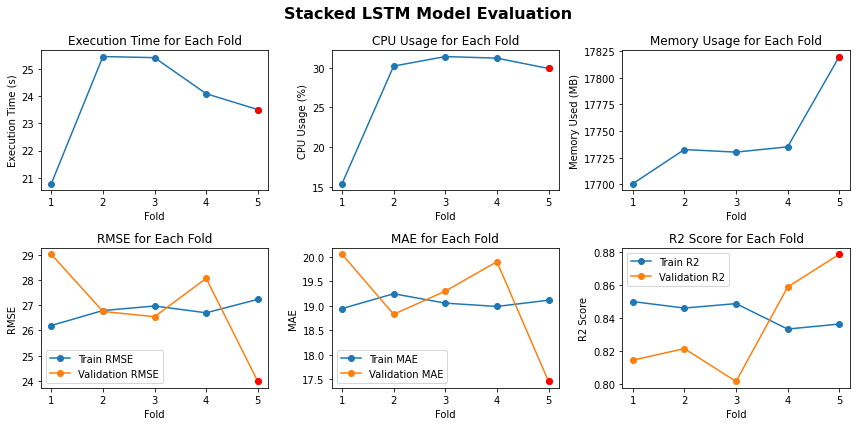

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import psutil
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Define and train the Stacked LSTM model
        model = Sequential()
        model.add(LSTM(64, return_sequences=True, input_shape=(1, 1)))
        model.add(LSTM(64))
        model.add(Dense(1))
        model.compile(loss='mse', optimizer='adam')
        model.fit(X_train, y_train, epochs=50, verbose=0)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions)
        y_train = scaler.inverse_transform(y_train)
        val_predictions = scaler.inverse_transform(val_predictions)
        y_val = scaler.inverse_transform(y_val)

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_r2, val_r2))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the Stacked LSTM model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = psutil.cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"\nComputation calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage}%")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_r2, best_val_r2 = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 6))
plt.suptitle('Stacked LSTM Model Evaluation', fontsize=16, fontweight='bold')


plt.subplot(231)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Execution Time (s)')

plt.subplot(232)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (%)')

plt.subplot(233)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')

# Plot evaluation metrics for each fold
plt.subplot(234)
train_rmses = [metrics[0] for metrics in eval_metrics]
val_rmses = [metrics[1] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_rmses, 'o-', label='Train RMSE')
plt.plot(range(1, num_folds + 1), val_rmses, 'o-', label='Validation RMSE')
plt.plot(best_fold, best_val_rmse, 'ro')
plt.title('RMSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(235)
train_maes = [metrics[2] for metrics in eval_metrics]
val_maes = [metrics[3] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_maes, 'o-', label='Train MAE')
plt.plot(range(1, num_folds + 1), val_maes, 'o-', label='Validation MAE')
plt.plot(best_fold, best_val_mae, 'ro')
plt.title('MAE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.subplot(236)
train_r2_scores = [metrics[4] for metrics in eval_metrics]
val_r2_scores = [metrics[5] for metrics in eval_metrics]
plt.plot(range(1, num_folds + 1), train_r2_scores, 'o-', label='Train R2')
plt.plot(range(1, num_folds + 1), val_r2_scores, 'o-', label='Validation R2')
plt.plot(best_fold, best_val_r2, 'ro')
plt.title('R2 Score for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()


21/21 [==============================] - 0s 2ms/step

Fold 1:
Train RMSE: 26.02544
Validation RMSE: 28.85823
Train MAE: 18.71043
Validation MAE: 19.73200
Train R2: 0.85210
Validation R2: 0.81683
Train SMAPE: 0.40092
Validation SMAPE: 0.33275

Computation calculations for Fold 1:
Execution Time: 20.05 seconds
CPU Usage: 13.3%
Memory Used: 17263.53 MB
21/21 [==============================] - 0s 2ms/step

Fold 2:
Train RMSE: 26.66559
Validation RMSE: 26.57401
Train MAE: 19.20530
Validation MAE: 18.75480
Train R2: 0.84768
Validation R2: 0.82406
Train SMAPE: 0.35967
Validation SMAPE: 0.51273

Computation calculations for Fold 2:
Execution Time: 22.59 seconds
CPU Usage: 26.6%
Memory Used: 17353.55 MB
21/21 [==============================] - 0s 2ms/step

Fold 3:
Train RMSE: 26.84077
Validation RMSE: 26.04240
Train MAE: 18.91637
Validation MAE: 19.11271
Train R2: 0.85038
Validation R2: 0.80919
Train SMAPE: 0.37790
Validation SMAPE: 0.42469

Computation calculations for Fold 3:
Execution Time: 

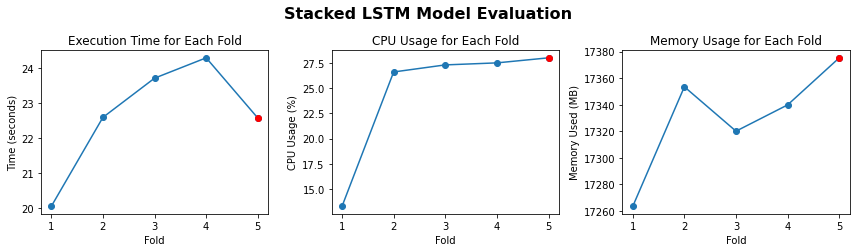

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import psutil
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def calculate_smape(y_true, y_pred):
        """
        Calculate SMAPE (Symmetric Mean Absolute Percentage Error) between two arrays.
        """
        smape = 2 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
        return smape

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Define and train the Stacked LSTM model
        model = Sequential()
        model.add(LSTM(64, return_sequences=True, input_shape=(1, 1)))
        model.add(LSTM(64))
        model.add(Dense(1))
        model.compile(loss='mse', optimizer='adam')
        model.fit(X_train, y_train, epochs=50, verbose=0)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions)
        y_train = scaler.inverse_transform(y_train)
        val_predictions = scaler.inverse_transform(val_predictions)
        y_val = scaler.inverse_transform(y_val)

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)
        train_smape = calculate_smape(y_train, train_predictions)
        val_smape = calculate_smape(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_r2, val_r2, train_smape, val_smape))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the Stacked LSTM model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = psutil.cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"\nComputation calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage}%")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_r2, best_val_r2, best_train_smape, best_val_smape = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")
print(f"Best Train SMAPE: {best_train_smape:.5f}")
print(f"Best Validation SMAPE: {best_val_smape:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 6))
plt.suptitle('Stacked LSTM Model Evaluation', fontsize=16, fontweight='bold')


plt.subplot(231)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Time (seconds)')


plt.subplot(232)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (%)')


plt.subplot(233)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')

plt.tight_layout()
plt.show()


21/21 [==============================] - 0s 2ms/step

Fold 1:
Train RMSE: 26.02956
Validation RMSE: 28.85115
Train MAE: 18.77363
Validation MAE: 19.78456
Train R2: 0.85206
Validation R2: 0.81692
Train SMAPE: 40.18477
Validation SMAPE: 33.27711

Computation calculations for Fold 1:
Execution Time: 19.36 seconds
CPU Usage: 16.9%
Memory Used: 17229.21 MB
21/21 [==============================] - 0s 2ms/step

Fold 2:
Train RMSE: 26.79803
Validation RMSE: 26.63715
Train MAE: 18.95591
Validation MAE: 18.21548
Train R2: 0.84616
Validation R2: 0.82322
Train SMAPE: 37.36941
Validation SMAPE: 54.94757

Computation calculations for Fold 2:
Execution Time: 21.10 seconds
CPU Usage: 27.2%
Memory Used: 17212.02 MB
21/21 [==============================] - 0s 2ms/step

Fold 3:
Train RMSE: 26.81258
Validation RMSE: 26.15012
Train MAE: 18.96395
Validation MAE: 19.16827
Train R2: 0.85069
Validation R2: 0.80761
Train SMAPE: 37.83380
Validation SMAPE: 42.54019

Computation calculations for Fold 3:
Execution 

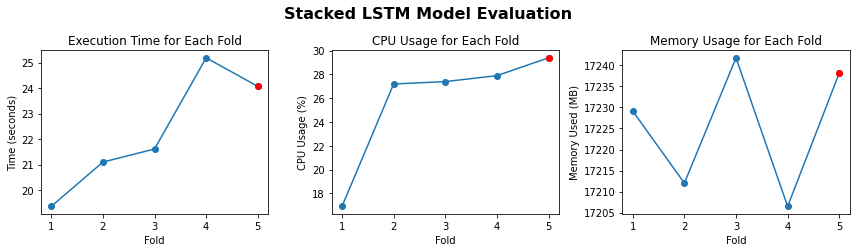

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import psutil
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations',
                'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = StandardScaler()
target_scaled = scaler.fit_transform(target)

# Define number of folds
num_folds = 5

# Compute fold size
fold_size = len(target_scaled) // num_folds

# Initialize lists to store evaluation metrics and computation calculations for each fold
eval_metrics = []
execution_times = []
cpu_usages = []
memory_usages = []

# Initialize variables for best fold and metric
best_fold = 0
best_metric = float('inf')

# Perform k-fold cross-validation
for fold in range(1, num_folds + 1):
    # Define the training and validation data for the current fold
    start_index = (fold - 1) * fold_size
    end_index = fold * fold_size
    val_data = target_scaled[start_index:end_index]
    train_data = np.concatenate((target_scaled[:start_index], target_scaled[end_index:]))

    def calculate_smape(y_true, y_pred):
        """
        Calculate SMAPE (Symmetric Mean Absolute Percentage Error) between two arrays.
        """
        smape = np.mean(np.abs(y_pred - y_true) / ((np.abs(y_pred) + np.abs(y_true)) / 2)) * 100
        return smape

    def train_evaluate_model(train_data, val_data):
        X_train, y_train = train_data[:-1], train_data[1:]
        X_val, y_val = val_data[:-1], val_data[1:]

        # Define and train the Stacked LSTM model
        model = Sequential()
        model.add(LSTM(64, return_sequences=True, input_shape=(1, 1)))
        model.add(LSTM(64))
        model.add(Dense(1))
        model.compile(loss='mse', optimizer='adam')
        model.fit(X_train, y_train, epochs=50, verbose=0)

        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions)
        y_train = scaler.inverse_transform(y_train)
        val_predictions = scaler.inverse_transform(val_predictions)
        y_val = scaler.inverse_transform(y_val)

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        train_mae = mean_absolute_error(y_train, train_predictions)
        val_mae = mean_absolute_error(y_val, val_predictions)
        train_r2 = r2_score(y_train, train_predictions)
        val_r2 = r2_score(y_val, val_predictions)
        train_smape = calculate_smape(y_train, train_predictions)
        val_smape = calculate_smape(y_val, val_predictions)

        # Print evaluation metrics for the current fold
        print(f"\nFold {fold}:")
        print(f"Train RMSE: {train_rmse:.5f}")
        print(f"Validation RMSE: {val_rmse:.5f}")
        print(f"Train MAE: {train_mae:.5f}")
        print(f"Validation MAE: {val_mae:.5f}")
        print(f"Train R2: {train_r2:.5f}")
        print(f"Validation R2: {val_r2:.5f}")
        print(f"Train SMAPE: {train_smape:.5f}")
        print(f"Validation SMAPE: {val_smape:.5f}")

        # Store evaluation metrics for the current fold
        eval_metrics.append((train_rmse, val_rmse, train_mae, val_mae, train_r2, val_r2, train_smape, val_smape))

        return train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions

    # Train and evaluate the Stacked LSTM model
    start_time = time.time()
    train_rmse, val_rmse, y_train, train_predictions, y_val, val_predictions = train_evaluate_model(train_data, val_data)
    computation_time = time.time() - start_time

    # Measure CPU usage during model training
    cpu_usage = psutil.cpu_percent()

    # Record computation calculations
    execution_times.append(computation_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(psutil.virtual_memory().used / 1024 / 1024)  # Memory usage in MB

    # Check if current fold has the best metric
    if val_rmse < best_metric:
        best_metric = val_rmse
        best_fold = fold

    # Print computation calculations for the current fold
    print(f"\nComputation calculations for Fold {fold}:")
    print(f"Execution Time: {computation_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage}%")
    print(f"Memory Used: {psutil.virtual_memory().used / 1024 / 1024:.2f} MB")

# Print the evaluation metrics for the best fold
best_train_rmse, best_val_rmse, best_train_mae, best_val_mae, best_train_r2, best_val_r2, best_train_smape, best_val_smape = eval_metrics[best_fold - 1]
print(f"\nBest Fold: {best_fold}")
print(f"Best Train RMSE: {best_train_rmse:.5f}")
print(f"Best Validation RMSE: {best_val_rmse:.5f}")
print(f"Best Train MAE: {best_train_mae:.5f}")
print(f"Best Validation MAE: {best_val_mae:.5f}")
print(f"Best Train R2: {best_train_r2:.5f}")
print(f"Best Validation R2: {best_val_r2:.5f}")
print(f"Best Train SMAPE: {best_train_smape:.5f}")
print(f"Best Validation SMAPE: {best_val_smape:.5f}")

# Plot computation calculations for each fold
plt.figure(figsize=(12, 6))
plt.suptitle('Stacked LSTM Model Evaluation', fontsize=16, fontweight='bold')

plt.subplot(231)
plt.plot(range(1, num_folds + 1), execution_times, 'o-')
plt.plot(best_fold, execution_times[best_fold - 1], 'ro')
plt.title('Execution Time for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Time (seconds)')

plt.subplot(232)
plt.plot(range(1, num_folds + 1), cpu_usages, 'o-')
plt.plot(best_fold, cpu_usages[best_fold - 1], 'ro')
plt.title('CPU Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('CPU Usage (%)')

plt.subplot(233)
plt.plot(range(1, num_folds + 1), memory_usages, 'o-')
plt.plot(best_fold, memory_usages[best_fold - 1], 'ro')
plt.title('Memory Usage for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Memory Used (MB)')

plt.tight_layout()
plt.show()
